<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW-Albert-DetX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Analyzing the performance of the Albert models using weightwatcher

https://huggingface.co/albert-base-v2

<pre>
    V2	    Average	SQuAD1.1	SQuAD2.0	MNLI	SST-2	RACE					
ALBERT-base	   82.3	90.2/83.2	82.1/79.3	84.6	92.9	66.8
ALBERT-large	  85.7	91.8/85.2	84.9/81.8	86.5	94.9	75.2
ALBERT-xlarge	 87.9	92.9/86.4	87.9/84.1	87.9	95.4	80.7
ALBERT-xxlarge	90.9	94.6/89.1	89.8/86.9	90.6	96.8	86.8
</pre>

Note: I am NOT using the AutoModel here, which does not contain the last layer

This should not impact the analysis

In [189]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from transformers import AutoModel


In [190]:
import sys
if 'google.colab' in sys.modules:
    !pip install transformers weightwatcher gwpy matplotlib==3.1.3


In [191]:
import weightwatcher as ww
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__) 
logger.setLevel(logging.INFO)


In [192]:
versions = ['base', 'large', 'xlarge','xxlarge']
accuracies = [82.3, 85.7, 87.9, 90.9]

In [194]:
%%capture

from transformers import  AlbertModel

import warnings
warnings.filterwarnings('ignore')

all_details = []
for version in versions:
    model_name = f"albert-{version}-v2"
    albert = AlbertModel.from_pretrained(model_name)

    watcher = ww.WeightWatcher(model=albert)
    details = watcher.analyze(randomize=True, mp_fit=True, detX=True)
    all_details.append(details)

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize

### Plot alpha vs accuracy

For some reason, the xxlarge ALBERT is off



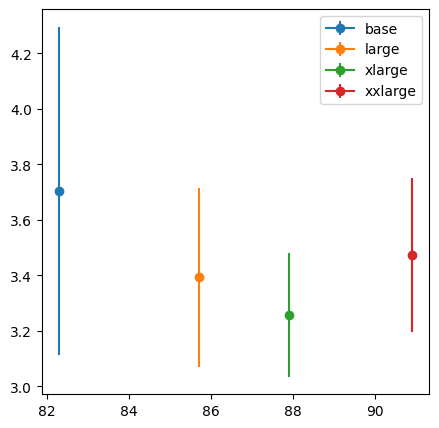

In [16]:
for idx, details in enumerate(all_details):
    version = versions[idx]
    accuracy = accuracies[idx]
    
    D = details[(details.alpha < 10) & (details.alpha > 2)]
    
    alphas = D.alpha.to_numpy()
    weights = 1.0/D.sigma.to_numpy()
    
    alpha = np.average(alphas, weights=weights)
    sigma = D.sigma.mean()
    
    plt.errorbar(accuracy, alpha, yerr=sigma, label=version, marker='o')
plt.legend()

Text(0.5, 1.0, 'sigma')

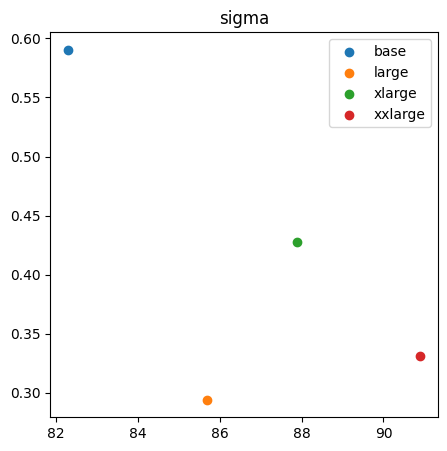

In [24]:
for idx, details in enumerate(all_details):
    version = versions[idx]
    accuracy = accuracies[idx]
    
    D = details#[(details.alpha < 10) & (details.alpha > 2)]
    
    alphas = D.alpha.to_numpy()
    weights = 1.0/D.sigma.to_numpy()
    
    alpha = np.average(alphas, weights=weights)
    sigma = D.sigma.mean()
    
    plt.scatter(accuracy, sigma, label=version, marker='o')
plt.legend()
plt.title("sigma")

Text(0.5, 1.0, 'sigma')

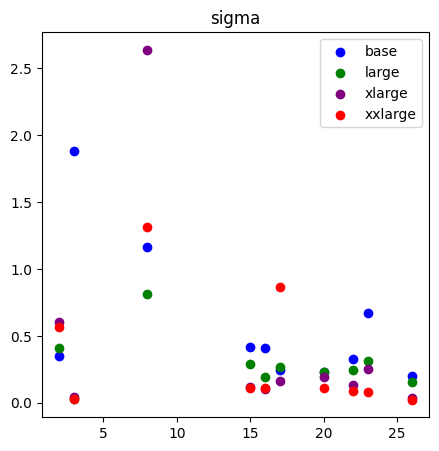

In [21]:
colors = ['blue','green', 'purple', 'red']
for idx, details in enumerate(all_details):
    version = versions[idx]
    color = colors[idx]
    
    x = details.layer_id.to_numpy()
    y = details.sigma.to_numpy()
    plt.scatter(x, y, label=version, marker='o', color=color)
    
plt.legend()
plt.title("sigma")

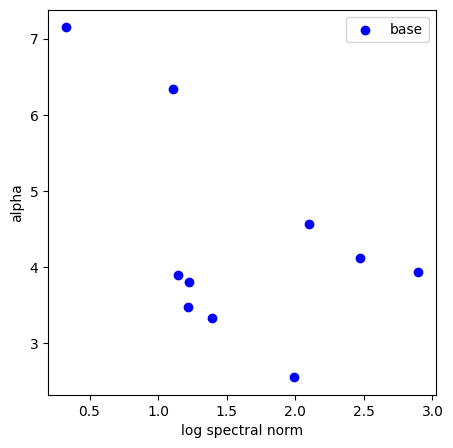

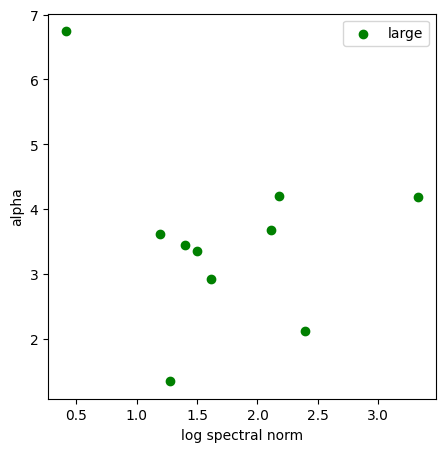

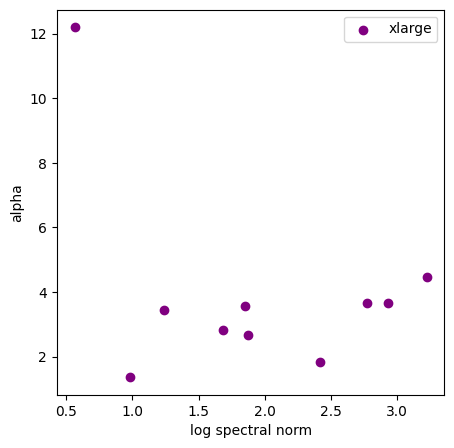

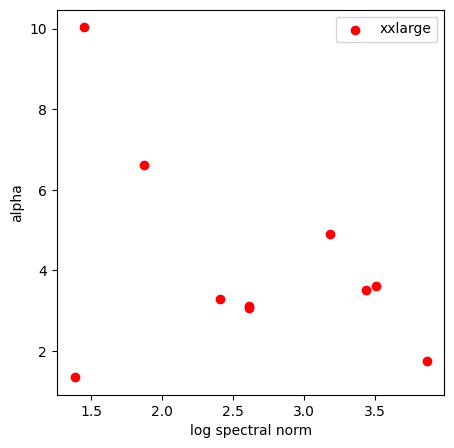

In [28]:
colors = ['blue','green', 'purple', 'red']
for idx, details in enumerate(all_details):
    version = versions[idx]
    color = colors[idx]
    
    x = details.log_spectral_norm.to_numpy()
    y = details.alpha.to_numpy()
    plt.scatter(x, y, label=version, marker='o', color=color)
    
    plt.legend()
    plt.xlabel("log spectral norm")
    plt.ylabel("alpha")
    plt.show()

Text(0.5, 1.0, 'log_spectral_norm')

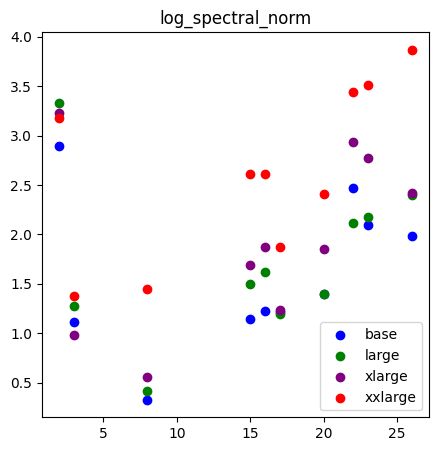

In [20]:
colors = ['blue','green', 'purple', 'red']
for idx, details in enumerate(all_details):
    version = versions[idx]
    color = colors[idx]
    
    x = details.layer_id.to_numpy()
    y = details.log_spectral_norm.to_numpy()
    plt.scatter(x, y, label=version, marker='o', color=color)
    
plt.legend()
plt.title("log_spectral_norm")

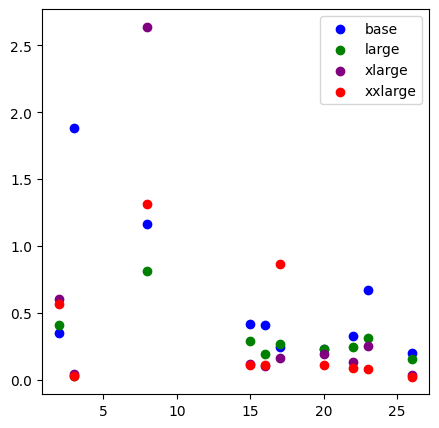

In [17]:
colors = ['blue','green', 'purple', 'red']
for idx, details in enumerate(all_details):
    version = versions[idx]
    color = colors[idx]
    
    x = details.layer_id.to_numpy()
    y = details.sigma.to_numpy()
    plt.scatter(x, y, label=version, marker='o', color=color)
    
plt.legend()

Text(0.5, 1.0, 'ALBERT models')

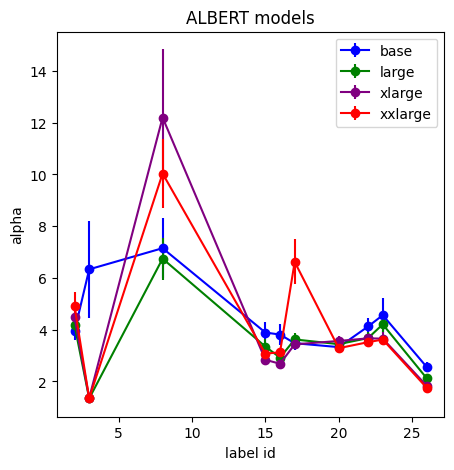

In [31]:
colors = ['blue','green', 'purple', 'red']
for idx, details in enumerate(all_details):
    version = versions[idx]
    color = colors[idx]
    
    x = details.layer_id.to_numpy()
    y = details.alpha.to_numpy()
    err = details.sigma.to_numpy()
    plt.errorbar(x, y, yerr=err, label=version, marker='o', color=color)
    
plt.legend()
plt.xlabel('label id')
plt.ylabel('alpha')
plt.title('ALBERT models')

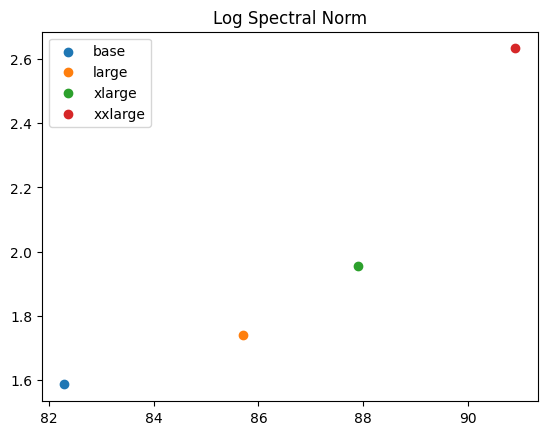

In [8]:
plt.title("Log Spectral Norm")
for idx, details in enumerate(all_details):
    version = versions[idx]
    accuracy = accuracies[idx]
    
    x = accuracy
    D = details#[(details.alpha < 10) & (details.alpha > 2)]
    
    y = D.log_spectral_norm.mean()
    weights = D.sigma.to_numpy()
    
    plt.scatter(x, y, label=version, marker='o')
plt.legend()

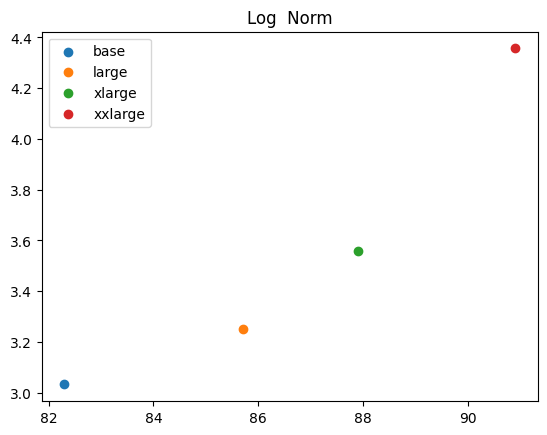

In [9]:
plt.title("Log  Norm")
for idx, details in enumerate(all_details):
    version = versions[idx]
    accuracy = accuracies[idx]
    
    x = accuracy
    D = details#[(details.alpha < 10) & (details.alpha > 2)]
    
    y = D.log_norm.mean()
    weights = D.sigma.to_numpy()
    
    plt.scatter(x, y, label=version, marker='o')
plt.legend()

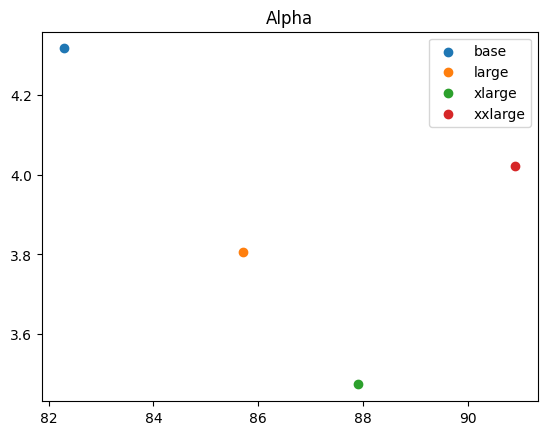

In [10]:
plt.title("Alpha")
for idx, details in enumerate(all_details):
    version = versions[idx]
    accuracy = accuracies[idx]
    
    x = accuracy
    D = details[(details.alpha < 8) & (details.alpha > 2)]
    
    y = D.alpha.mean()
    weights = D.sigma.to_numpy()
    
    plt.scatter(x, y, label=version, marker='o')
plt.legend()

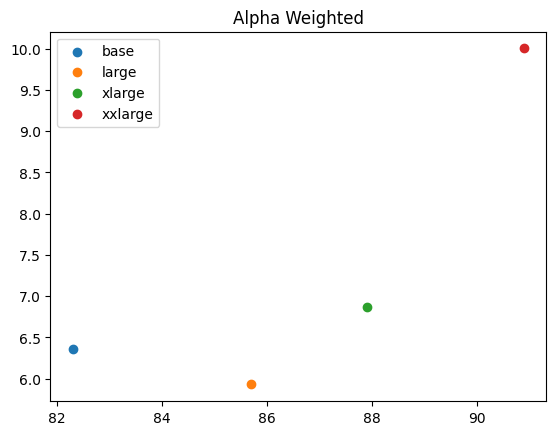

In [11]:
plt.title("Alpha Weighted")
for idx, details in enumerate(all_details):
    version = versions[idx]
    accuracy = accuracies[idx]
    
    x = accuracy
    D = details#[(details.alpha < 8) & (details.alpha > 2)]
    
    y = D.alpha_weighted.mean()
    weights = D.sigma.to_numpy()
    
    plt.scatter(x, y, label=version, marker='o')
plt.legend()

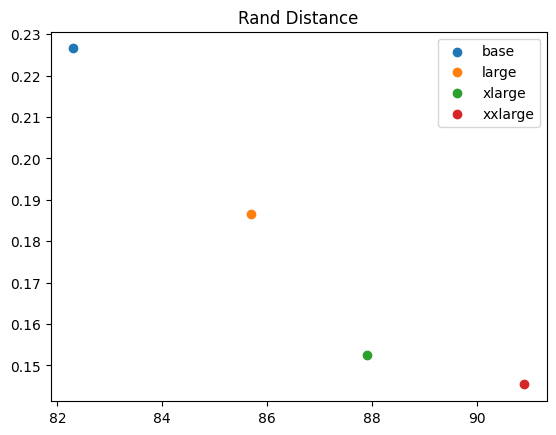

In [12]:
plt.title("Rand Distance")
for idx, details in enumerate(all_details):
    version = versions[idx]
    accuracy = accuracies[idx]
    
    x = accuracy
    D = details[(details.alpha < 8) & (details.alpha > 2)]
    
    y = D.rand_distance.mean()
    weights = D.sigma.to_numpy()
    
    plt.scatter(x, y, label=version, marker='o')
plt.legend()

### Why is xxlarge off ?

Some weights of the model checkpoint at albert-xxlarge-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normal



python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1


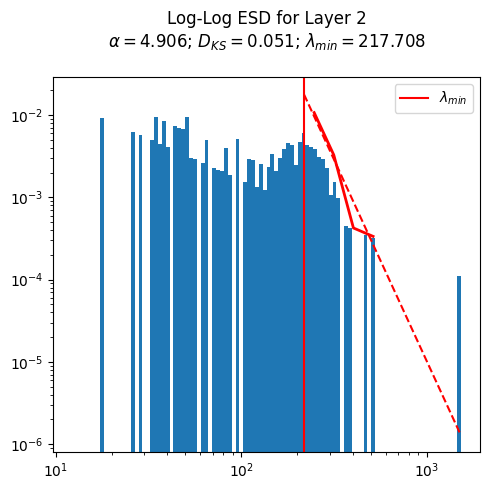

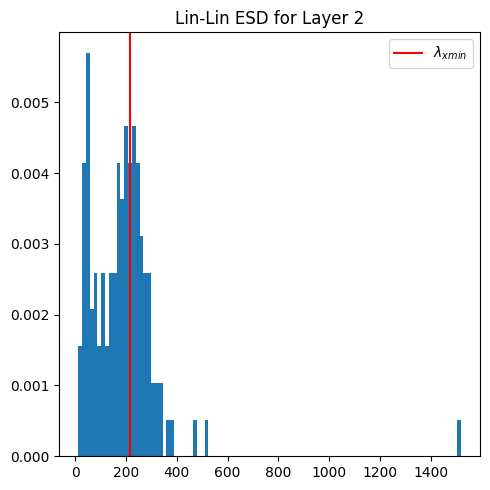

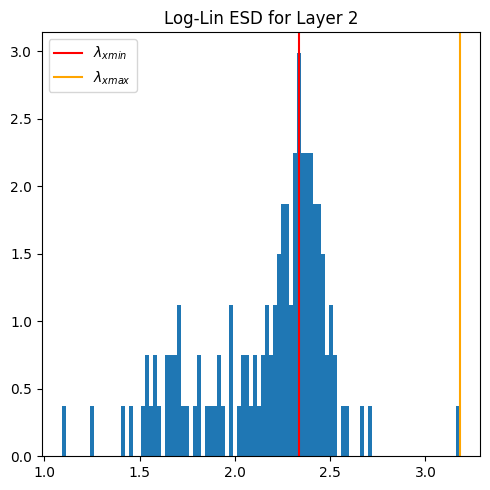

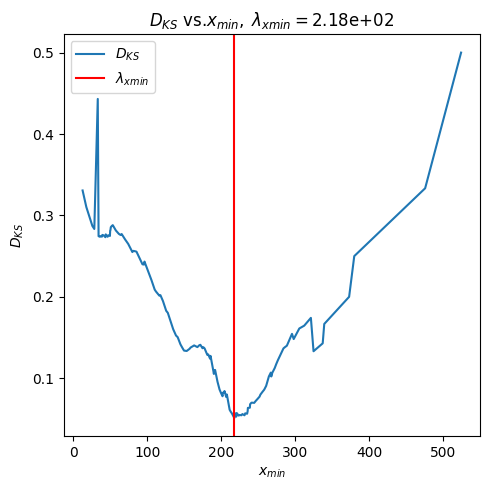

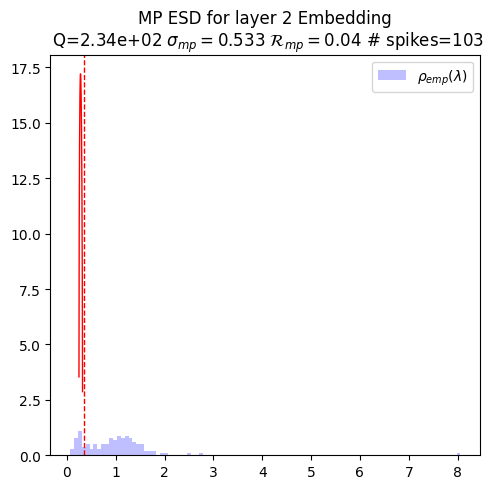

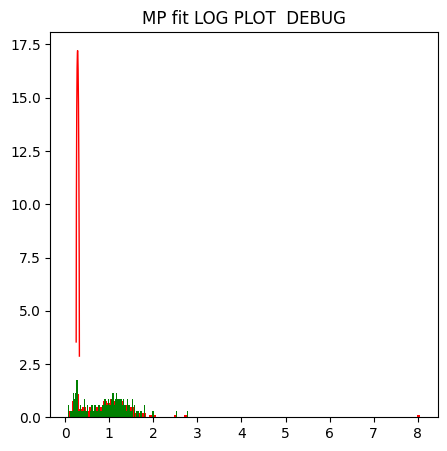

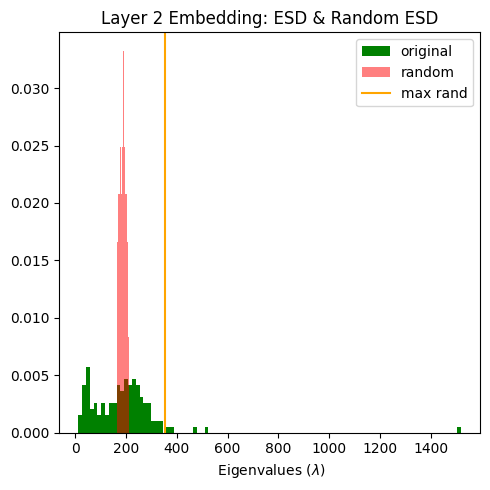

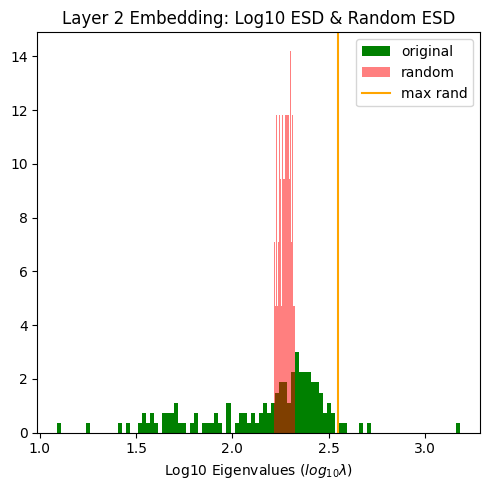

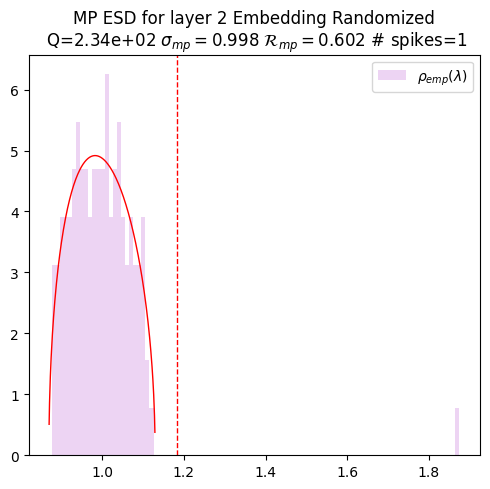

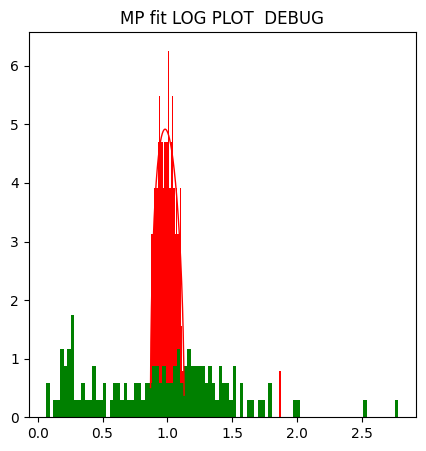

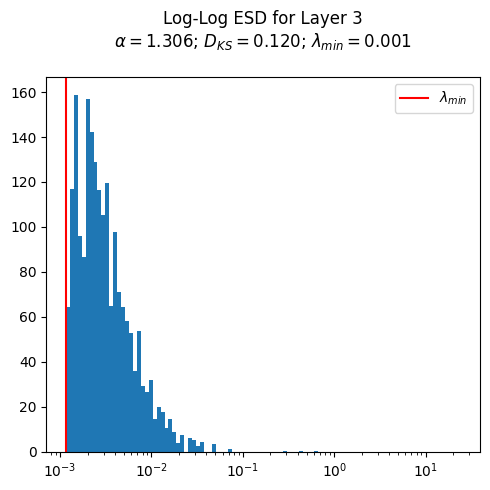

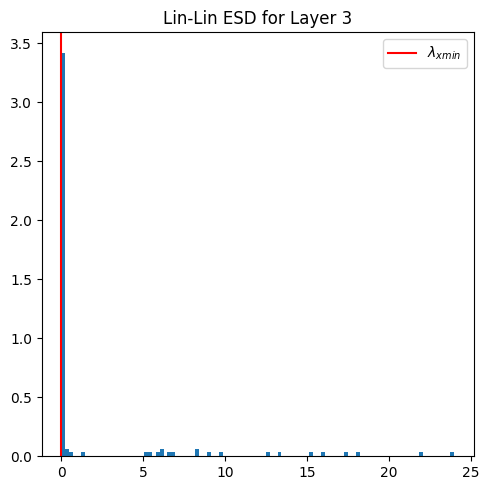

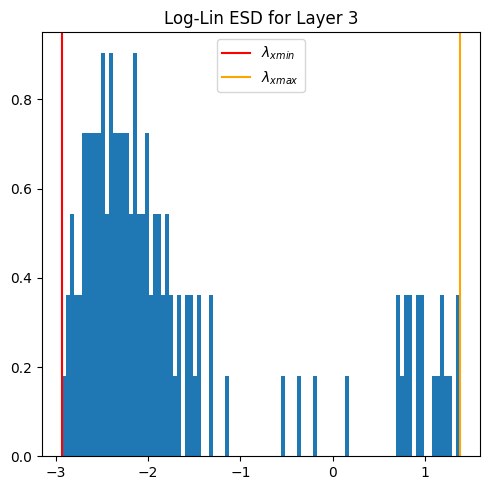

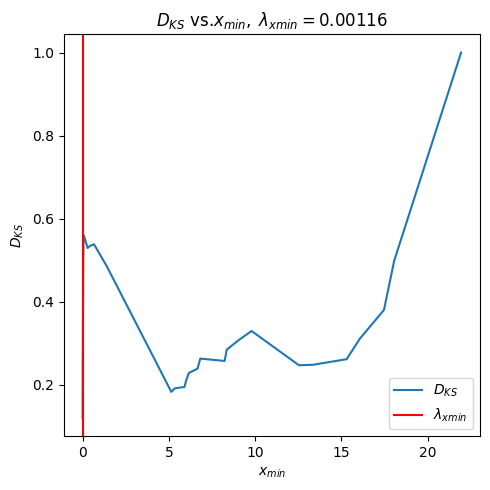

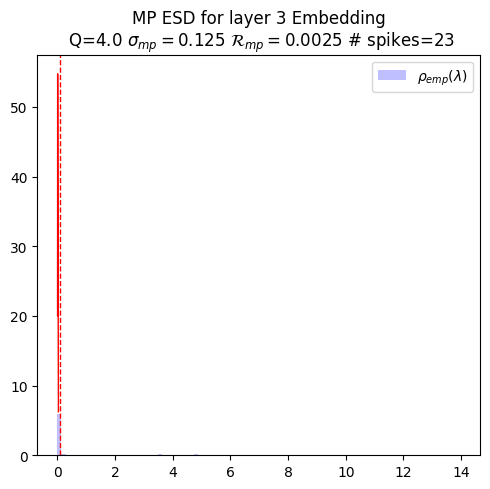

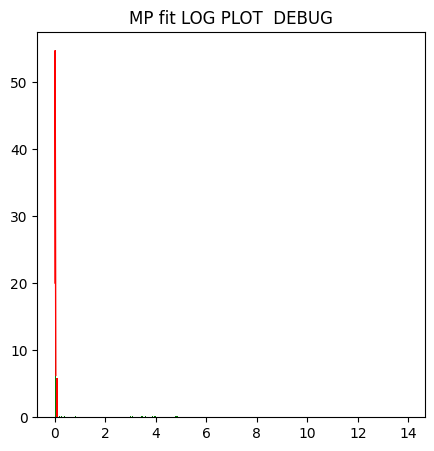

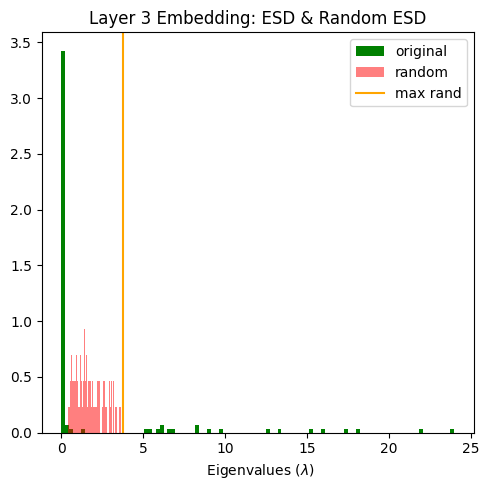

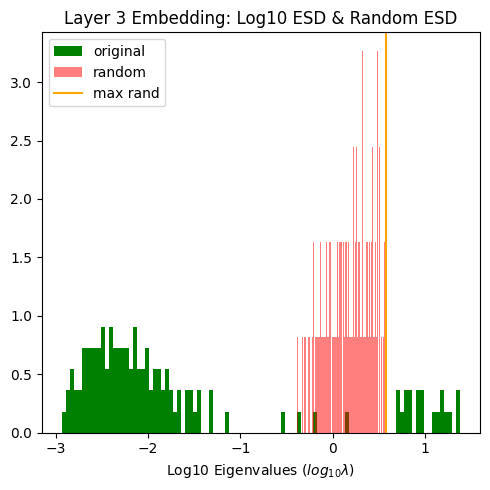

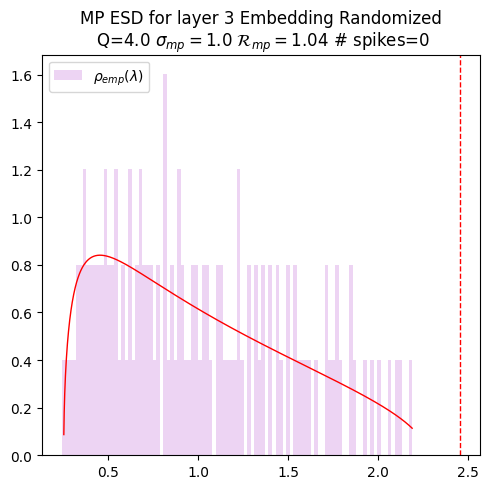

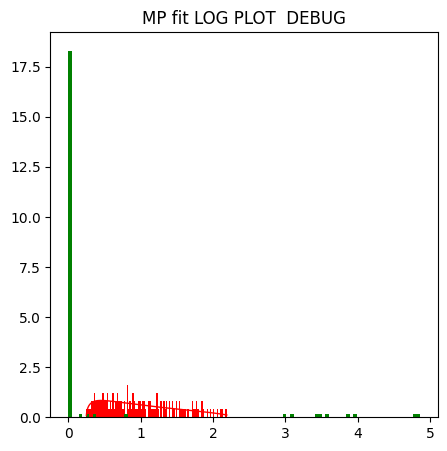

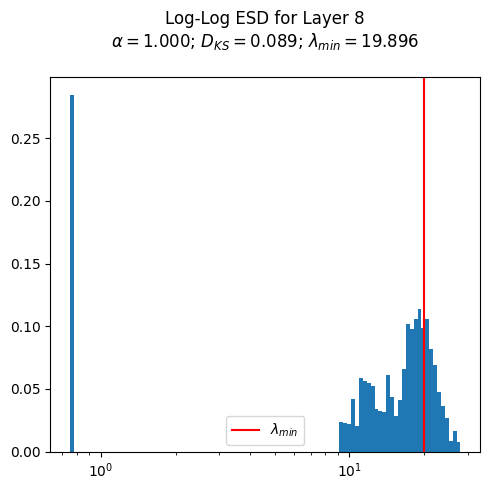

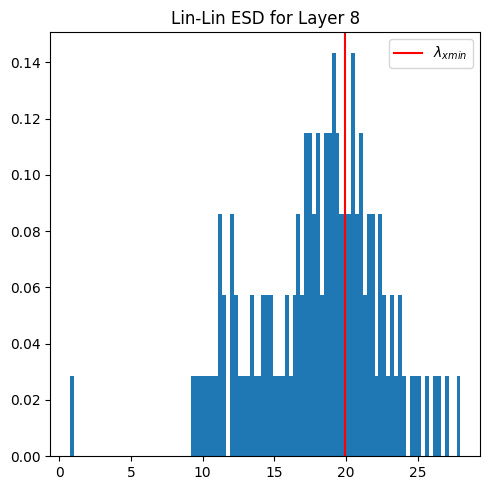

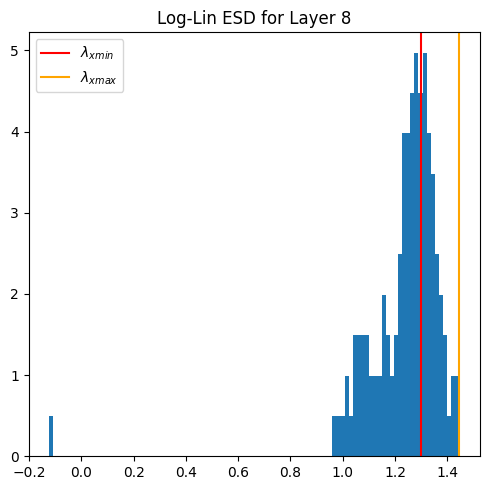

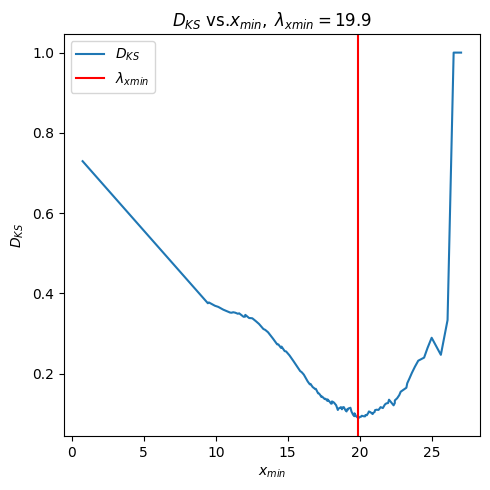

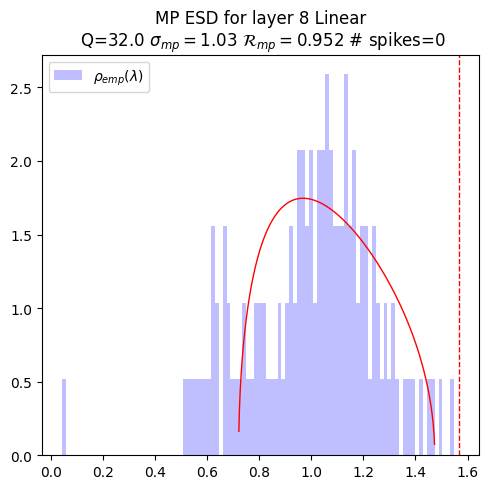

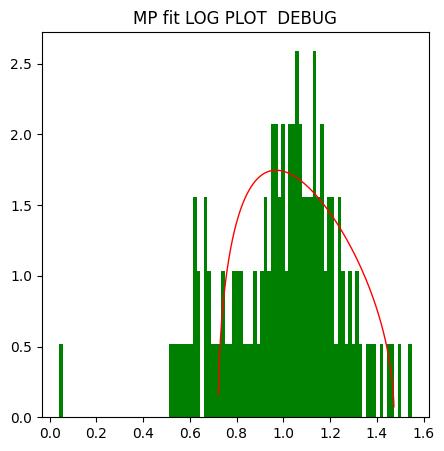

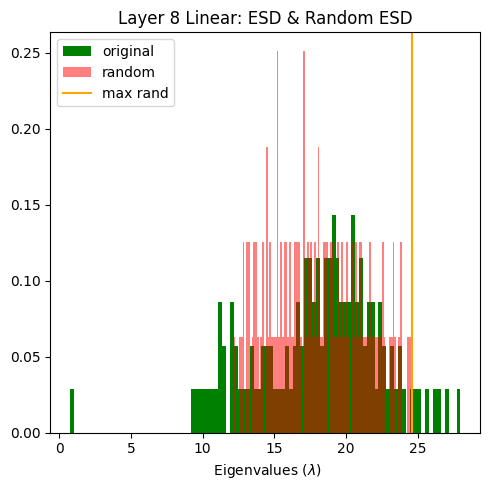

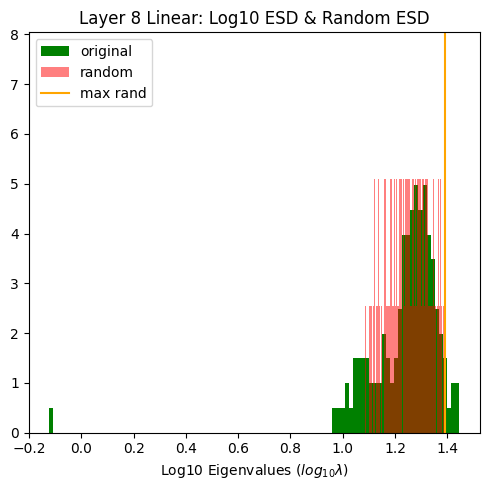

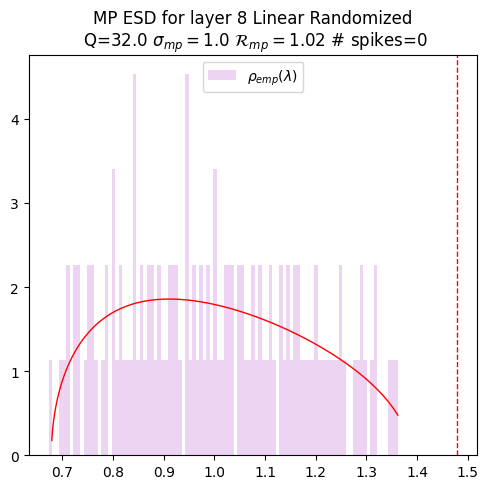

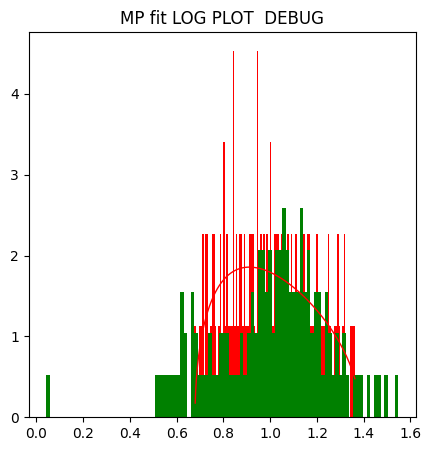

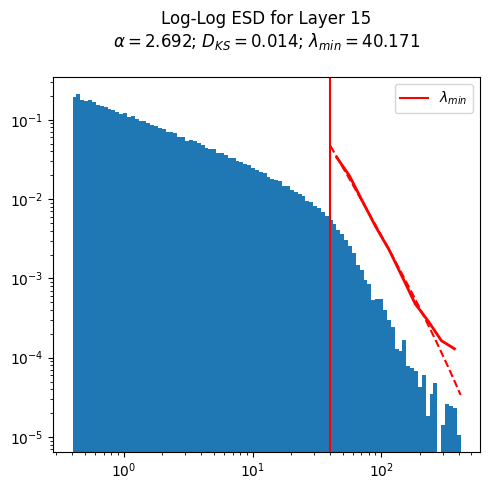

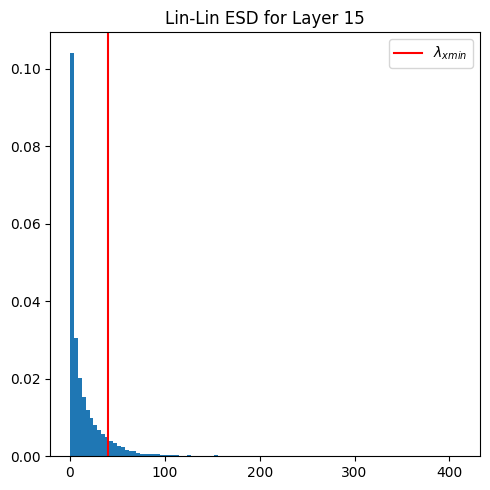

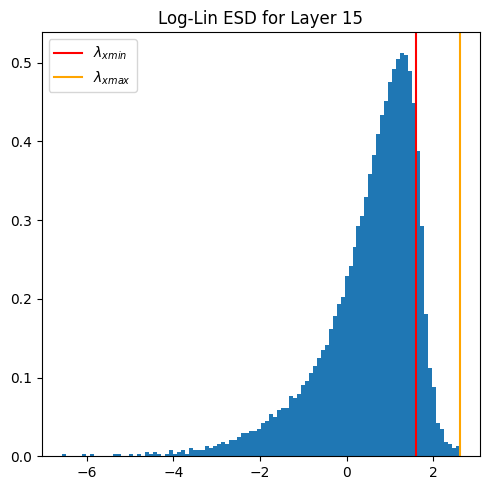

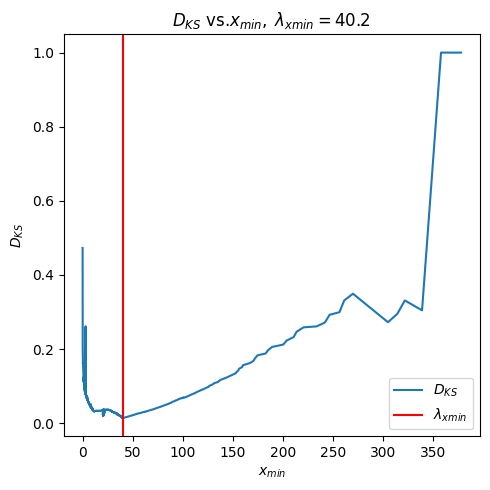

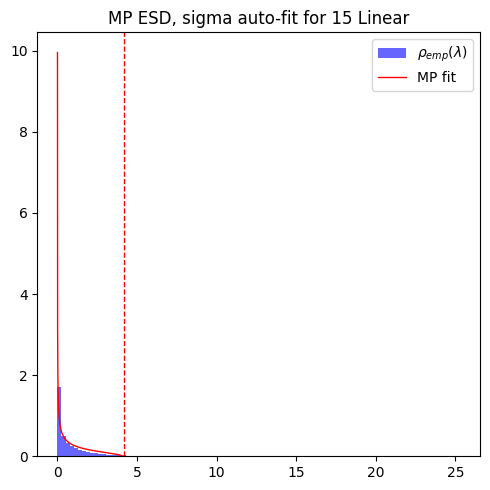

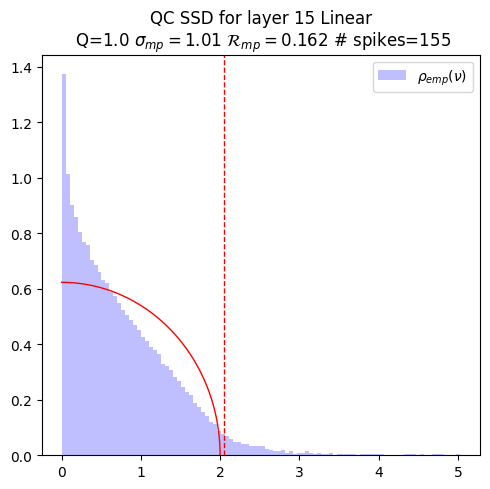

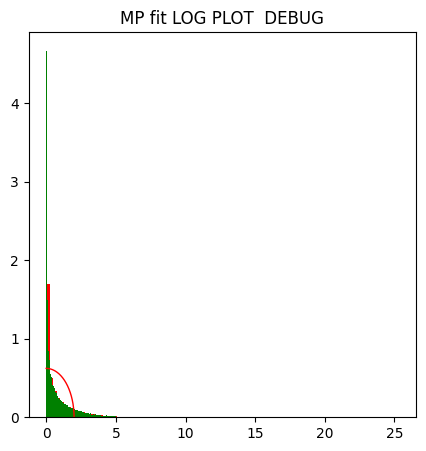

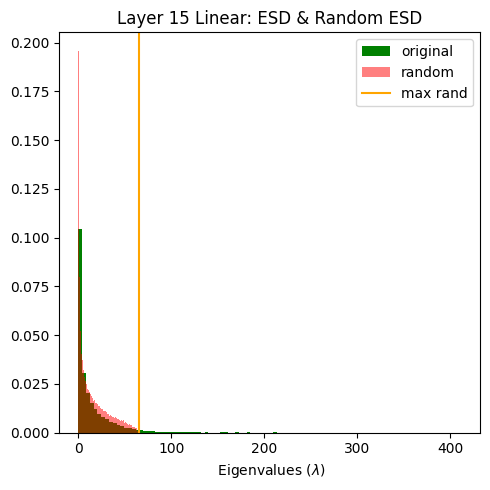

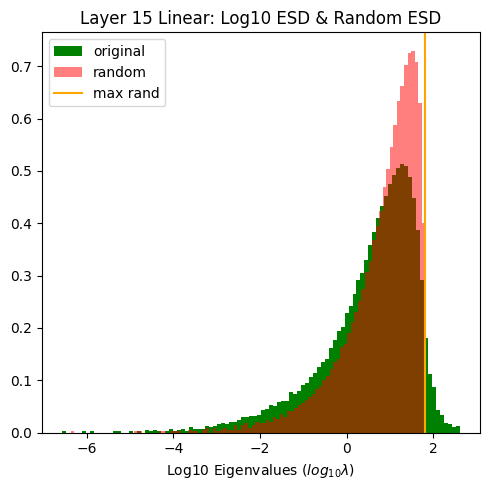

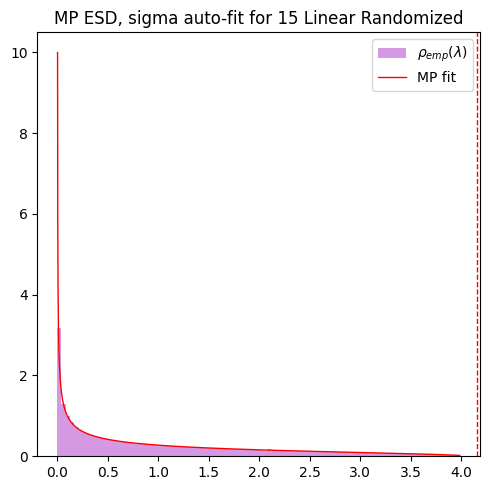

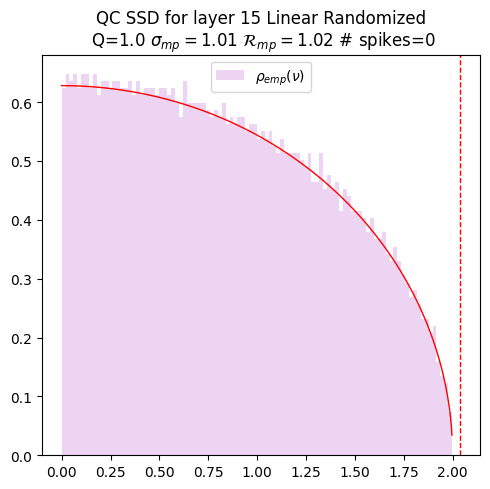

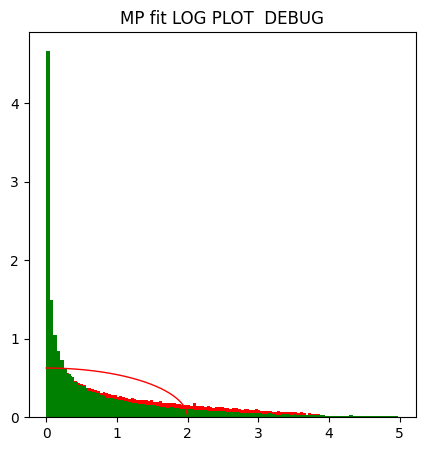

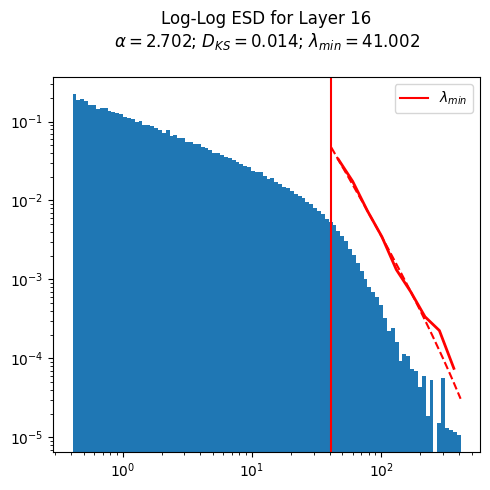

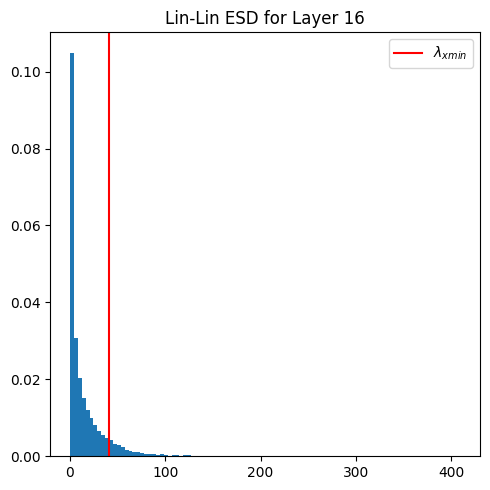

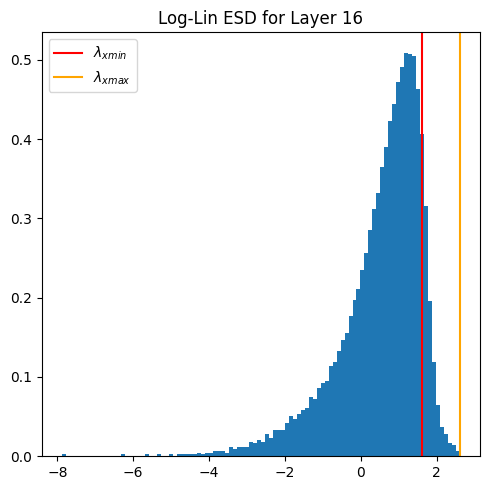

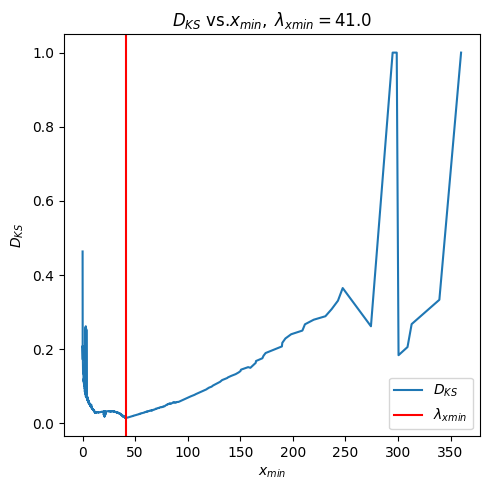

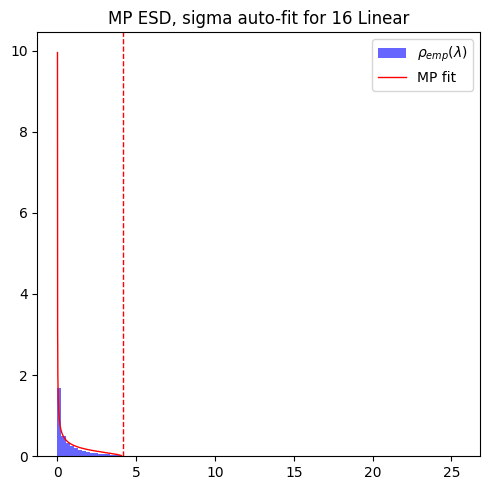

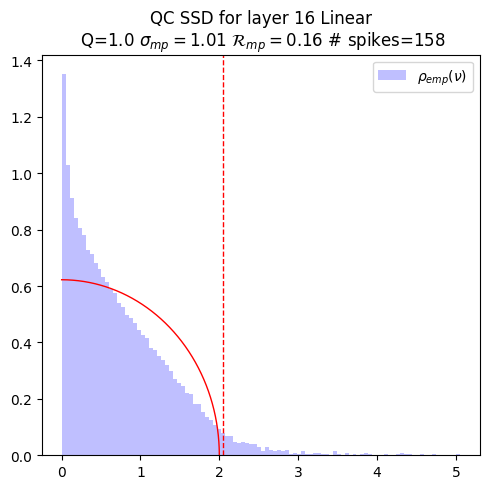

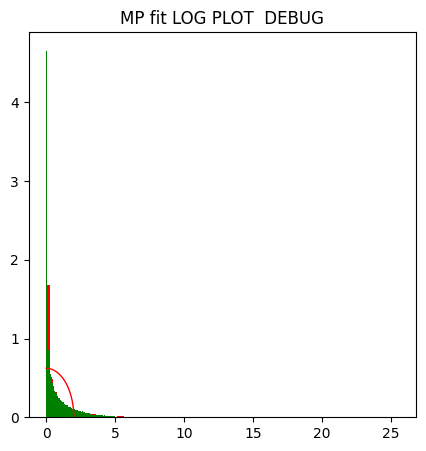

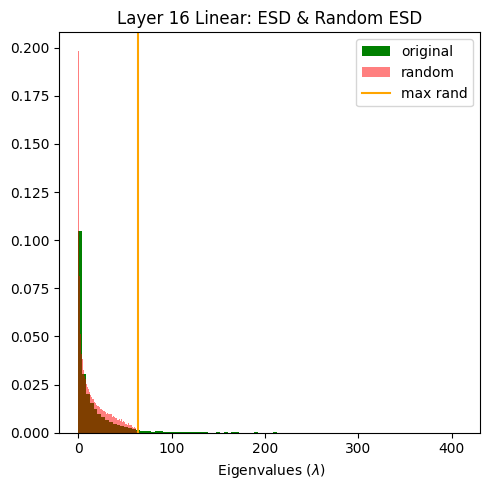

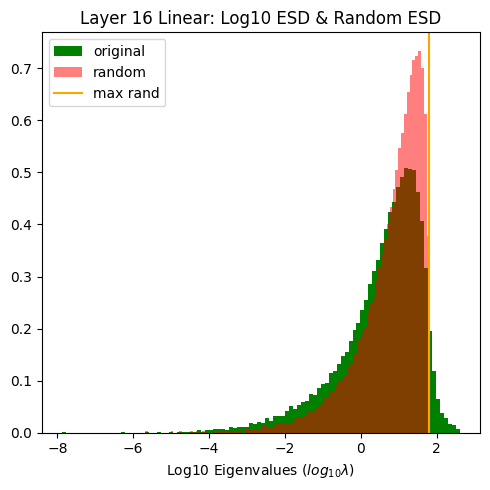

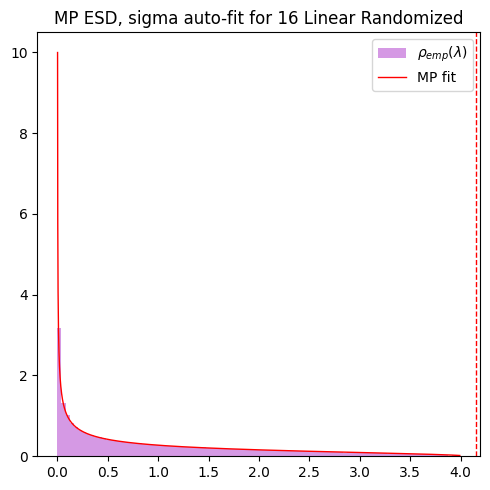

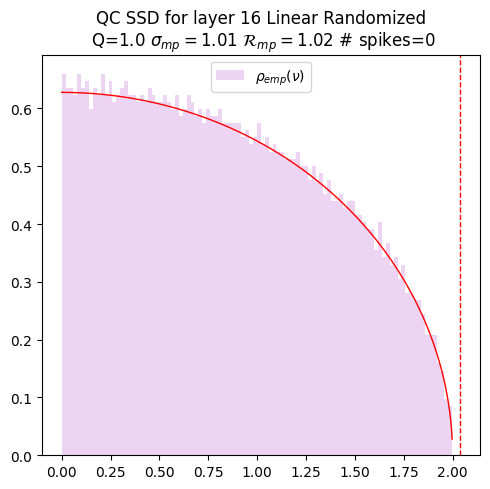

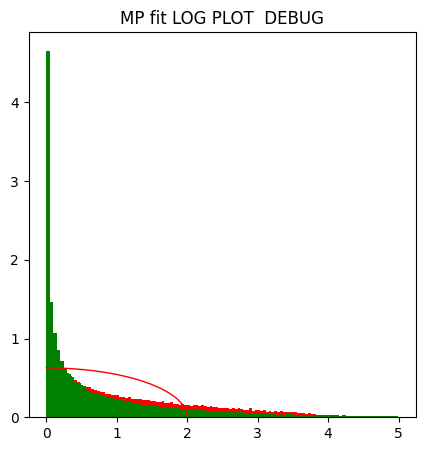

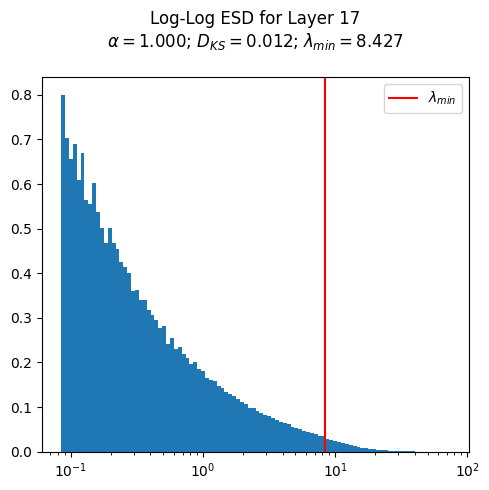

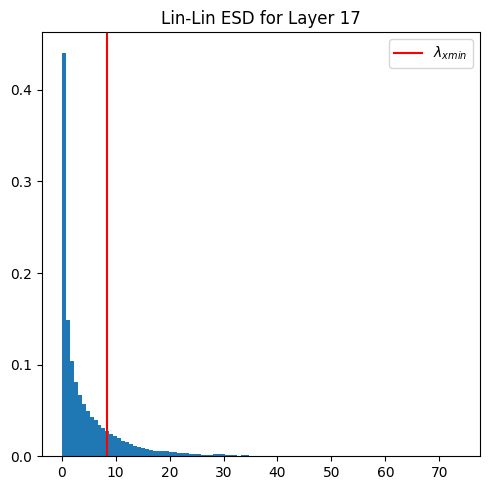

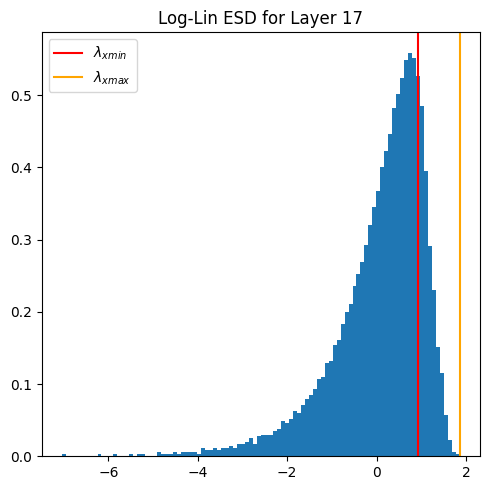

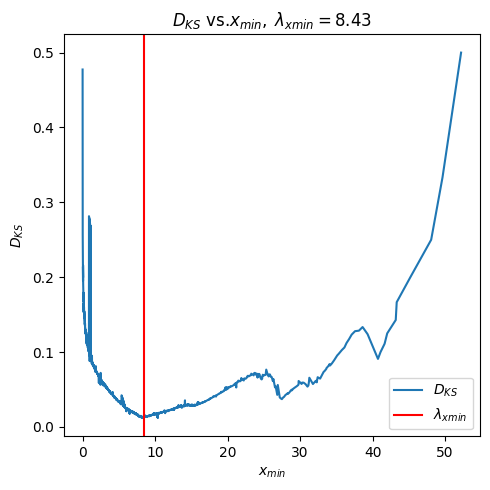

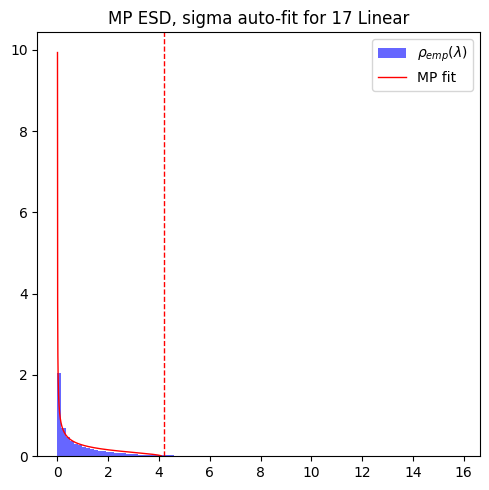

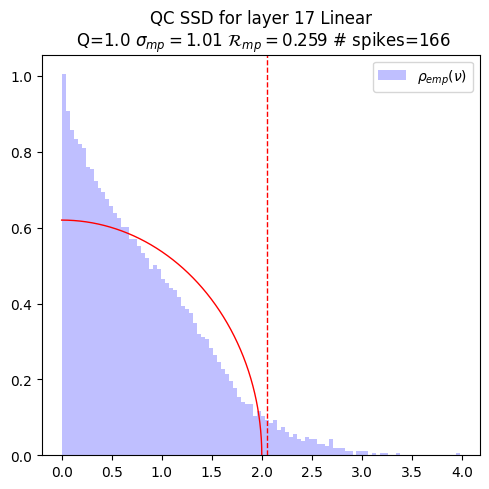

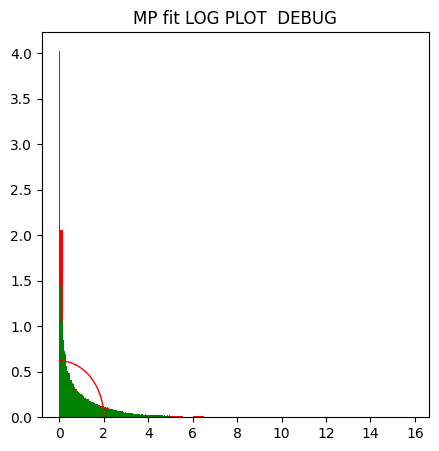

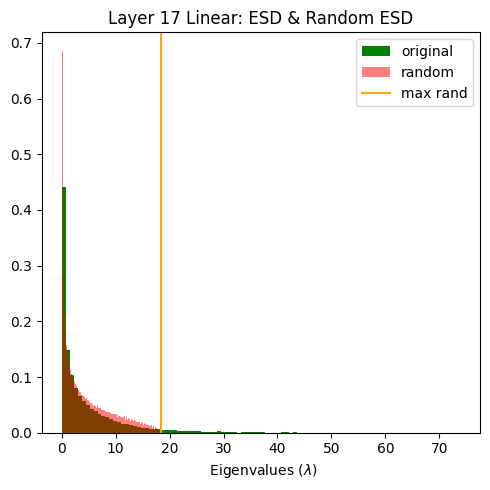

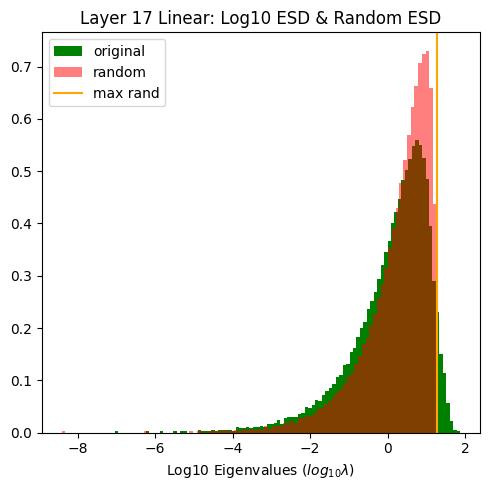

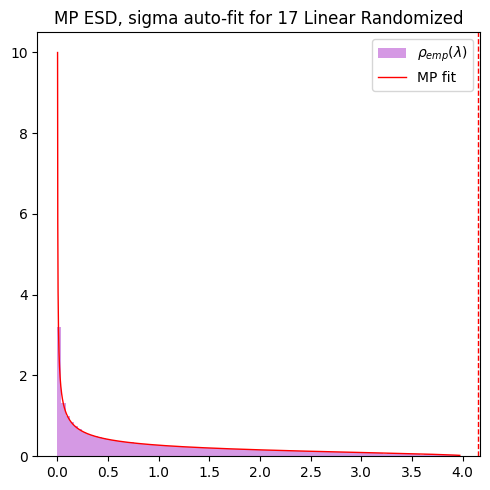

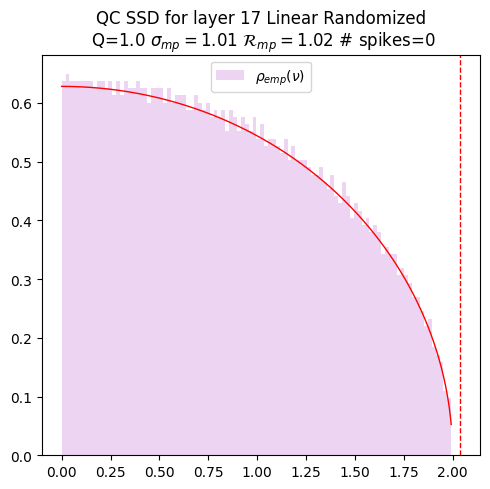

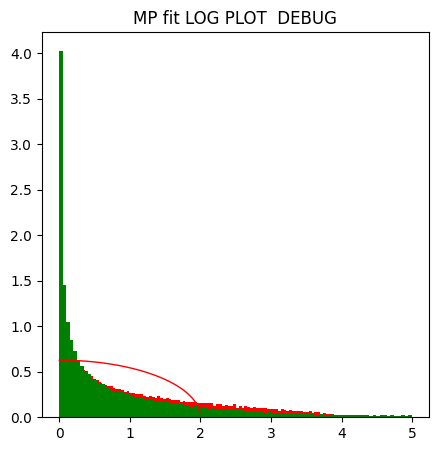

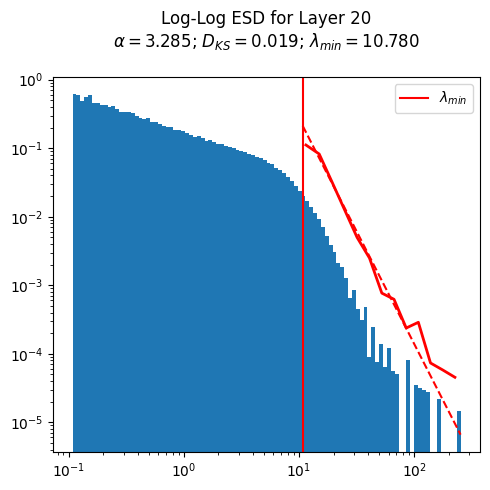

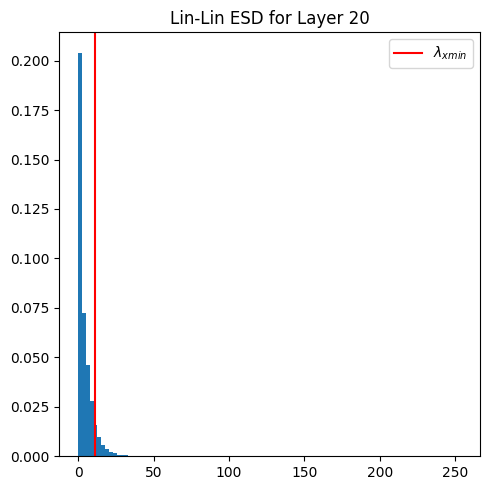

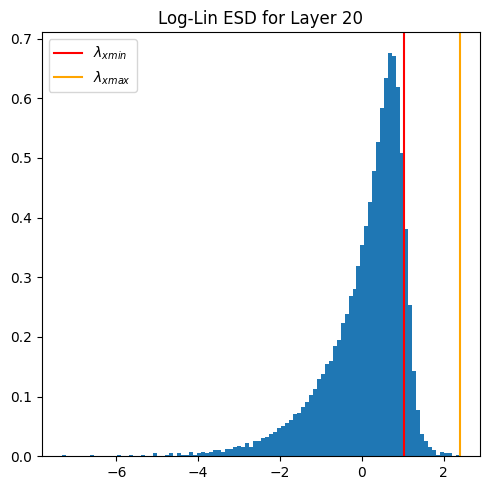

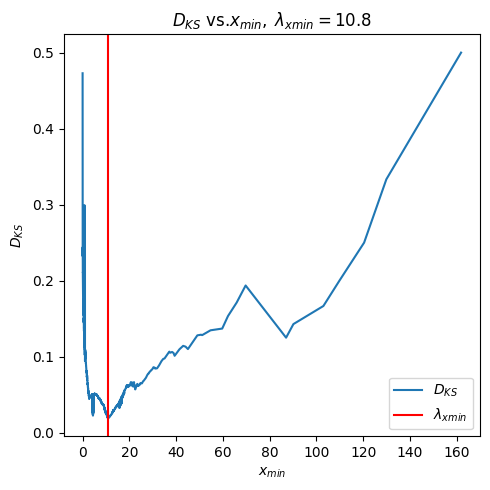

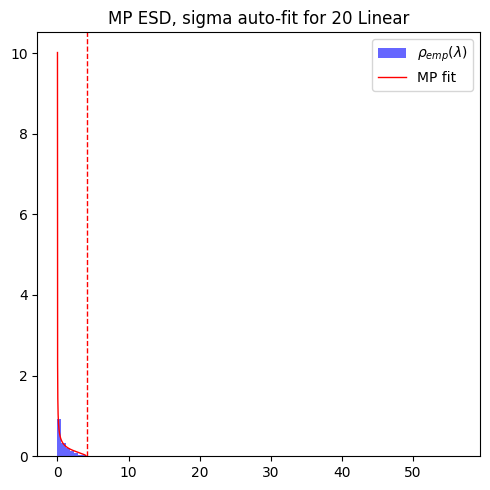

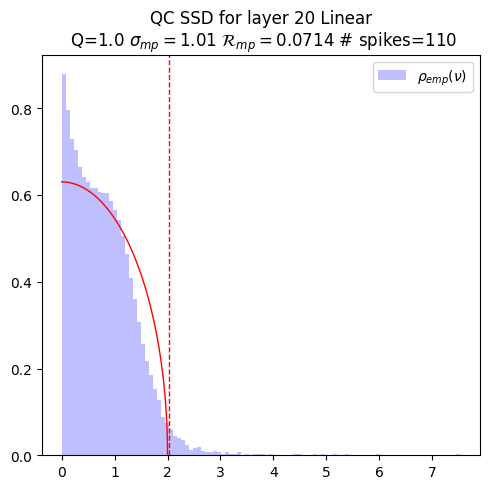

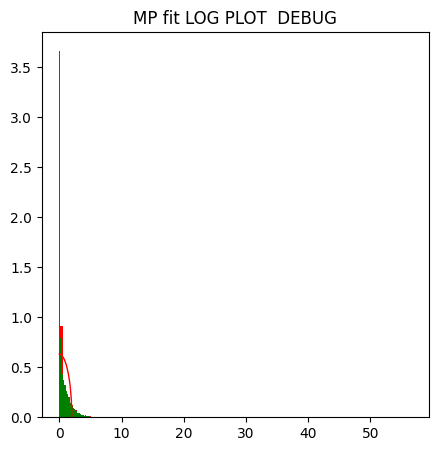

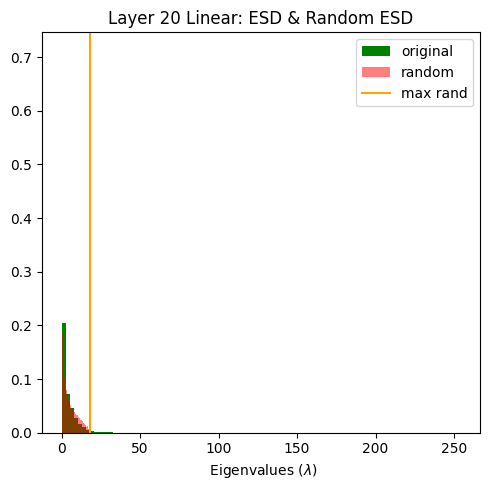

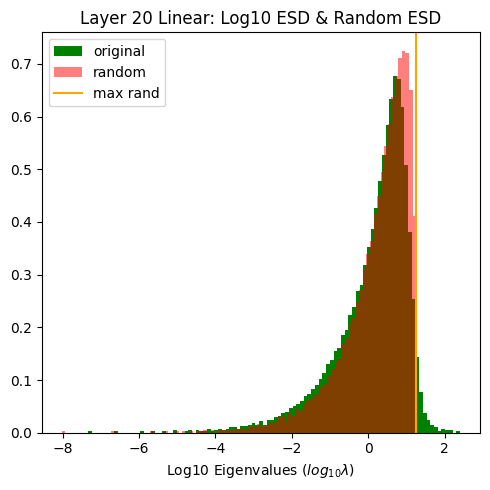

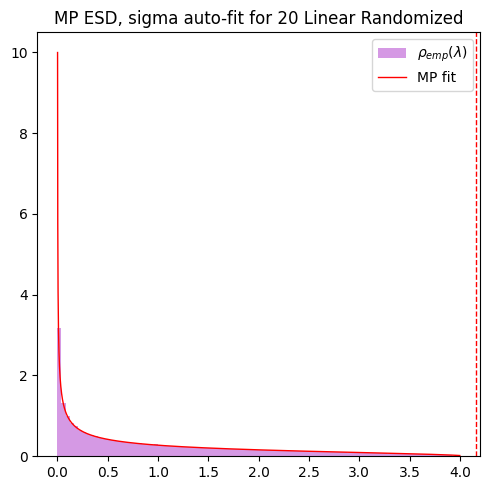

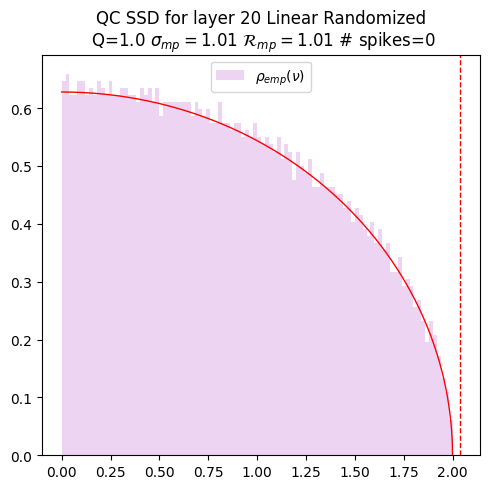

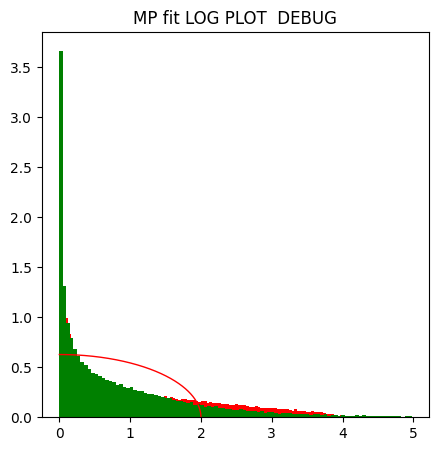

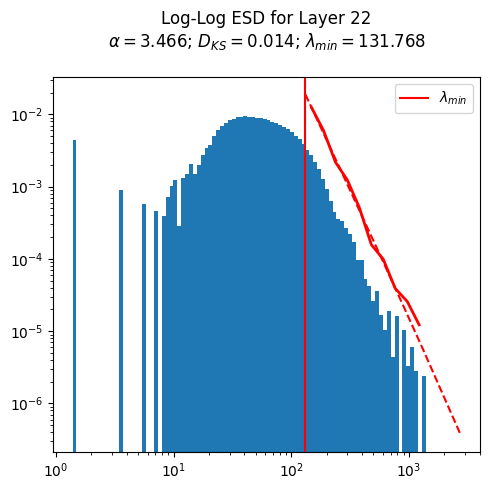

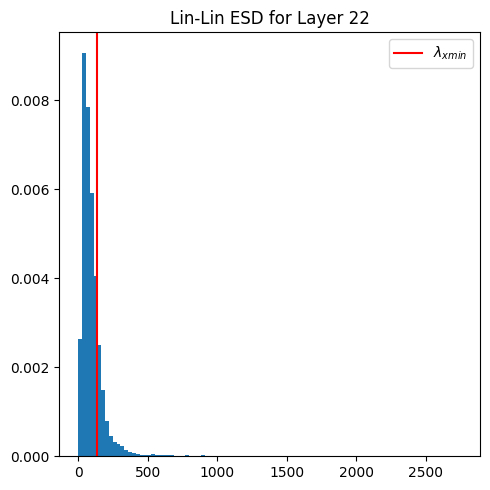

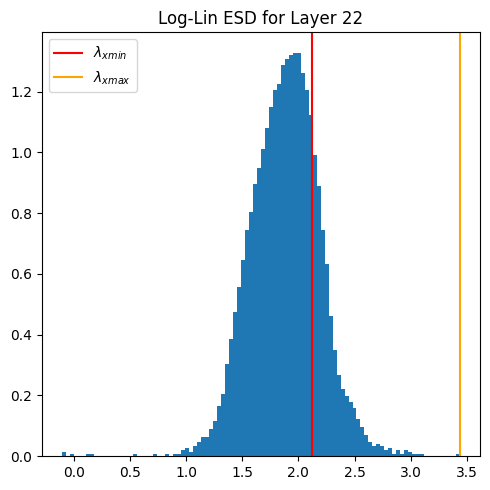

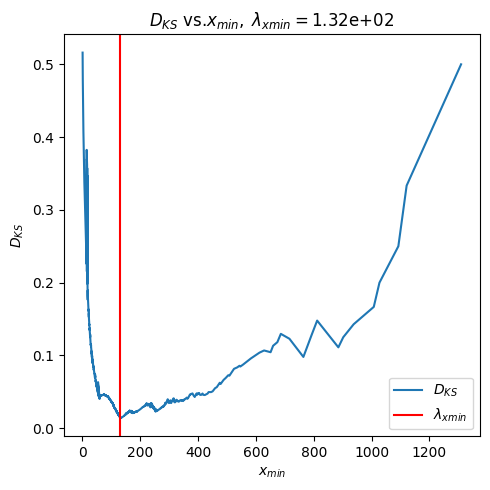

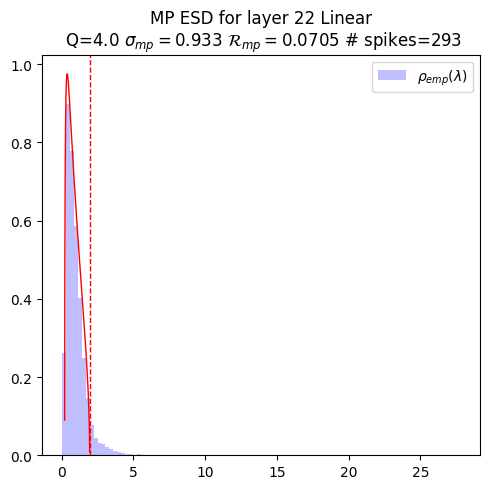

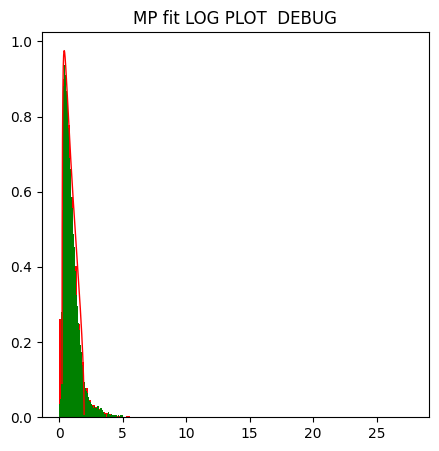

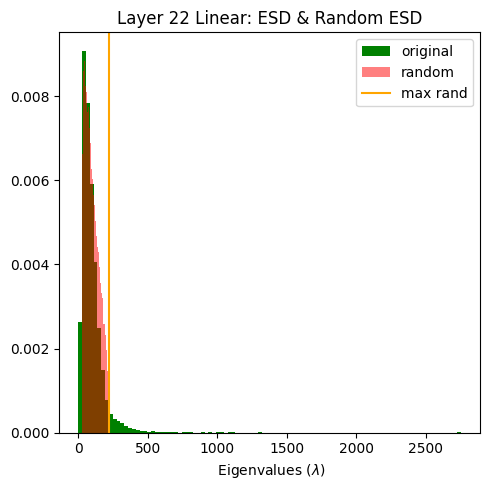

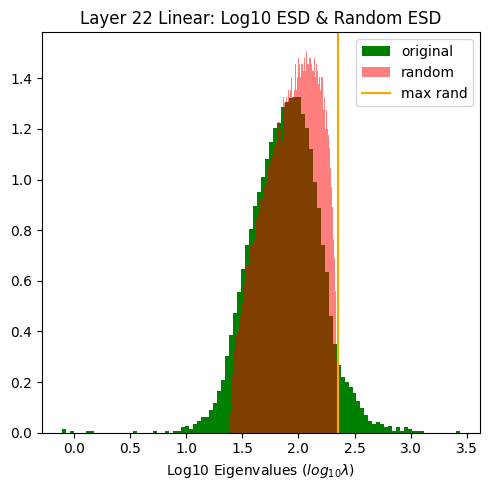

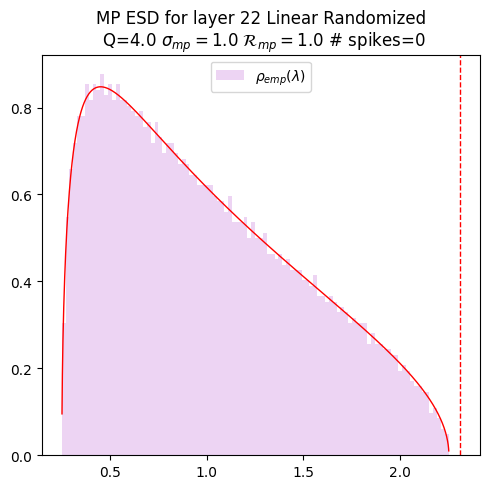

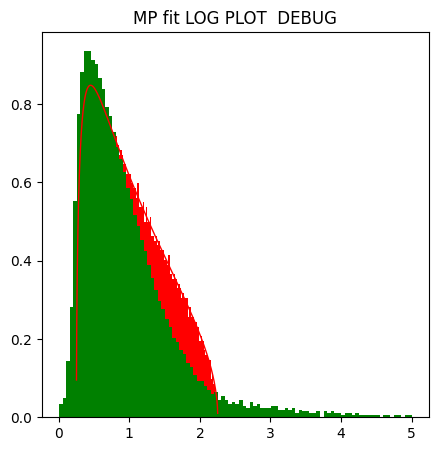

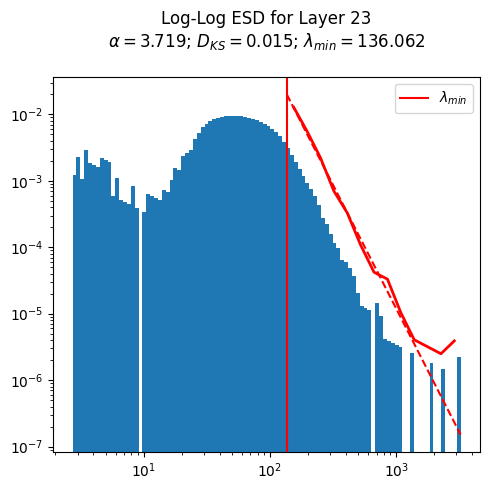

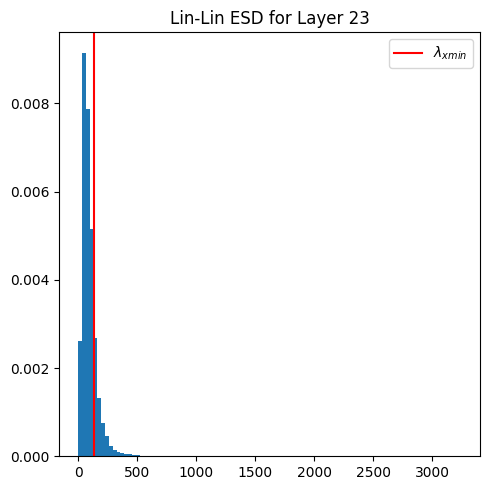

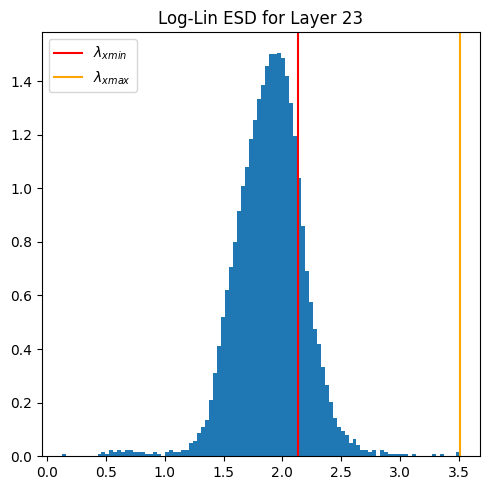

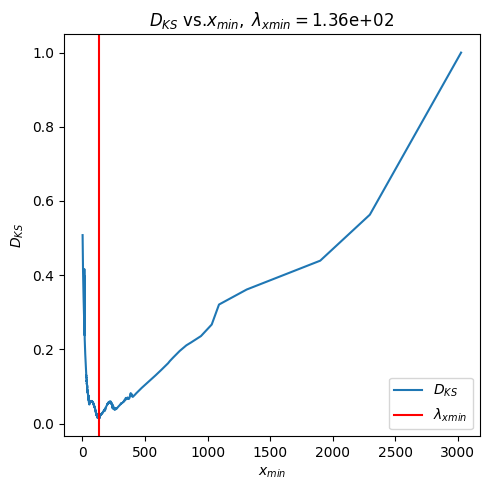

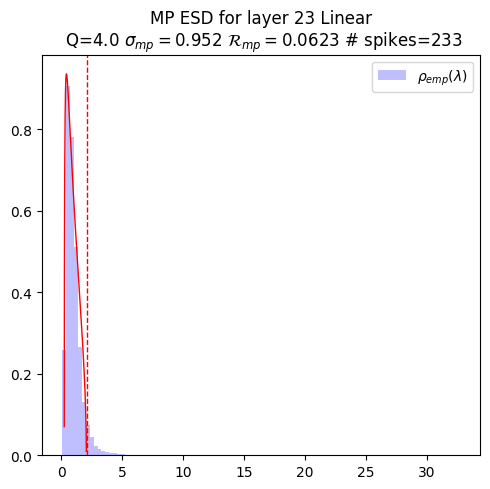

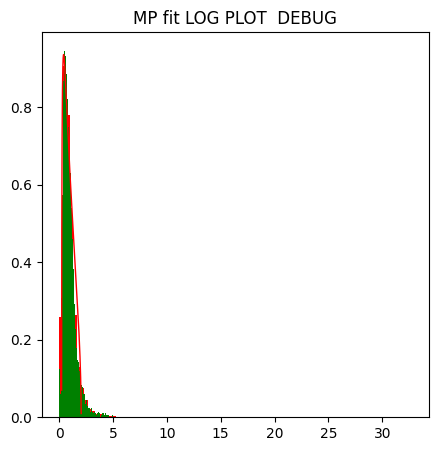

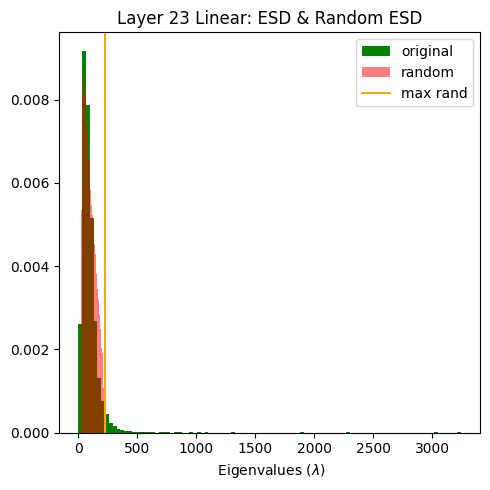

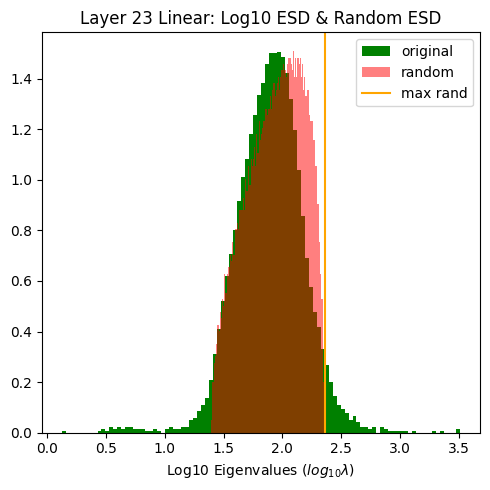

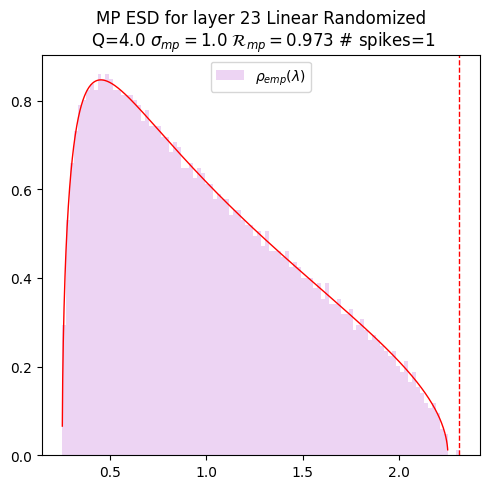

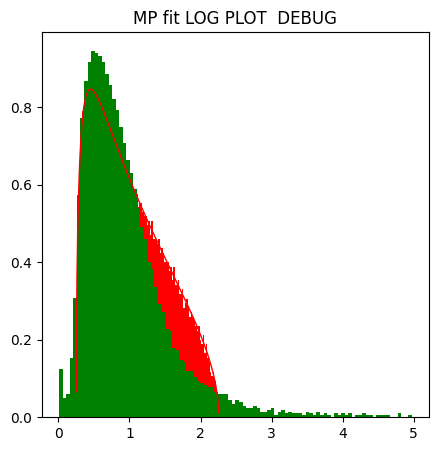

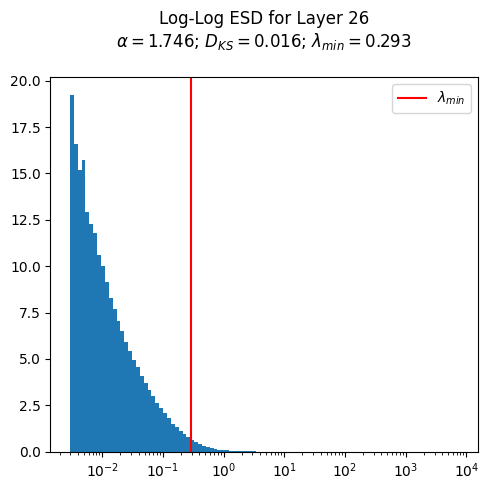

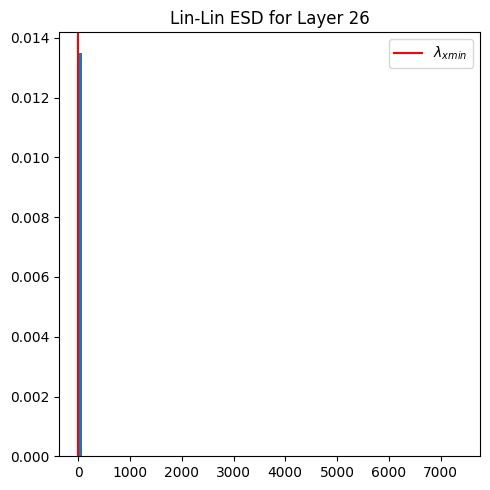

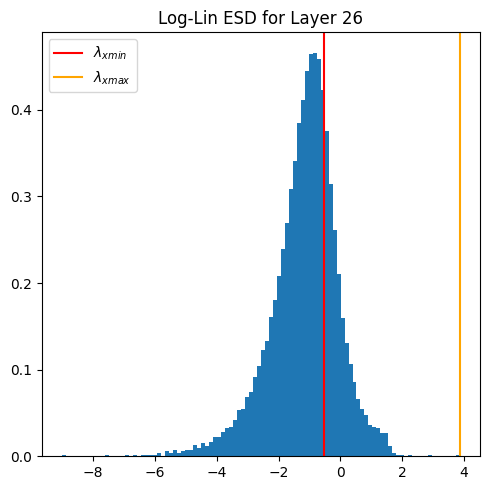

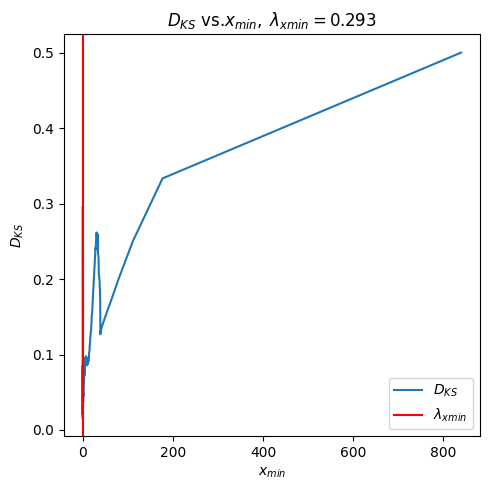

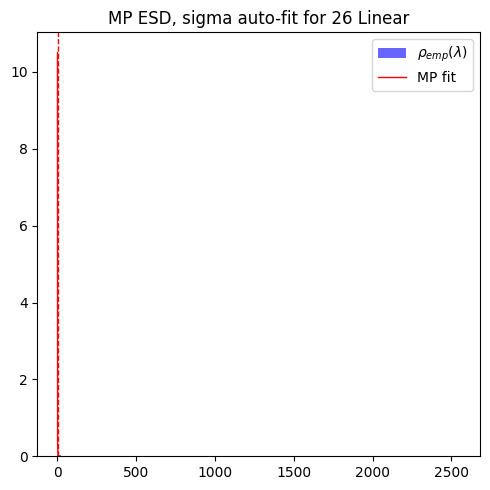

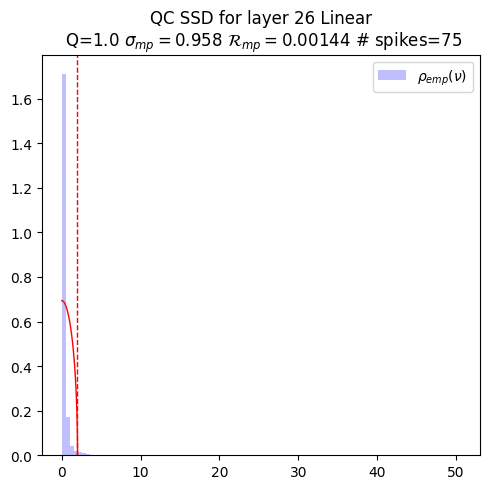

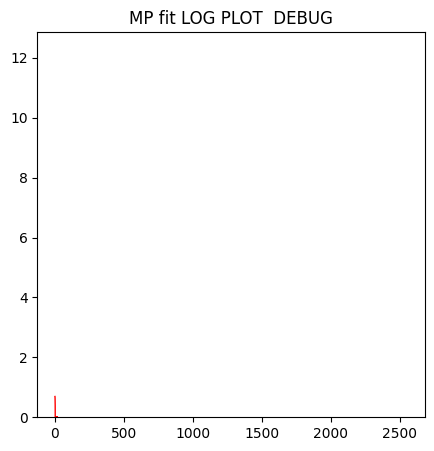

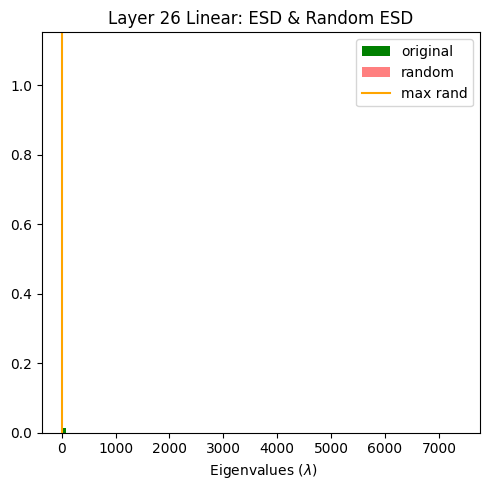

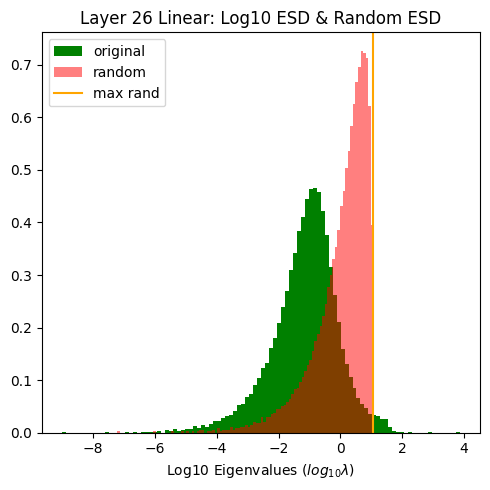

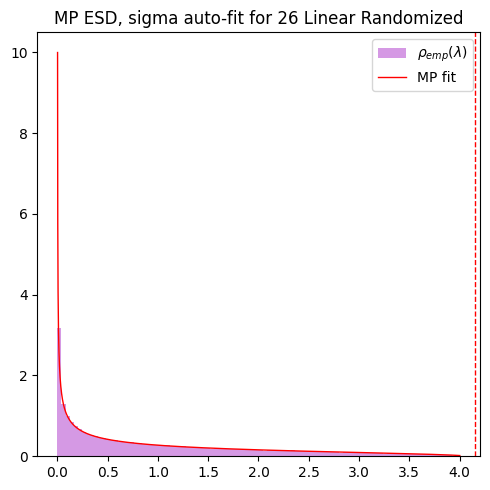

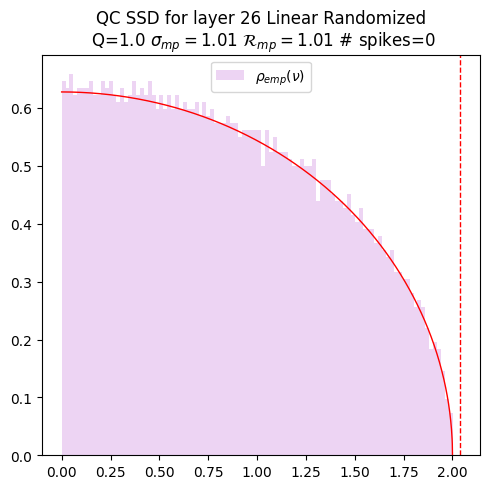

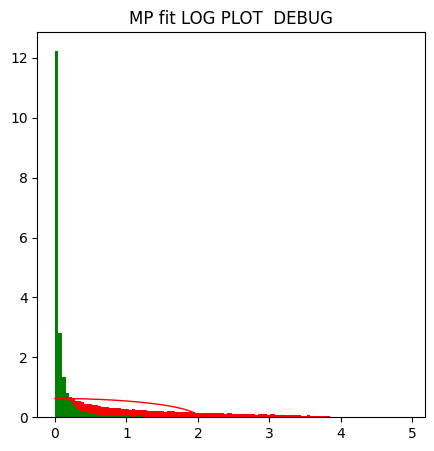

In [13]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)

model_name = f"albert-xxlarge-v2"
albert = AutoModel.from_pretrained(model_name)

watcher = ww.WeightWatcher(model=albert)
tpl_details = watcher.analyze(fit='TPL', randomize=True, mp_fit=True, plot=True)

In [14]:
tpl_details

layer_id       name         D        Lambda       M        N        Q  \
0        2  Embedding  0.051072  1.216890e-10   128.0  30000.0  234.375   
0        3  Embedding  0.120275  6.533480e-03   128.0    512.0    4.000   
0        8     Linear  0.089173  3.729240e-01   128.0   4096.0   32.000   
0       15     Linear  0.013634  2.622291e-03  4096.0   4096.0    1.000   
0       16     Linear  0.014376  3.015087e-03  4096.0   4096.0    1.000   
0       17     Linear  0.011887  8.598242e-02  4096.0   4096.0    1.000   
0       20     Linear  0.019249  6.918368e-09  4096.0   4096.0    1.000   
0       22     Linear  0.013932  1.167233e-04  4096.0  16384.0    4.000   
0       23     Linear  0.014830  4.324420e-09  4096.0  16384.0    4.000   
0       26     Linear  0.015816  8.359223e-05  4096.0   4096.0    1.000   

    W_scale     alpha  alpha_weighted  ...  sigma_mp  spectral_norm  \
0  0.072832  4.906064       15.609105  ...  0.533216    1519.128206   
0  0.762700  1.305822        1.802090  ...  0.124524      23.990687   
0  0.235277  1.000015        1.446811  ...  1.031595      27.976264   
0  0.247841  2.691679        7.037498  ...  1.010816     411.659520   
0  0.249638  2.702205        7.059956  ...  1.011313     409.887348   
0  0.463362  1.000014        1.868326  ...  1.013255      73.841258   
0  0.472314  3.285293        7.899656  ...  1.005061     253.834958   
0  0.100416  3.466093       11.922580  ...  0.932920    2752.803427   
0  0.100490  3.719278       13.057259  ...  0.952293    3241.136770   
0  0.587659  1.746223        6.755847  ...  0.957909    7393.230881   

   stable_rank     sv_max       warning  weak_rank_loss   ww_maxdist  \
0    15.884396  38.975995       success             0.0  1168.540420   
0     9.171908   4.898029  over-trained             0.0    20.239191   
0    82.653166   5.289259  over-trained             0.0     3.274468   
0   161.985189  20.289394       success             2.0   346.753576   
0   160.351410  20.245675       success             2.0   345.800525   
0   258.356814   8.593094  over-trained             2.0    55.257883   
0    72.334814  15.932199       success             2.0   235.991368   
0   147.564621  52.467165       success             0.0  2530.196475   
0   125.144919  56.930983       success             0.0  3011.647644   
0     1.604260  85.983899  over-trained             7.0  7381.622527   

   ww_softrank         xmax        xmin  
0     0.230782  1519.128206  217.708299  
0     0.156373    23.990687    0.001159  
0     0.882955    27.976264   19.896275  
0     0.157669   411.659520   40.170844  
0     0.156352   409.887348   41.001888  
0     0.251667    73.841258    8.427361  
0     0.070296   253.834958   10.780049  
0     0.080866  2752.803427  131.768471  
0     0.070805  3241.136770  136.061516  
0     0.001570  7393.230881    0.292989  

[10 rows x 48 columns]

## try intra also



INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': [17]}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:torch version 1.12.1
INFO:weightwatcher:framework from model = 2
INFO:weightwatcher:Filtering layer by id 17


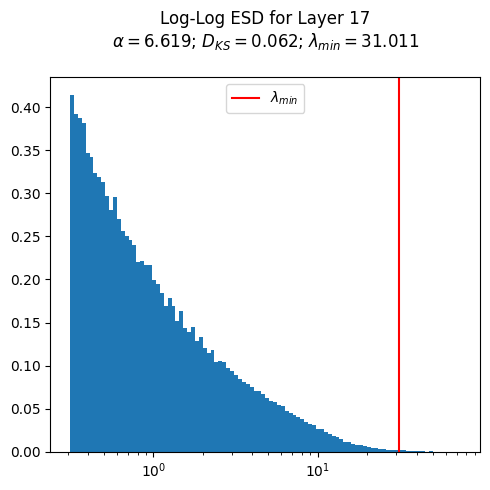

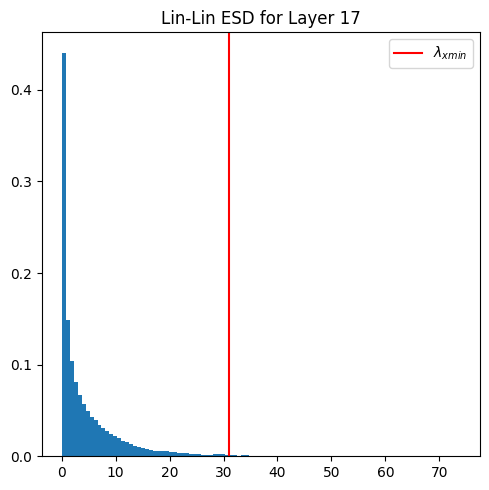

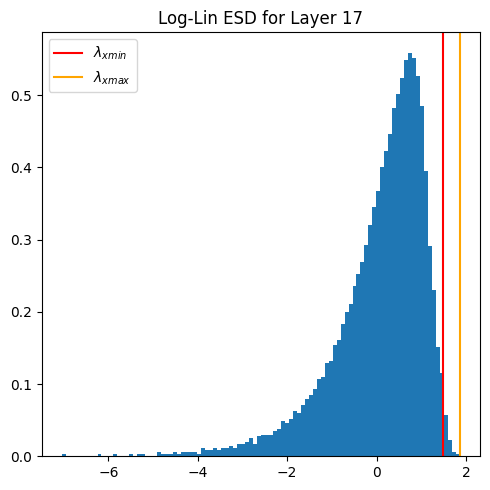

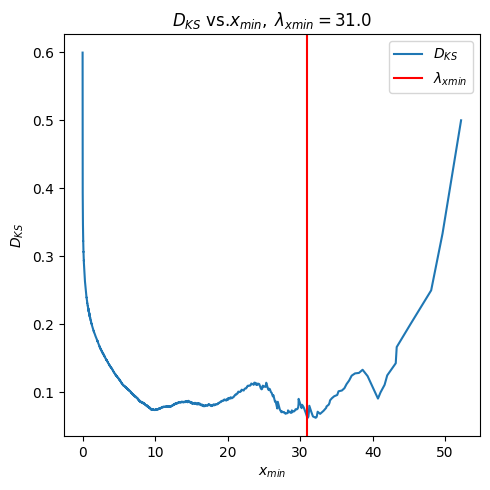

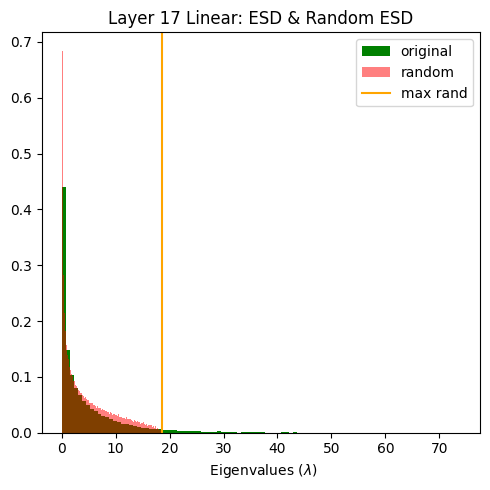

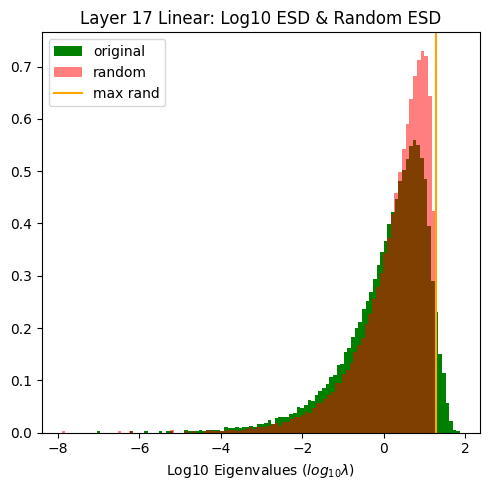

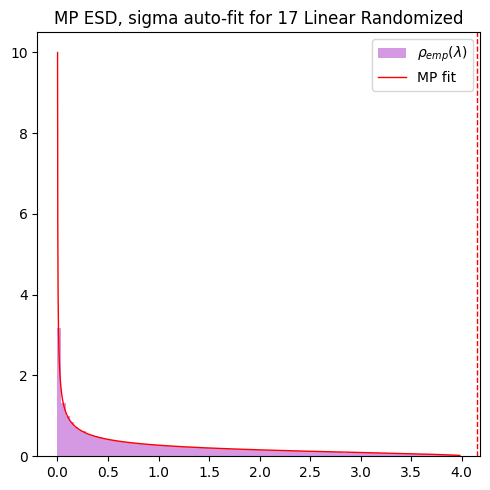

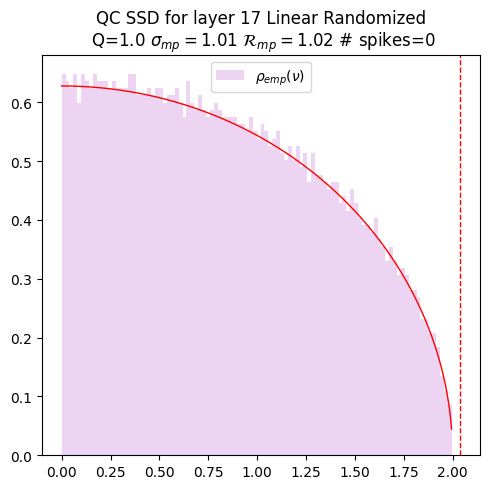

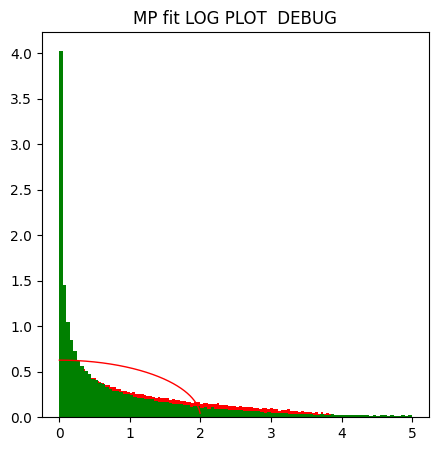

layer_id    name         D  Lambda       M       N    Q     alpha  \
0       17  Linear  0.062274    -1.0  4096.0  4096.0  1.0  6.618863   

   alpha_weighted   best_fit  ...     sigma spectral_norm  stable_rank  \
0       12.366015  power_law  ...  0.867009     73.841258   258.356814   

     sv_max        warning  weak_rank_loss  ww_maxdist ww_softrank       xmax  \
0  8.593094  under-trained             2.0   55.343097    0.250513  73.841258   

        xmin  
0  31.011205  

[1 rows x 42 columns]

In [32]:
watcher.analyze(plot=True, layers=[17], randomize=True)

In [69]:
all_esds = []

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize



python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1


INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': True, 'min_evals': 0, 'max_evals': None, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'pow

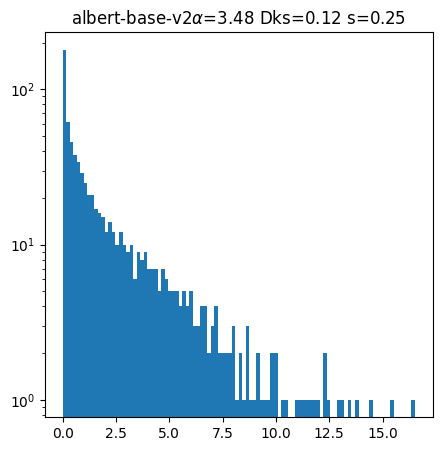

Some weights of the model checkpoint at albert-large-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normaliz



python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1


INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': True, 'min_evals': 0, 'max_evals': None, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'pow

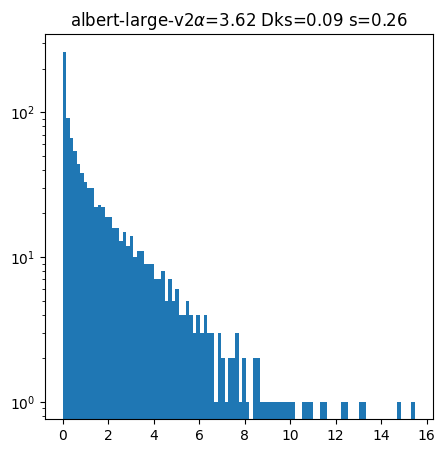

Some weights of the model checkpoint at albert-xlarge-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normali



python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1


INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': True, 'min_evals': 0, 'max_evals': None, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'pow

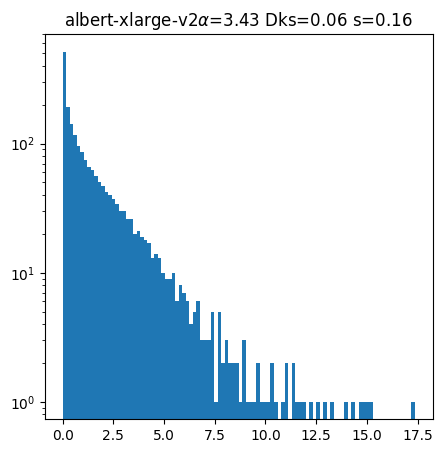

Some weights of the model checkpoint at albert-xxlarge-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normal



python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1


INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': True, 'min_evals': 0, 'max_evals': None, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'pow

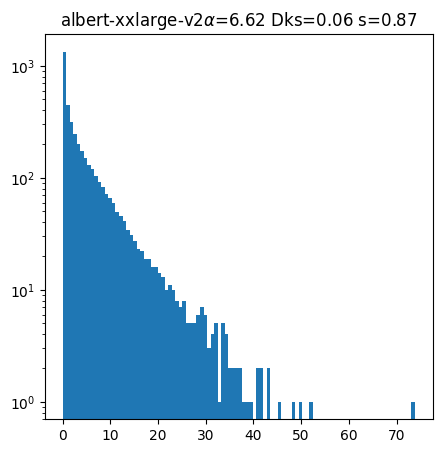

In [70]:
import powerlaw
for version in versions:
    model_name = f"albert-{version}-v2"
    albert = AlbertModel.from_pretrained(model_name)

    watcher = ww.WeightWatcher(model=albert)
    details = watcher.analyze(fit='PL', randomize=True, mp_fit=True, layers=[17])

    alpha = details.alpha.to_numpy()[0]
    Dks = details.D.to_numpy()[0]
    sigma = details.sigma.to_numpy()[0]
    
    esd17 = watcher.get_ESD(layer=17)
    all_esds.append(esd17)
    plt.hist(esd17, bins=100, log=True);
    plt.title(model_name + r"$\alpha$="+"{0:0.2f} Dks={1:0.2f} s={2:0.2f}".format(alpha,Dks,sigma)  )
    plt.show()

Calculating best minimal value for power law fit


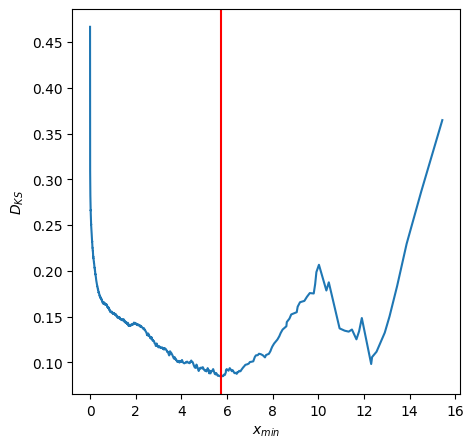

Calculating best minimal value for power law fit


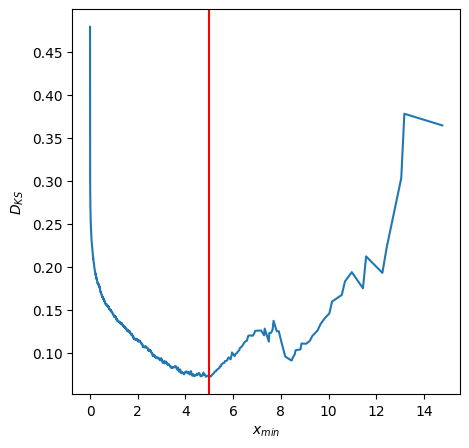

Calculating best minimal value for power law fit


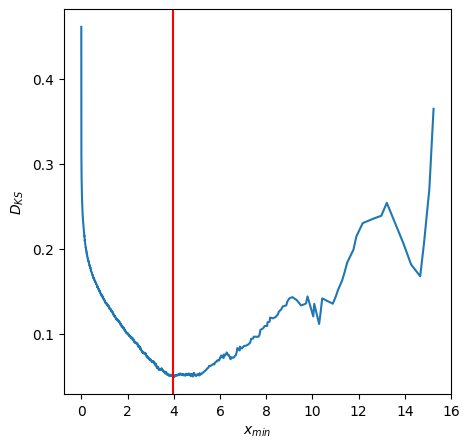

Calculating best minimal value for power law fit


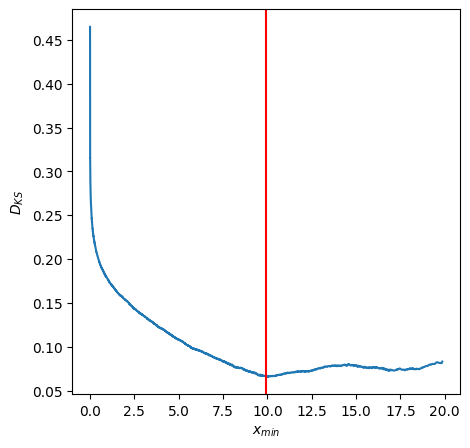

len=768 alpha=3.75 sigma=0.30 D=0.08
len=1024 alpha=3.72 sigma=0.30 D=0.07
len=2048 alpha=3.43 sigma=0.16 D=0.05
len=4096 alpha=3.07 sigma=0.08 D=0.07


In [100]:

import powerlaw
results = []
xmins = []
xmin_range = (0,20)

for esd in all_esds:
    fit = powerlaw.Fit(esd, xmin=xmin_range)
    r = "len={} alpha={:0.2f} sigma={:0.2f} D={:0.2f}".format(len(esd), fit.alpha, fit.sigma, fit.D)
    results.append(r)
    xmins.append(fit.xmin)
    plt.plot(fit.xmins, fit.Ds, label=r'$D_{KS}$')
    plt.axvline(x=fit.xmin, color='red', label=r'$\lambda_{xmin}$')
    plt.xlabel(r'$x_{min}$')
    plt.ylabel(r'$D_{KS}$')
    title = r'$D_{KS}$' + ' vs.' + r'$x_{min},\;\lambda_{xmin}=$'
    plt.show()
    
for x in results:
    print(x)

Calculating best minimal value for power law fit


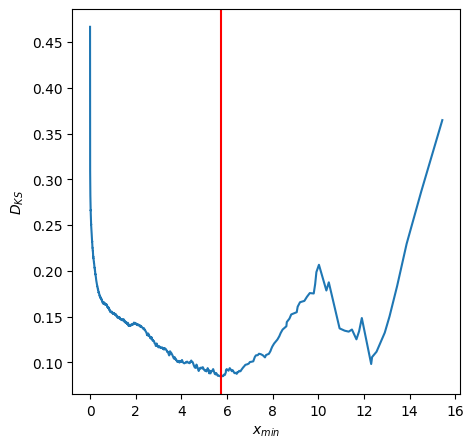

Calculating best minimal value for power law fit


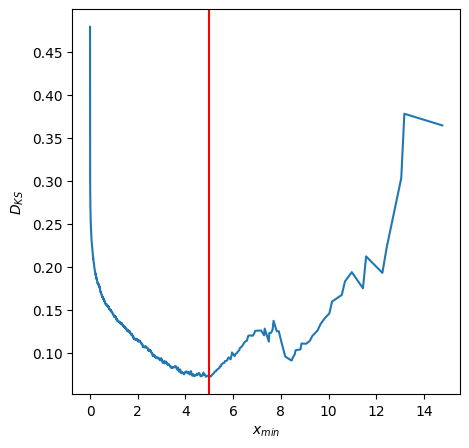

Calculating best minimal value for power law fit


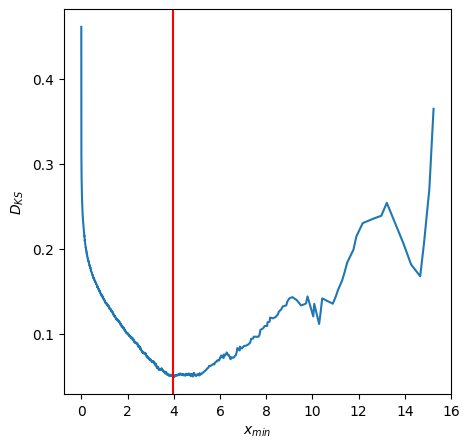

Calculating best minimal value for power law fit


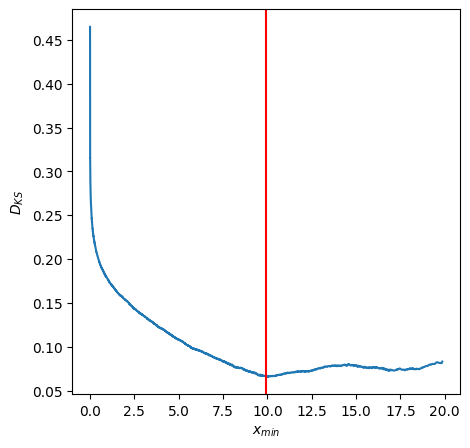

len=768 alpha=3.75 sigma=0.30 D=0.08
len=1024 alpha=3.72 sigma=0.30 D=0.07
len=2048 alpha=3.43 sigma=0.16 D=0.05
len=4096 alpha=3.07 sigma=0.08 D=0.07


In [100]:

import powerlaw
results = []
xmins = []
xmin_range = (0,20)

for esd in all_esds:
    fit = powerlaw.Fit(esd, xmin=xmin_range)
    r = "len={} alpha={:0.2f} sigma={:0.2f} D={:0.2f}".format(len(esd), fit.alpha, fit.sigma, fit.D)
    results.append(r)
    xmins.append(fit.xmin)
    plt.plot(fit.xmins, fit.Ds, label=r'$D_{KS}$')
    plt.axvline(x=fit.xmin, color='red', label=r'$\lambda_{xmin}$')
    plt.xlabel(r'$x_{min}$')
    plt.ylabel(r'$D_{KS}$')
    title = r'$D_{KS}$' + ' vs.' + r'$x_{min},\;\lambda_{xmin}=$'
    plt.show()
    
for x in results:
    print(x)

In [105]:
for xmin, esd in zip(xmins, all_esds):
    pcnt = 100.0* xmin/np.max(esd)
    print(xmin, np.max(esd), pcnt)

5.749609234007018 16.515302557429354 34.813829259340906
4.989851481602524 15.479221739517156 32.23580335995737
3.9582841813807788 17.371241675621402 22.786420540886198
9.934738235373288 73.84125797601153 13.454183349098333


16.515302557429354
Calculating best minimal value for power law fit
15.479221739517156
Calculating best minimal value for power law fit
17.371241675621402
Calculating best minimal value for power law fit
73.84125797601153%
Calculating best minimal value for power law fit


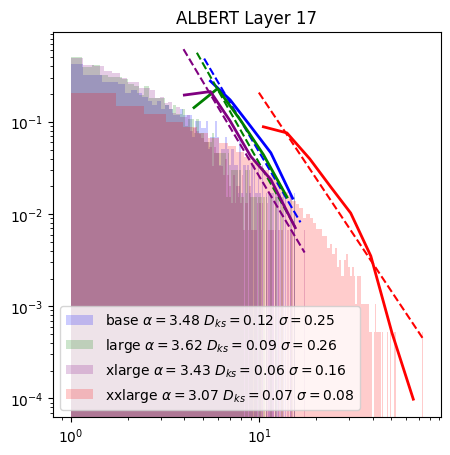

In [122]:
import warnings
warnings.filterwarnings('ignore')

for idx, esd in enumerate(all_esds):
    print(np.max(esd))
    fit = powerlaw.Fit(esd, xmin=xmin_range, xmax=np.max(esd))
    fig2 = fit.plot_pdf(color=colors[idx], linewidth=0) # invisbile
    fig2 = fit.plot_pdf(color=colors[idx], linewidth=2)
    fit.power_law.plot_pdf(color=colors[idx], linestyle='--', ax=fig2)
    label = versions[idx]+r" $\alpha=$"+f"{fit.alpha:0.2f}"+r" $D_{ks}=$"+f"{fit.D:0.2f}"+r" $\sigma=$"+f"{fit.sigma:0.2f}"
    plt.hist(esd[esd>1], bins=100, log=True, density=True, alpha=0.2, color=colors[idx], label=label);
plt.title("ALBERT Layer 17")
plt.legend()

73.84125797601153
Calculating best minimal value for power law fit


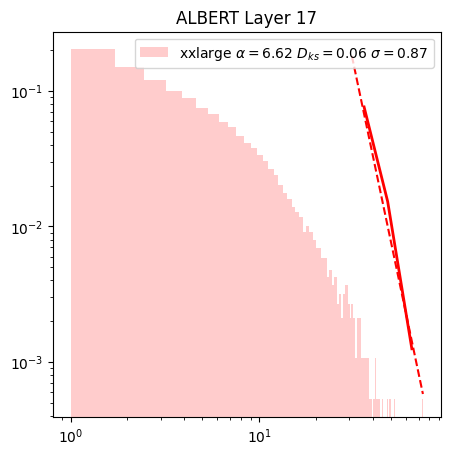

In [123]:
import warnings
warnings.filterwarnings('ignore')

esd = all_esds[3]
print(np.max(esd))
fit = powerlaw.Fit(esd, xmax=np.max(esd))
fig2 = fit.plot_pdf(color=colors[idx], linewidth=0) # invisbile
fig2 = fit.plot_pdf(color=colors[idx], linewidth=2)
fit.power_law.plot_pdf(color=colors[idx], linestyle='--', ax=fig2)
label = versions[idx]+r" $\alpha=$"+f"{fit.alpha:0.2f}"+r" $D_{ks}=$"+f"{fit.D:0.2f}"+r" $\sigma=$"+f"{fit.sigma:0.2f}"
plt.hist(esd[esd>1], bins=100, log=True, density=True, alpha=0.2, color=colors[idx], label=label);
plt.title("ALBERT Layer 17")
plt.legend()

INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': [17]}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:torch version 1.12.1
INFO:weightwatcher:framework from model = 2
INFO:weightwatcher:Filtering layer by id 17


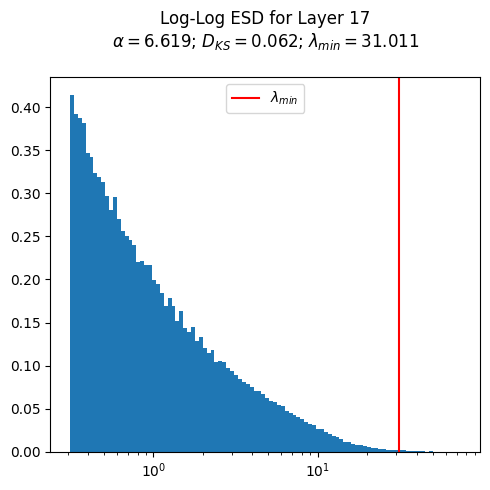

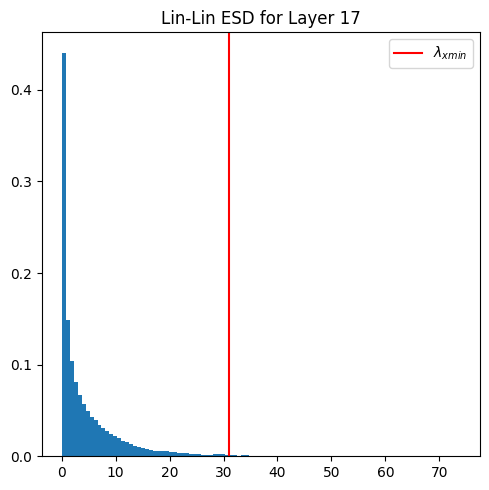

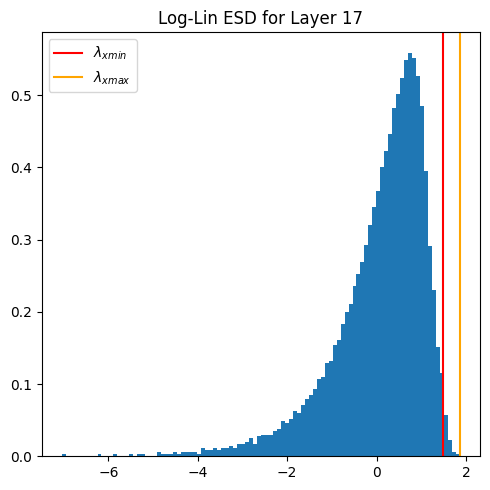

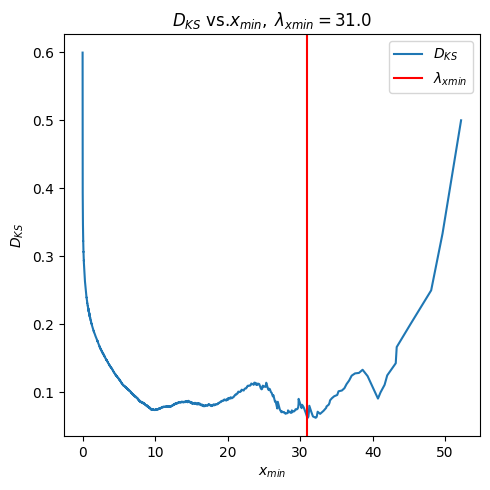

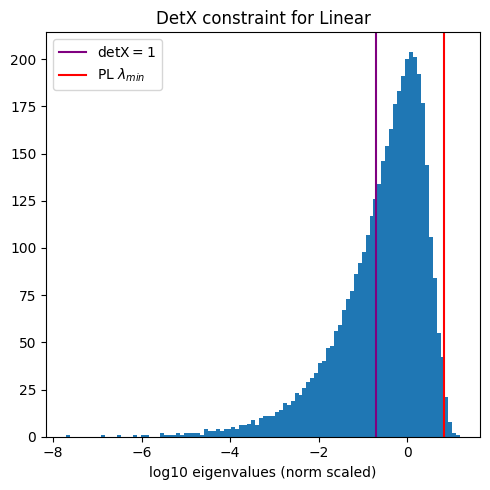

layer_id    name         D  Lambda       M       N    Q     alpha  \
0       17  Linear  0.062274    -1.0  4096.0  4096.0  1.0  6.618863   

   alpha_weighted   best_fit  ...  rank_loss   rf     sigma spectral_norm  \
0       12.366015  power_law  ...        0.0  1.0  0.867009     73.841258   

   stable_rank    sv_max        warning  weak_rank_loss       xmax       xmin  
0   258.356814  8.593094  under-trained             2.0  73.841258  31.011205  

[1 rows x 34 columns]

<Figure size 500x500 with 0 Axes>

In [133]:
watcher.analyze(layers=[17],plot=True, detX=True)

Some weights of the model checkpoint at albert-xlarge-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normali



python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1


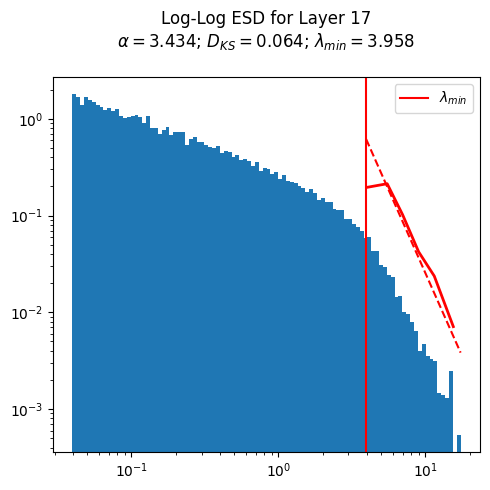

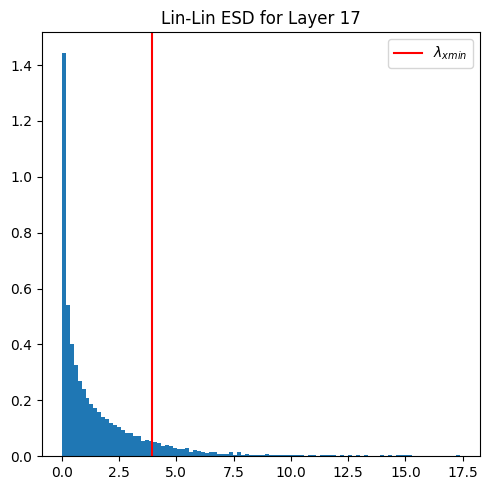

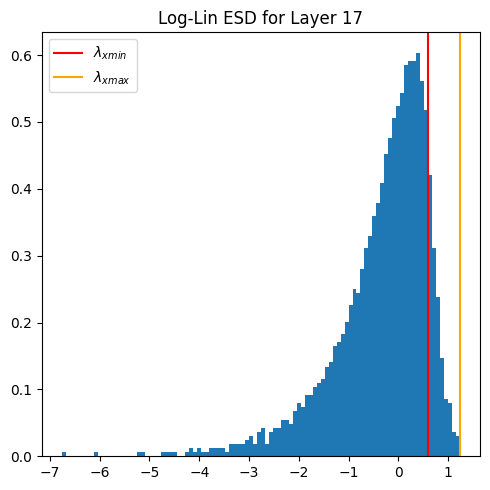

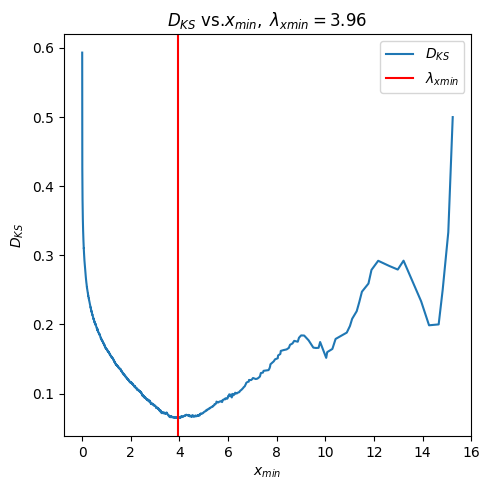

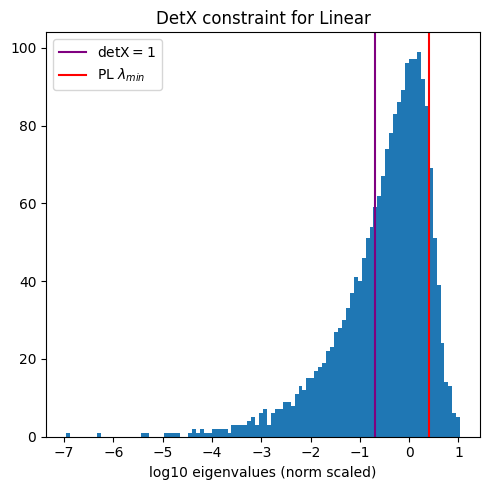

layer_id    name         D  Lambda       M       N    Q     alpha  \
0       17  Linear  0.064478    -1.0  2048.0  2048.0  1.0  3.433957   

   alpha_weighted   best_fit  ...  rank_loss   rf     sigma spectral_norm  \
0        4.257525  power_law  ...        0.0  1.0  0.162264     17.371242   

   stable_rank    sv_max  warning  weak_rank_loss       xmax      xmin  
0   187.632605  4.167882  success             2.0  17.371242  3.958284  

[1 rows x 34 columns]

<Figure size 500x500 with 0 Axes>

In [135]:
model_name = f"albert-xlarge-v2"
albert = AlbertModel.from_pretrained(model_name)
watcher = ww.WeightWatcher(model=albert)
watcher.analyze(layers=[17],plot=True, detX=True)

Some weights of the model checkpoint at albert-xlarge-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.dense.bias', 'predictions.decoder.bias', 'predictions.dense.weight', 'predictions.decoder.weight', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
INFO:weightwatcher:

python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normali



python      version 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
numpy       version 1.19.5
torch version 1.12.1


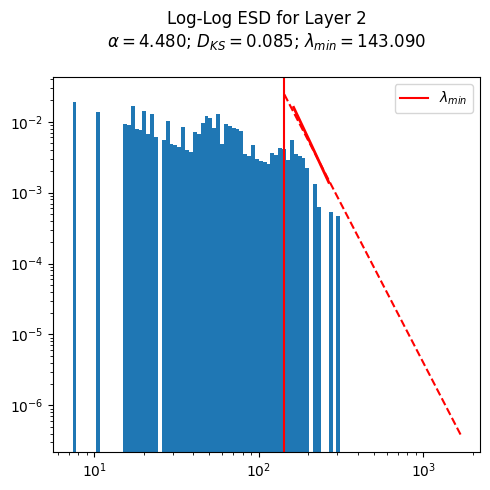

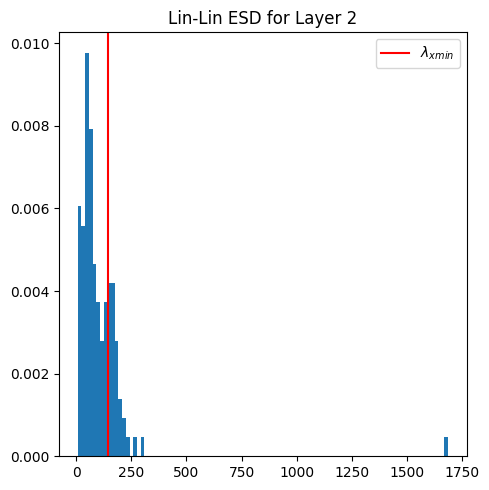

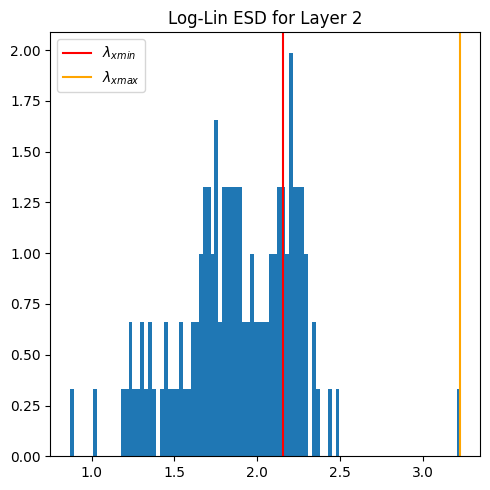

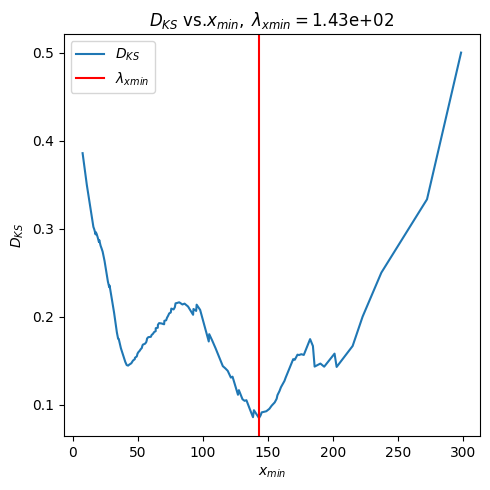

<Figure size 500x500 with 0 Axes>

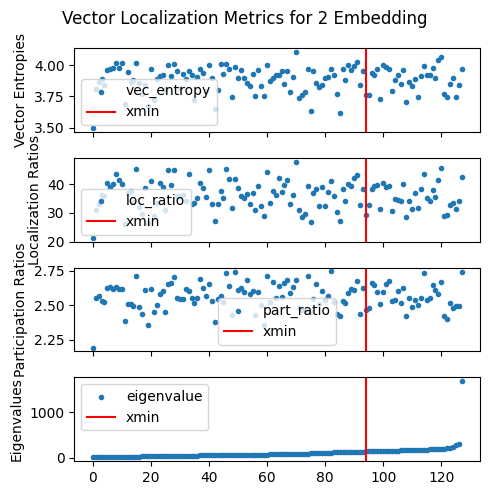

<Figure size 500x500 with 0 Axes>

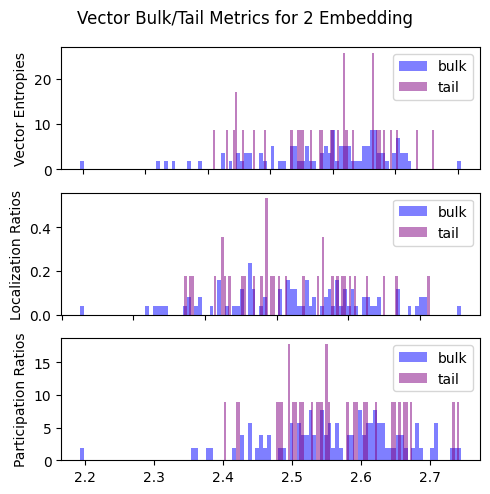

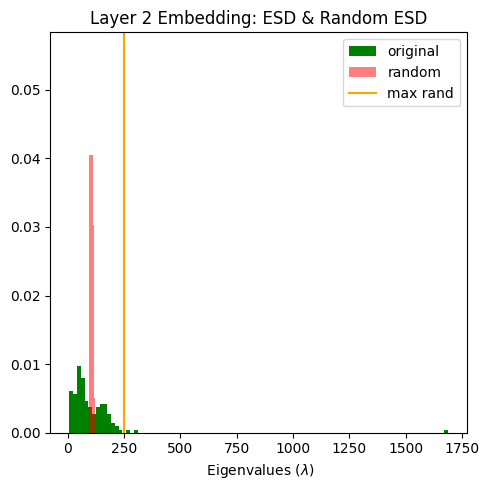

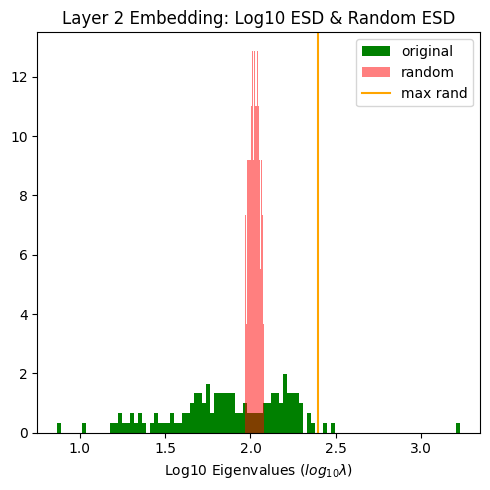

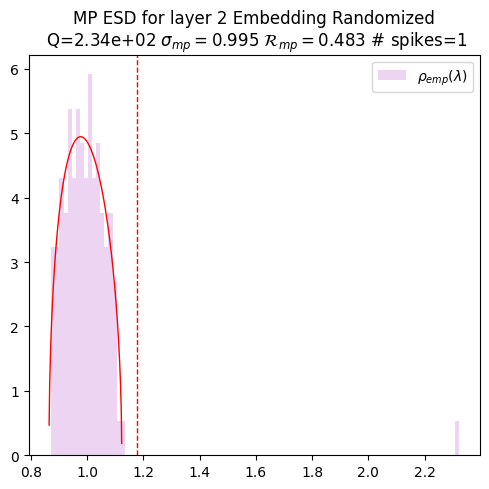

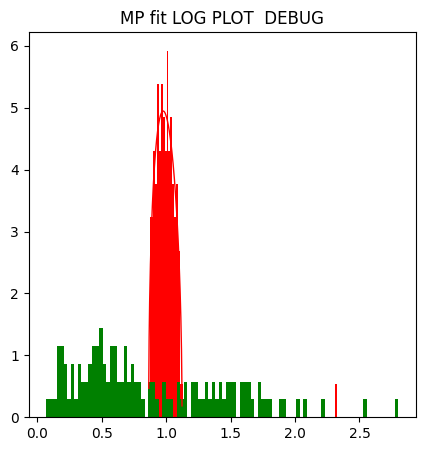

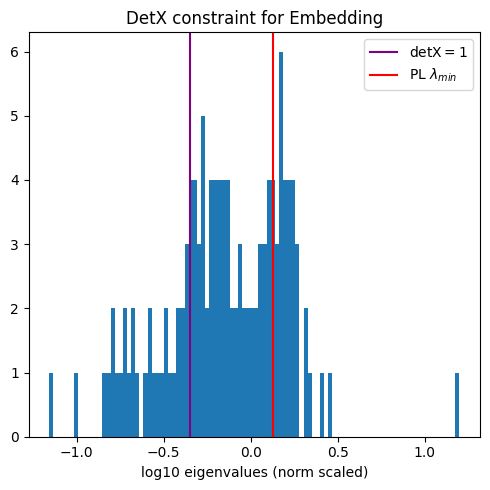

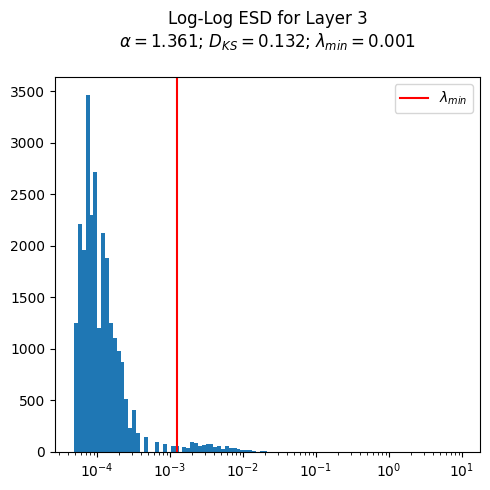

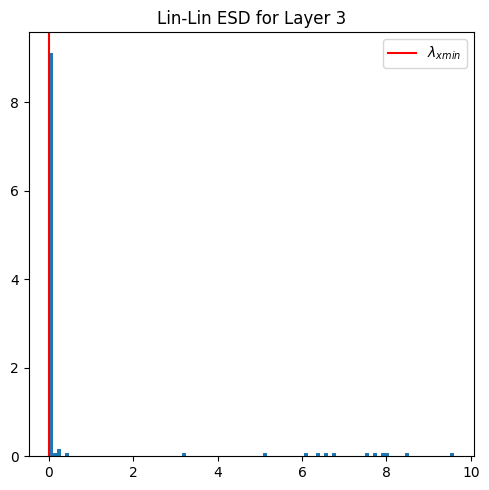

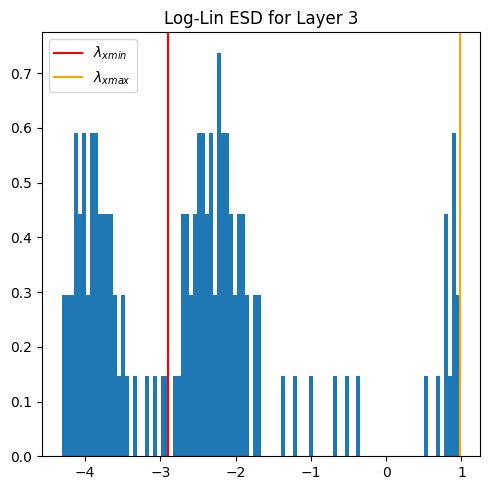

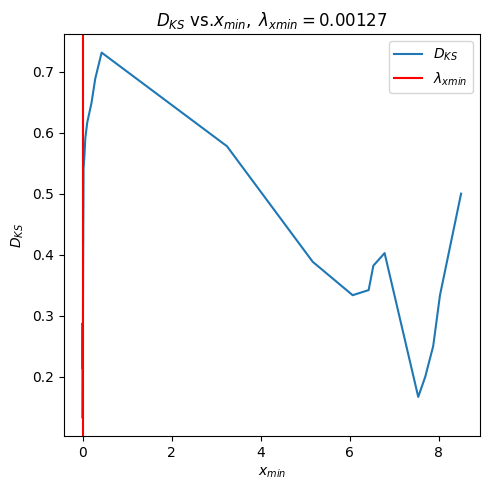

<Figure size 500x500 with 0 Axes>

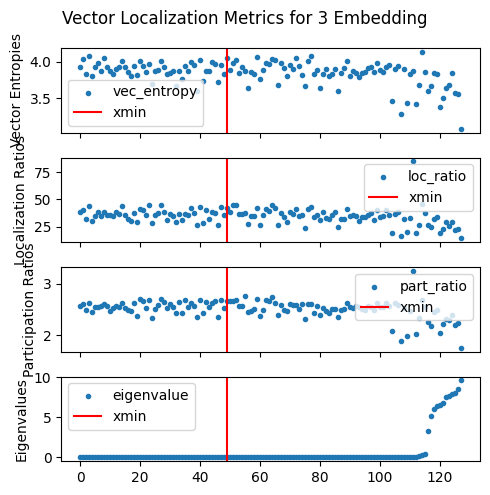

<Figure size 500x500 with 0 Axes>

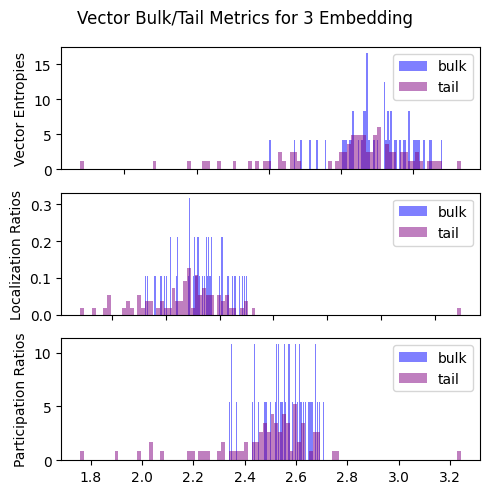

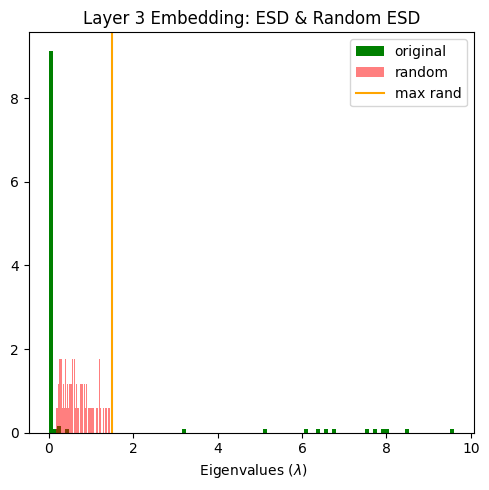

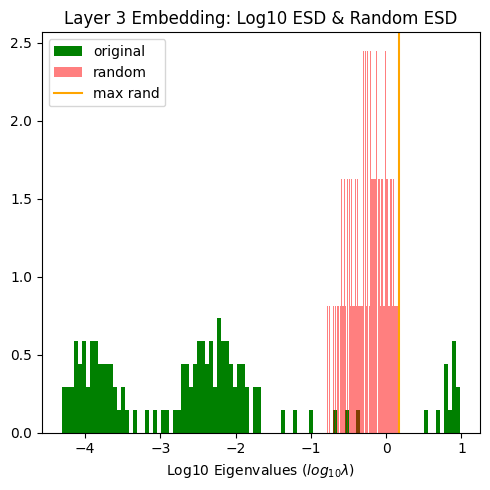

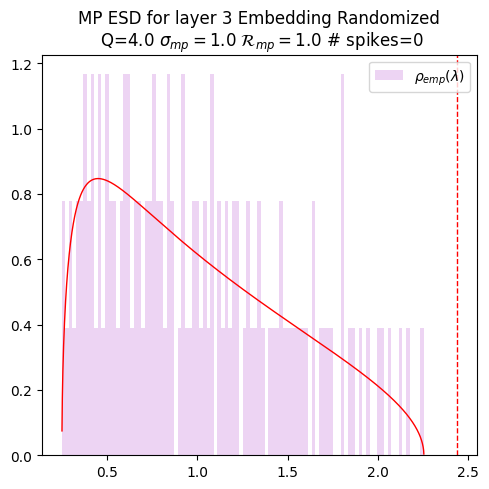

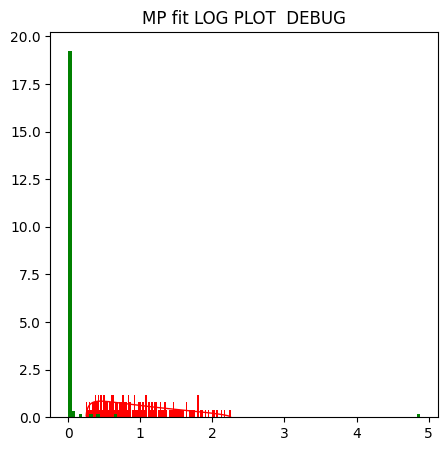

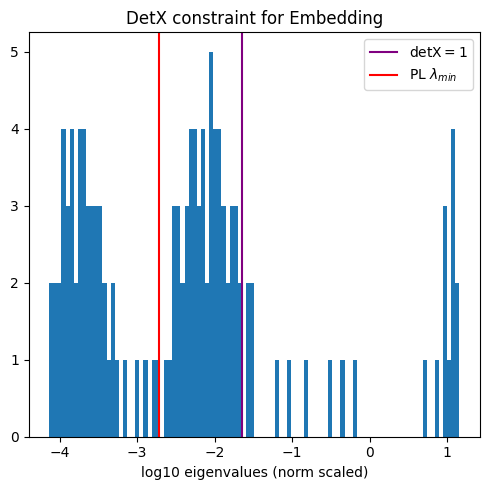

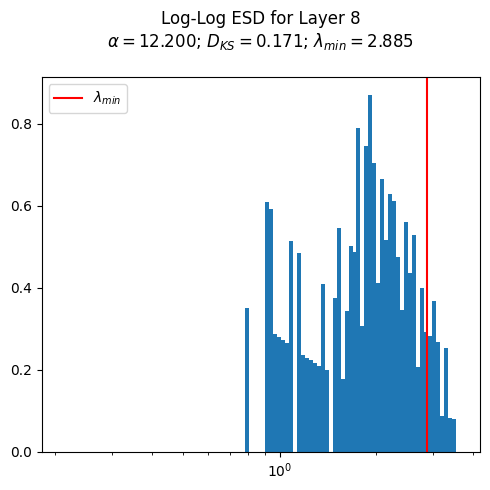

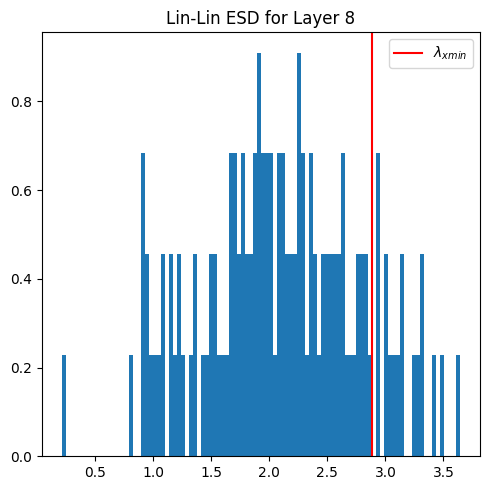

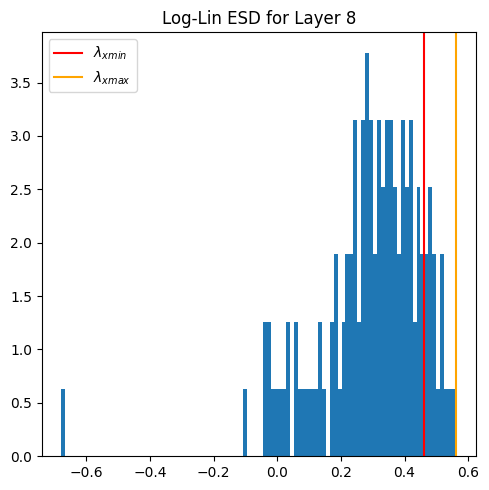

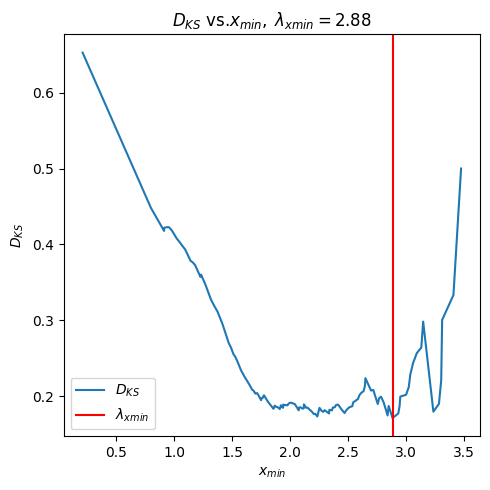

<Figure size 500x500 with 0 Axes>

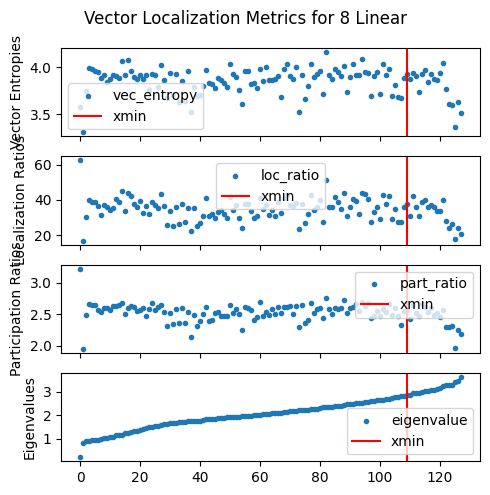

<Figure size 500x500 with 0 Axes>

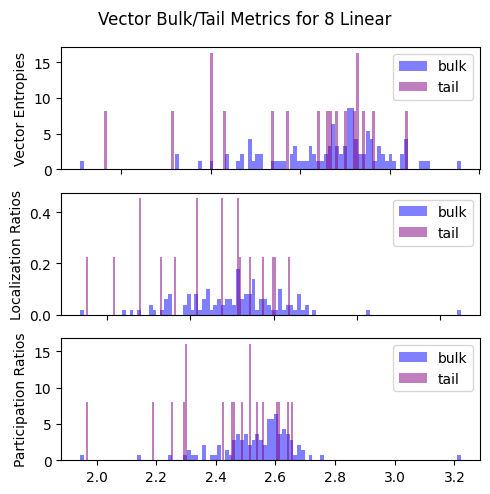

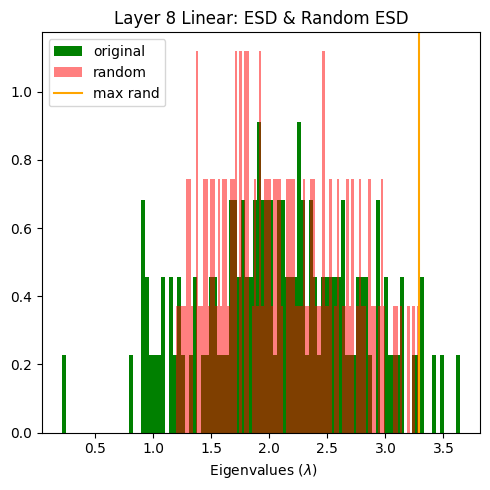

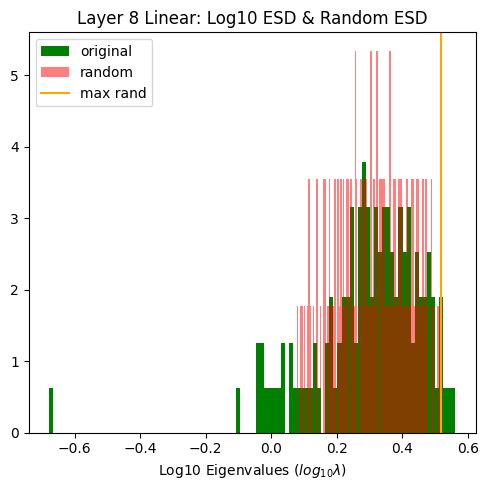

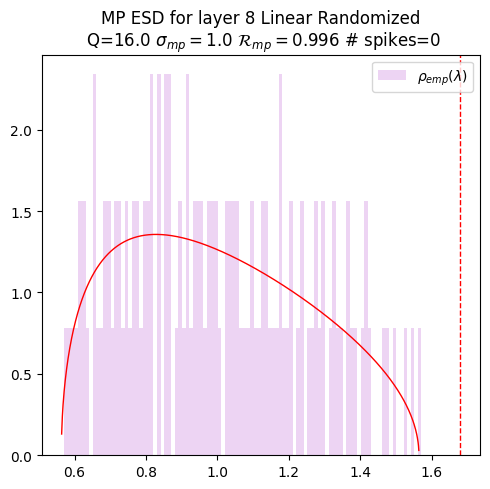

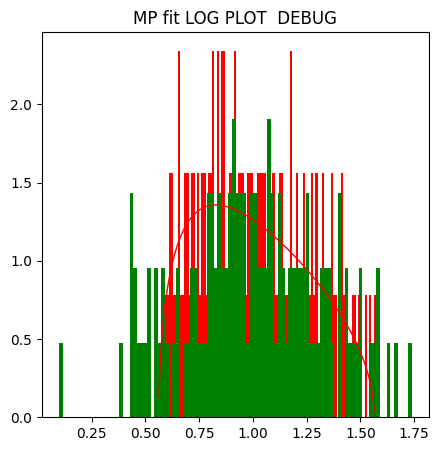

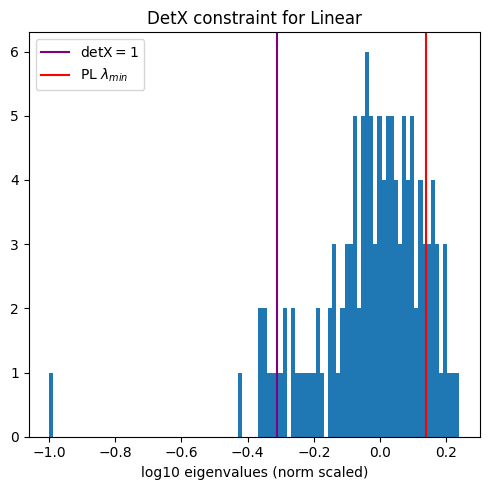

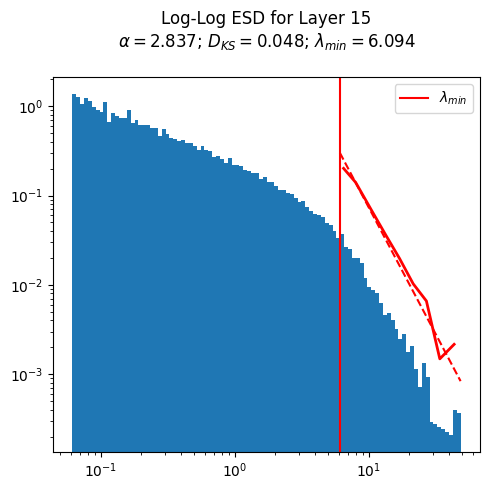

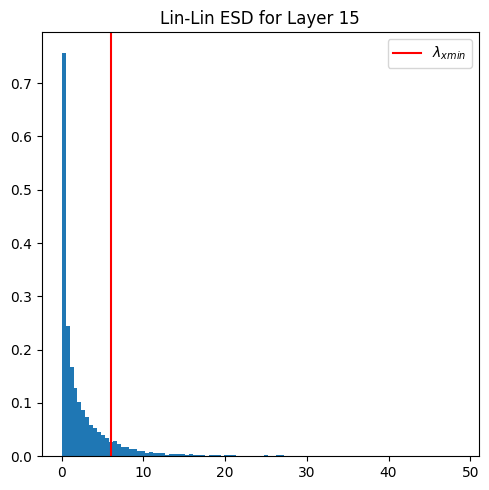

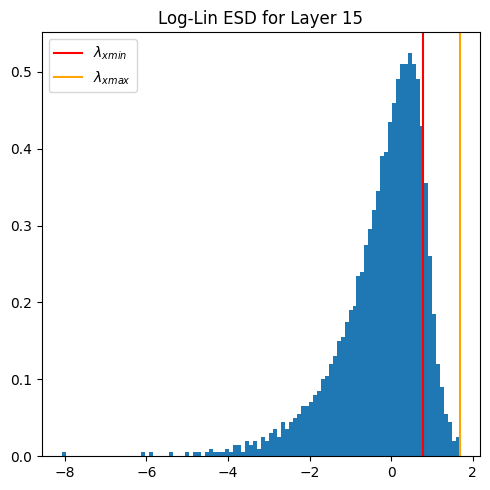

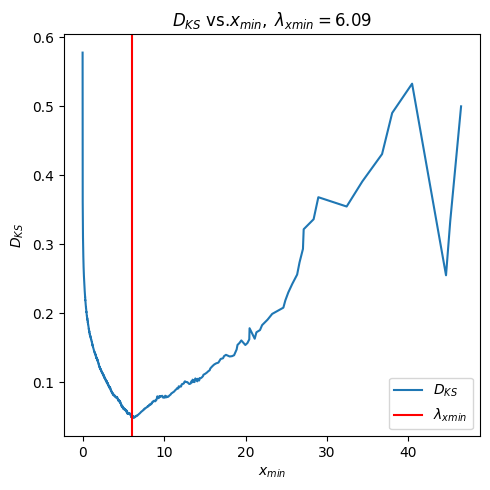

<Figure size 500x500 with 0 Axes>

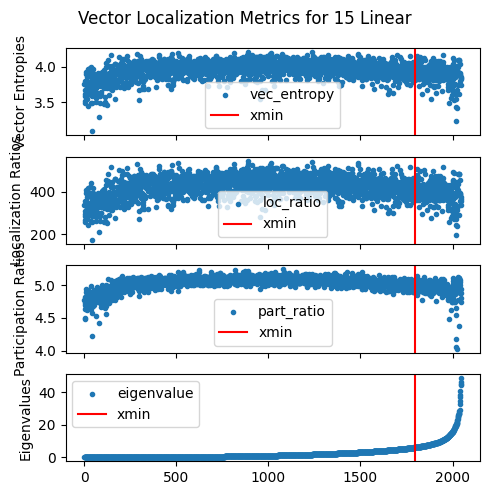

<Figure size 500x500 with 0 Axes>

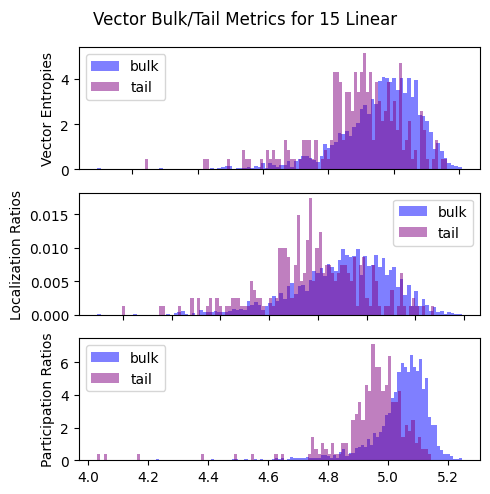

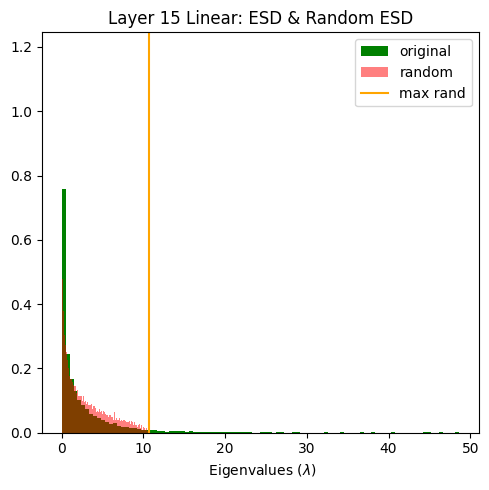

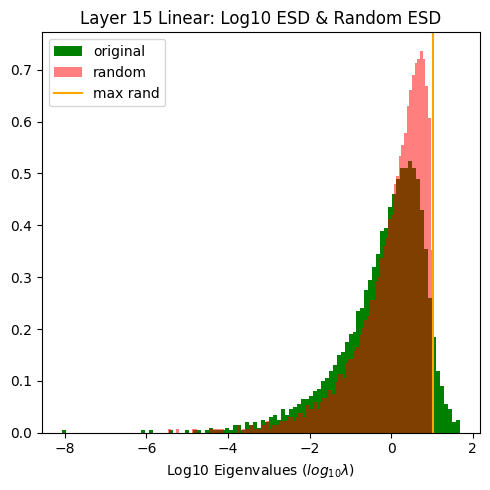

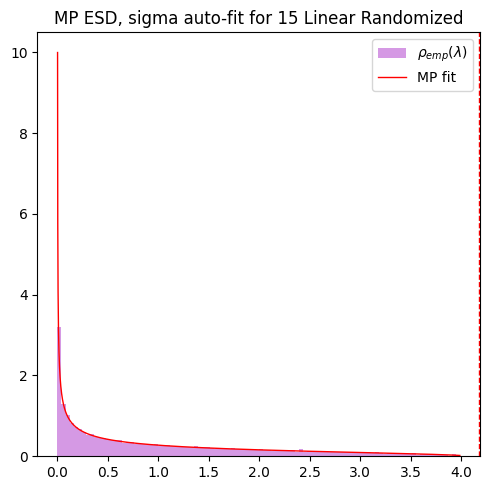

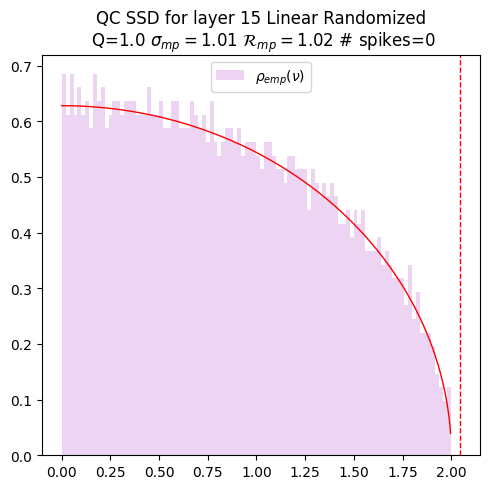

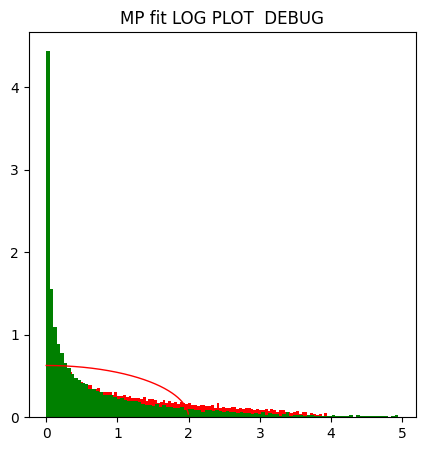

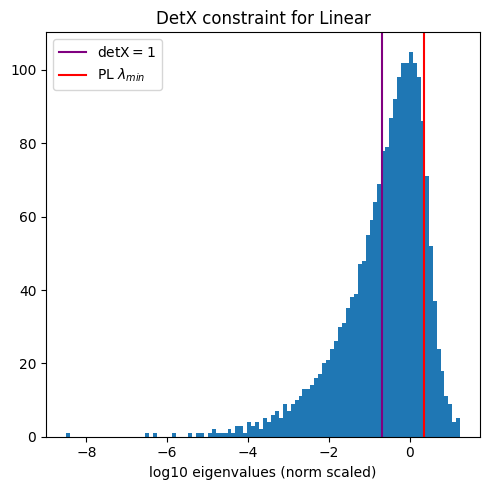

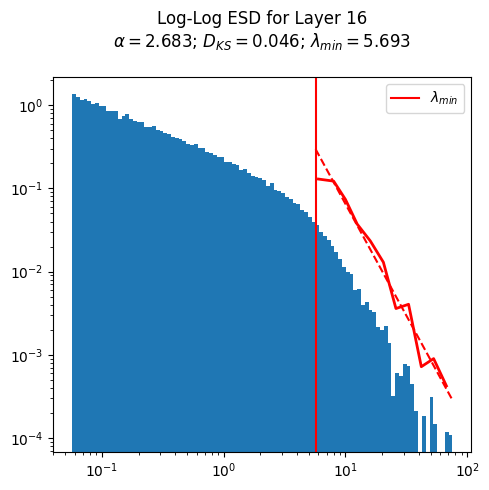

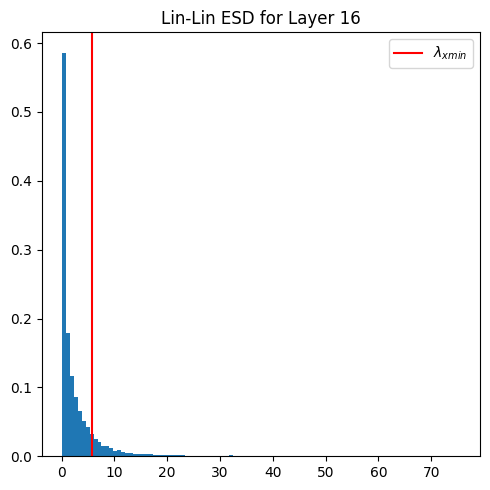

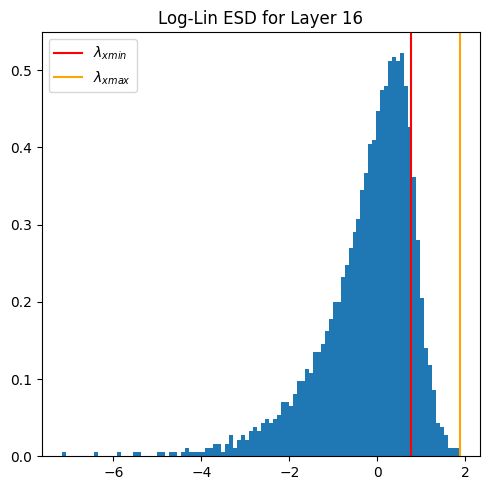

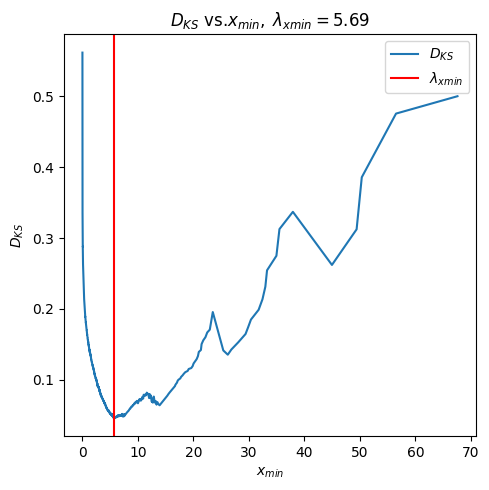

<Figure size 500x500 with 0 Axes>

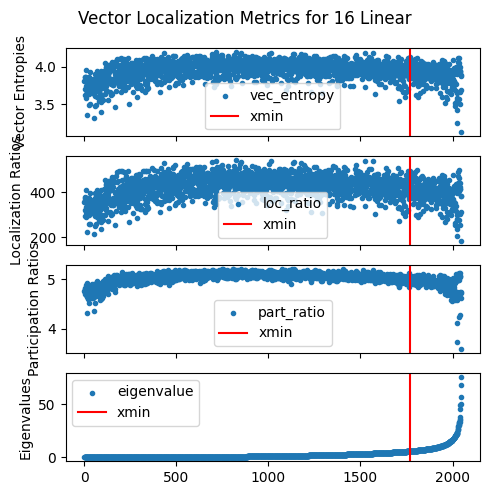

<Figure size 500x500 with 0 Axes>

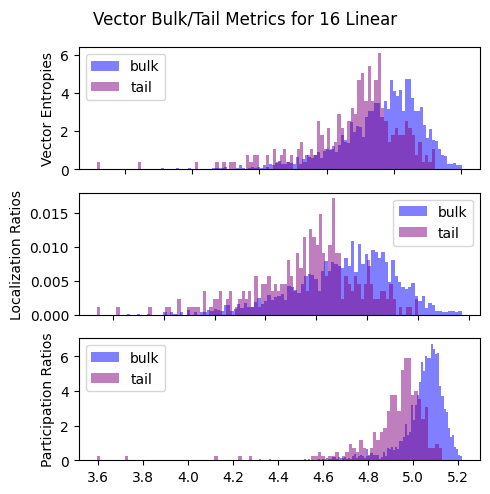

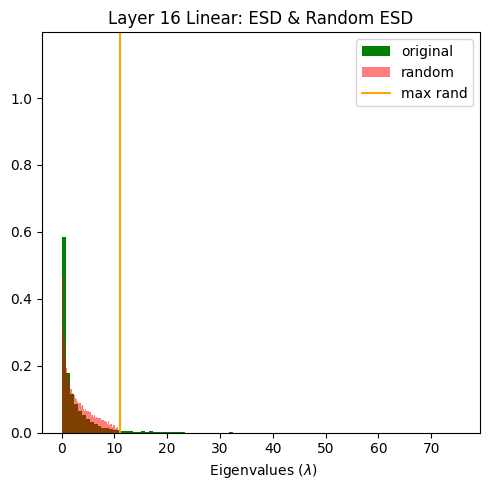

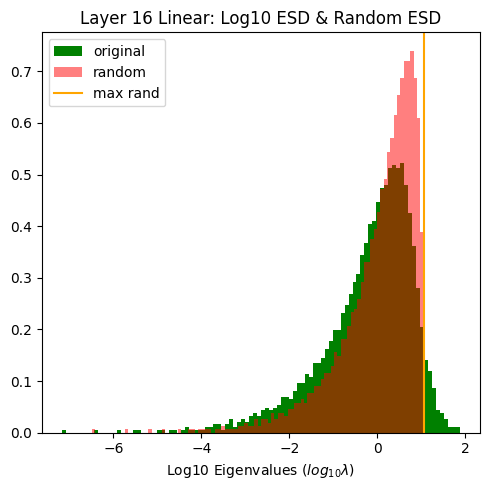

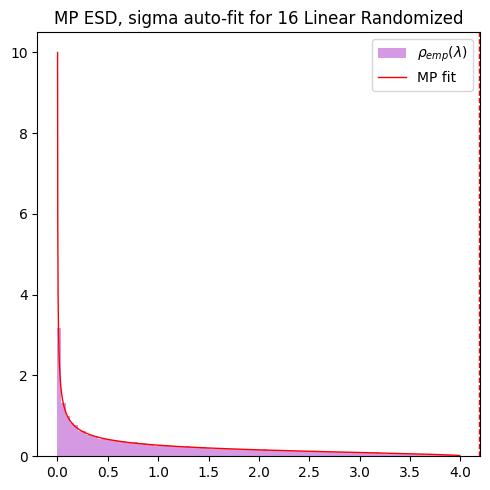

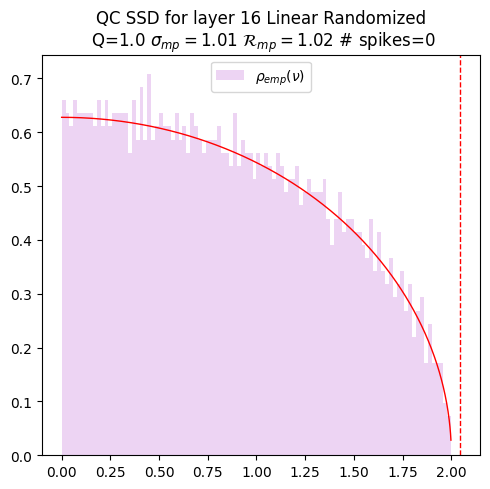

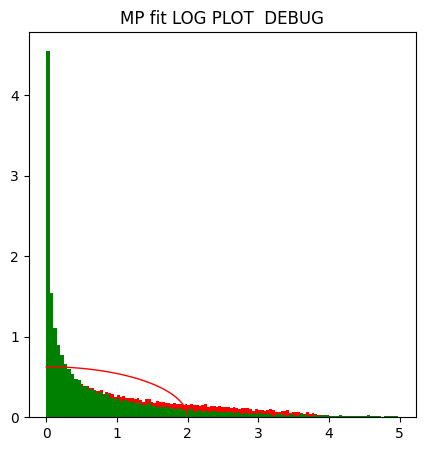

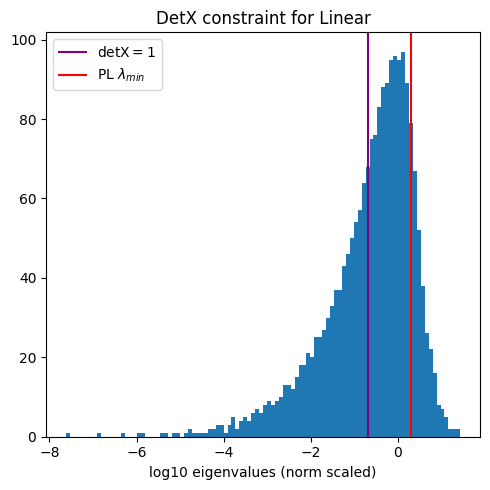

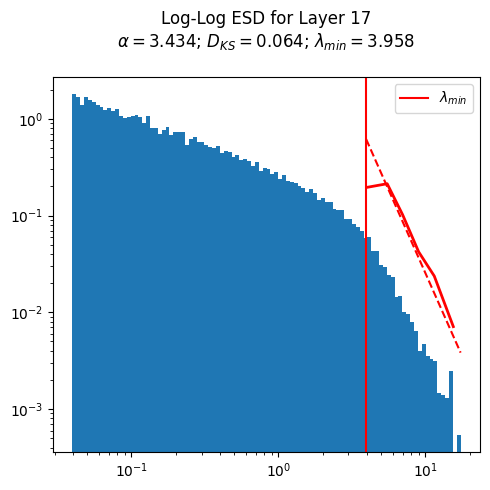

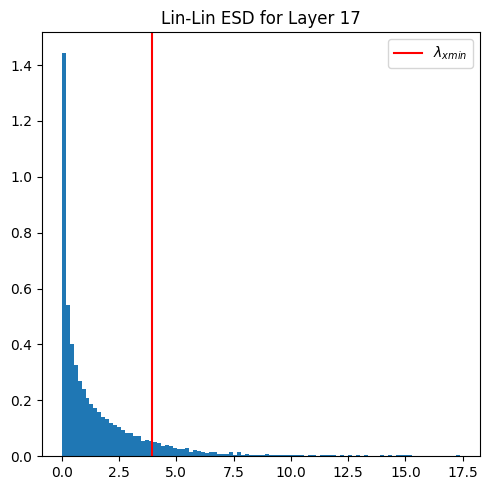

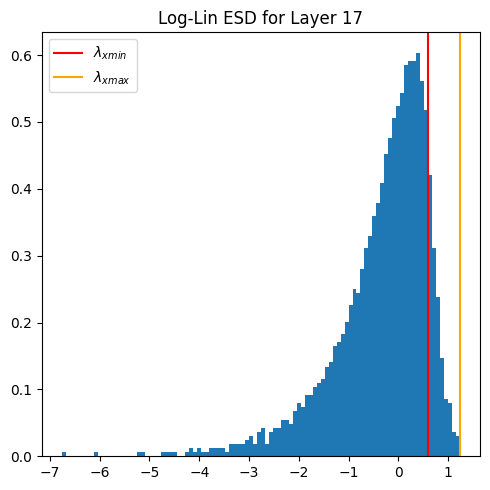

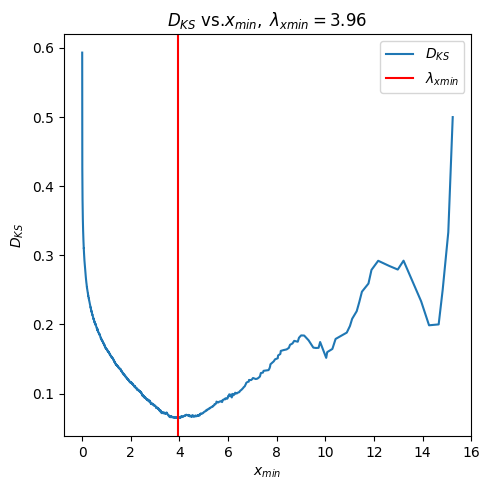

<Figure size 500x500 with 0 Axes>

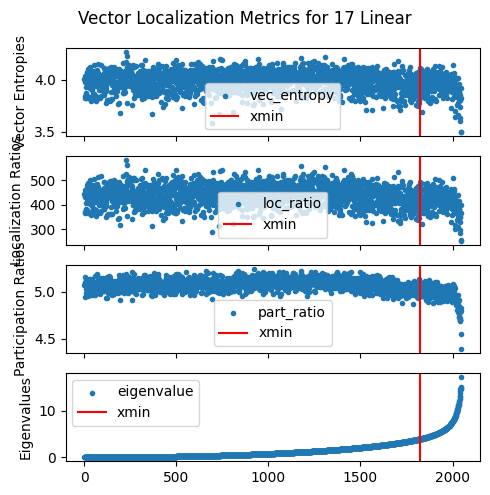

<Figure size 500x500 with 0 Axes>

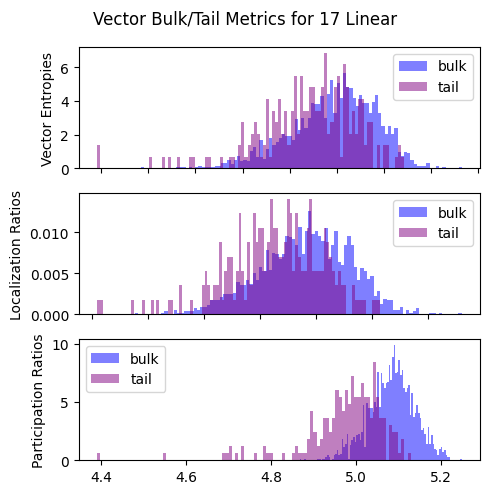

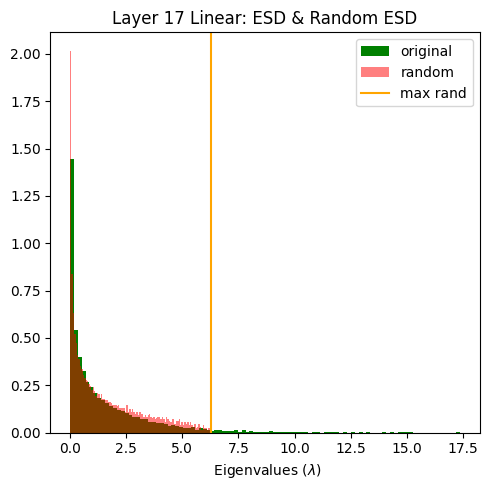

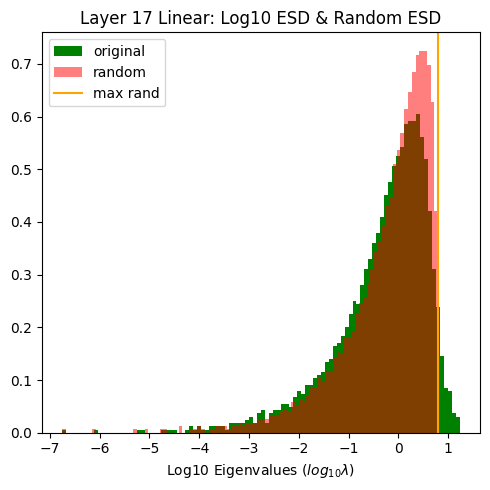

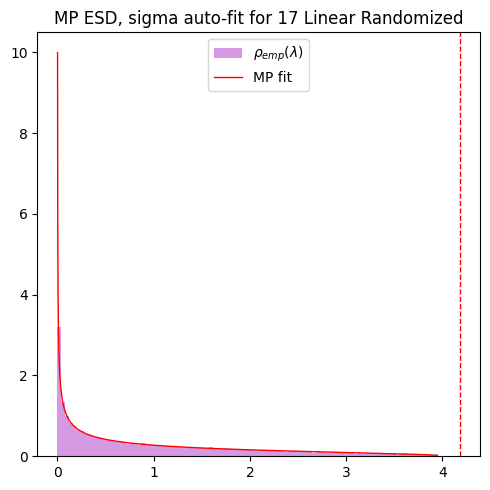

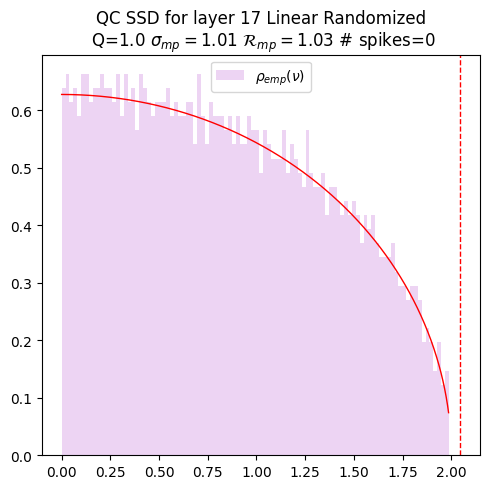

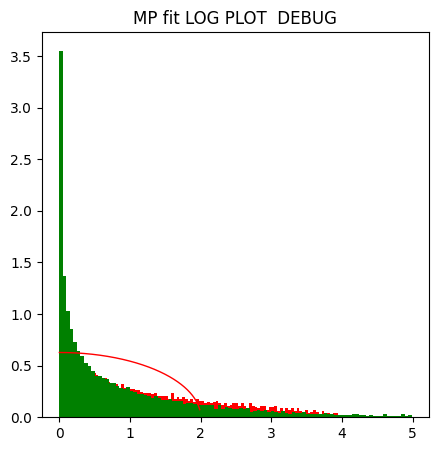

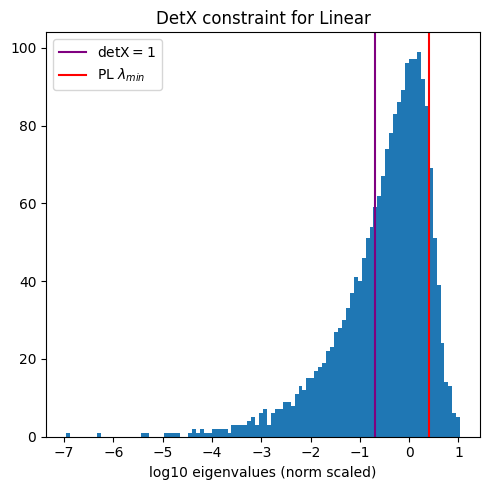

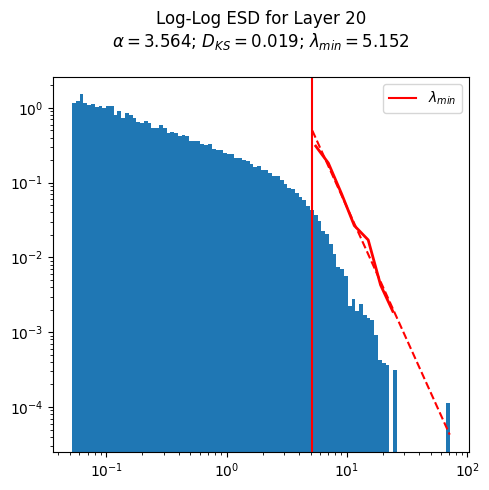

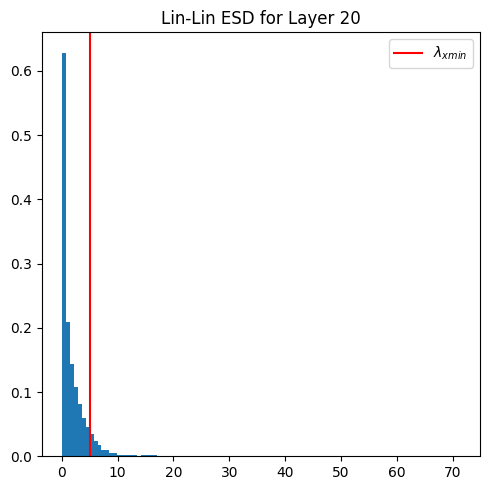

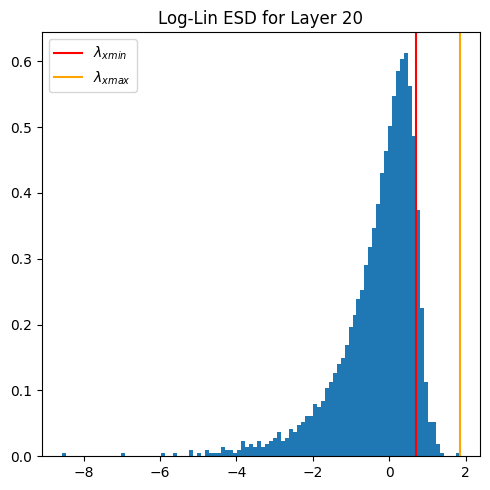

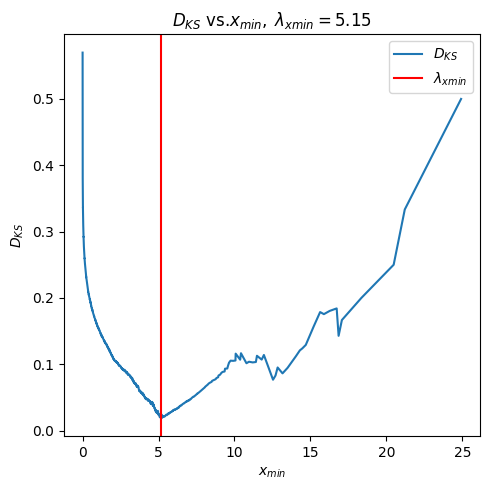

<Figure size 500x500 with 0 Axes>

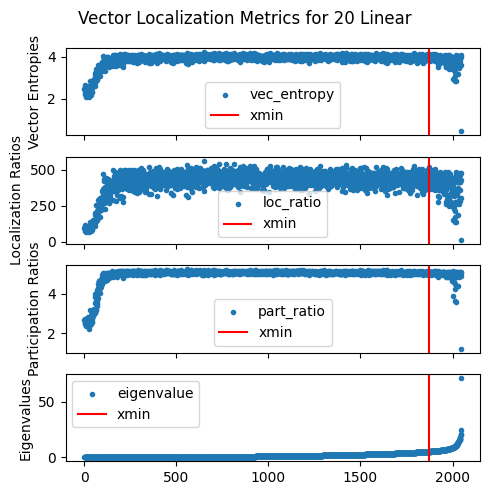

<Figure size 500x500 with 0 Axes>

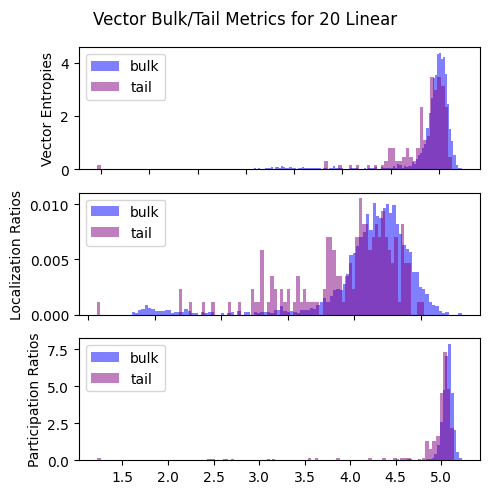

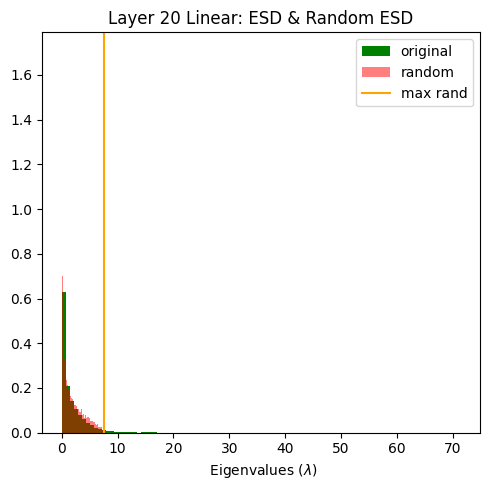

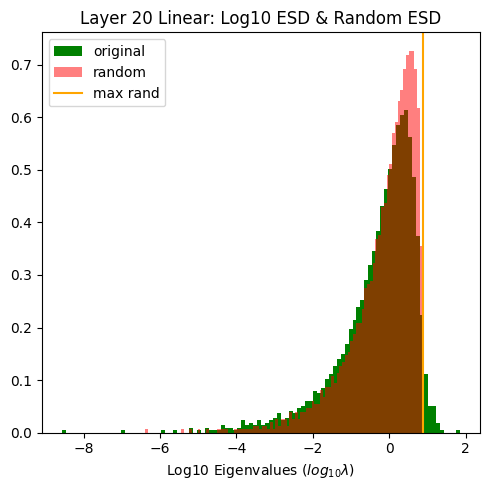

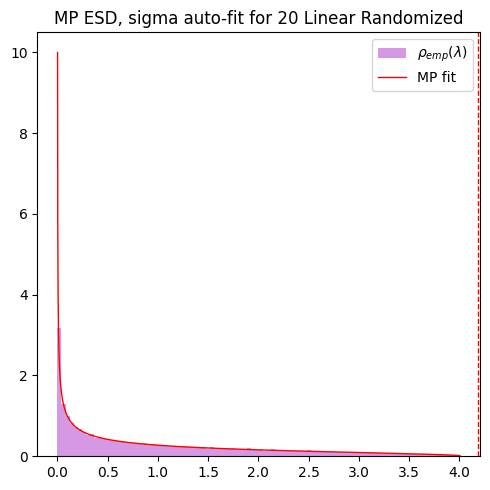

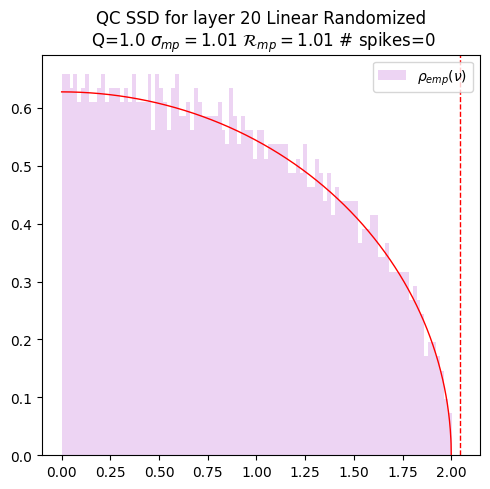

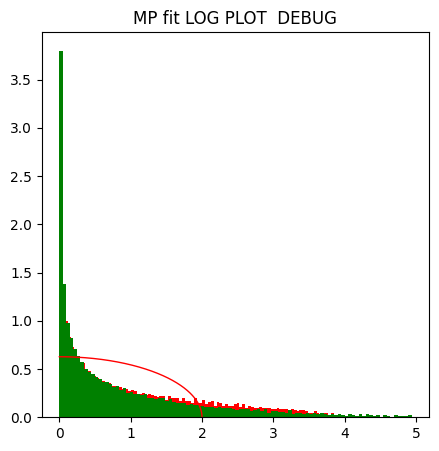

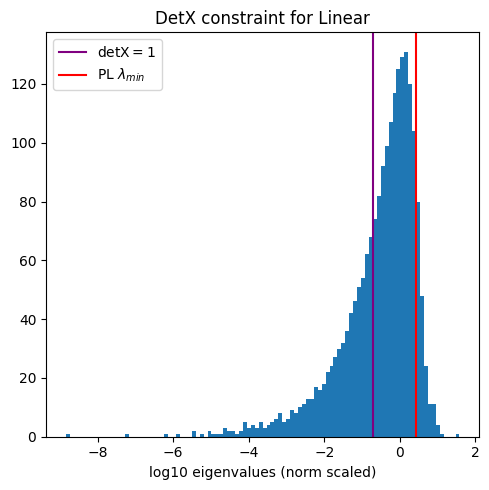

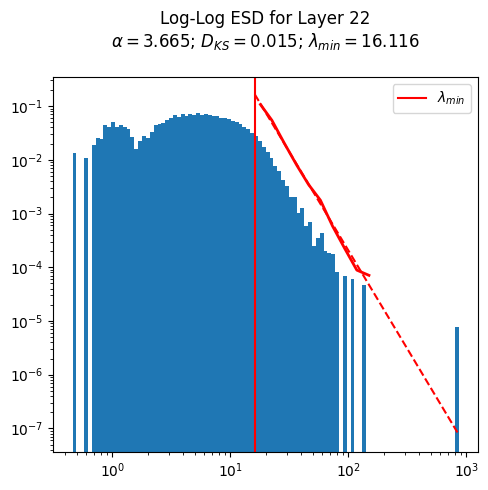

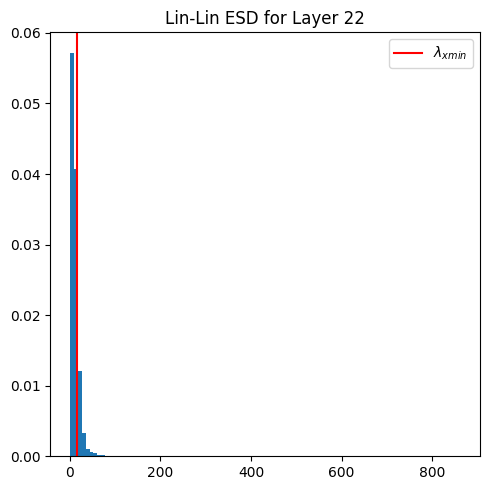

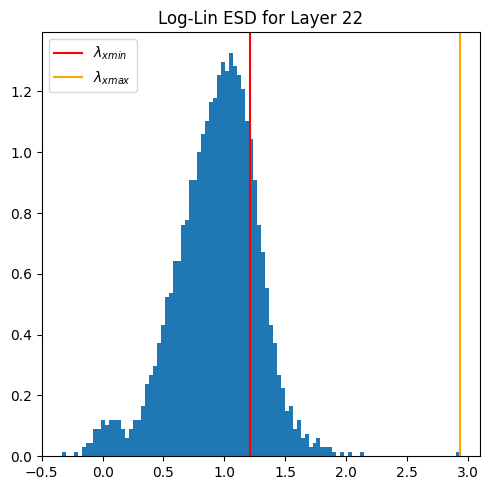

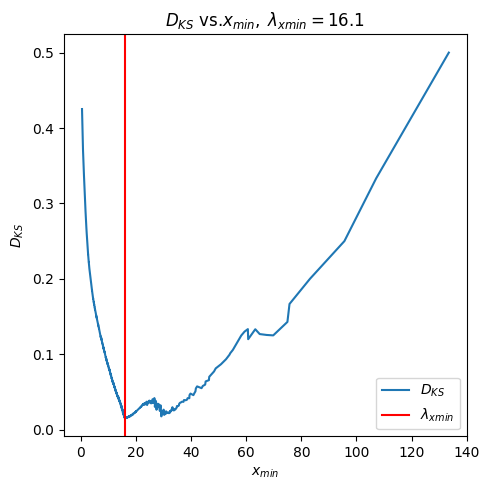

<Figure size 500x500 with 0 Axes>

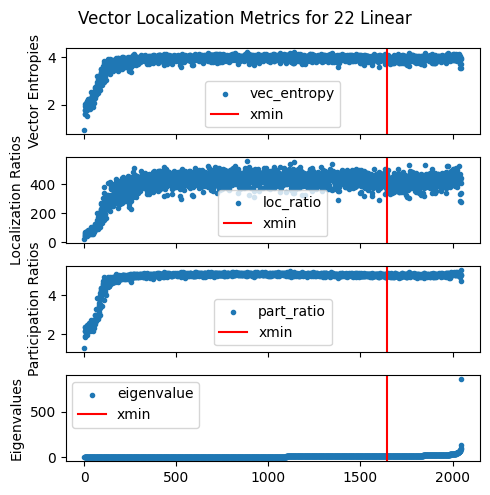

<Figure size 500x500 with 0 Axes>

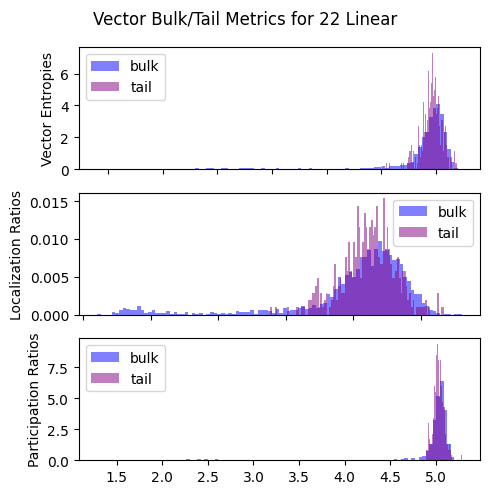

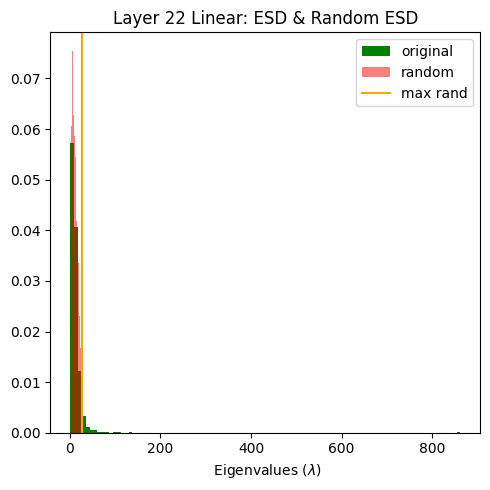

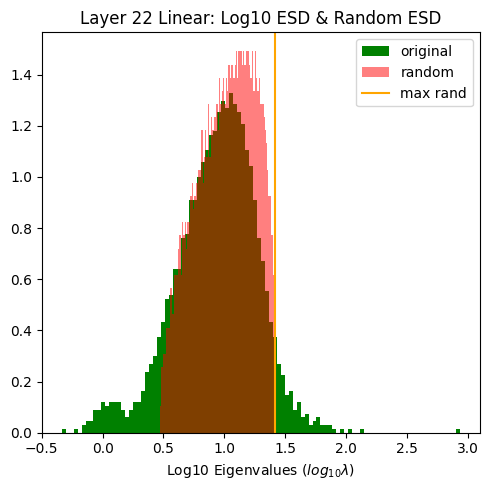

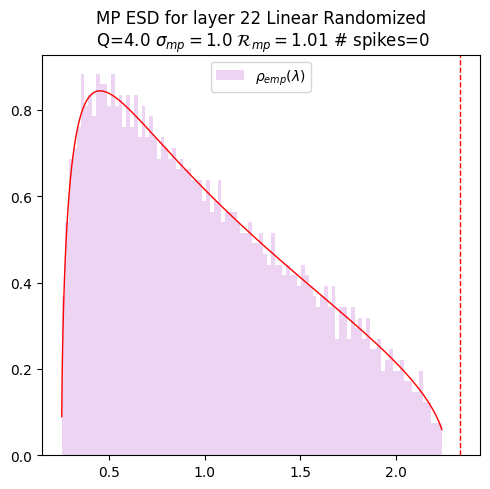

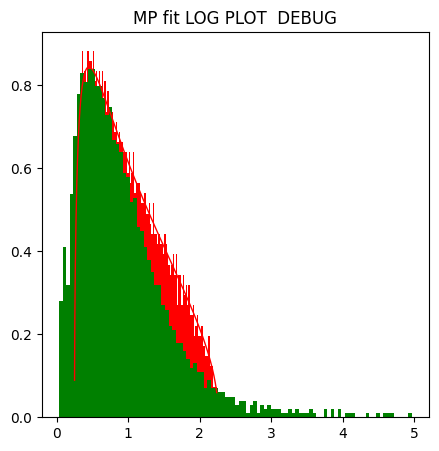

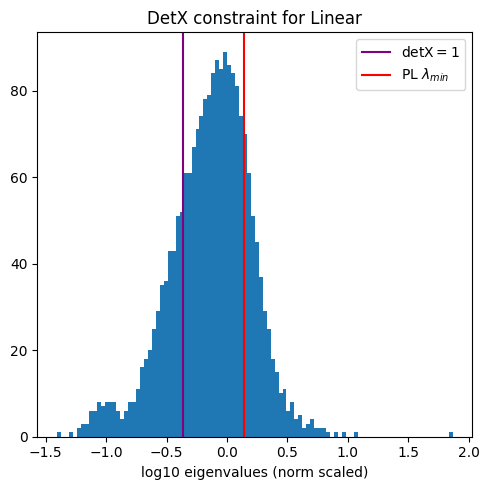

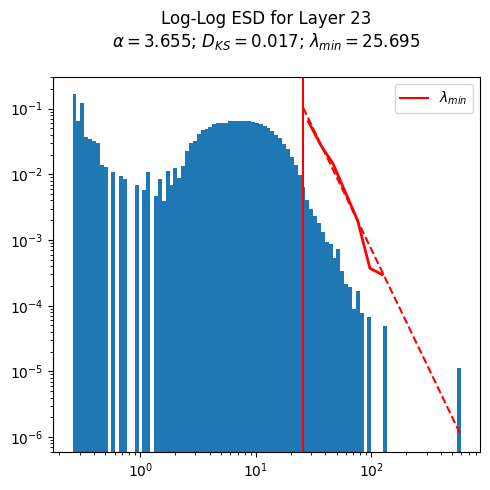

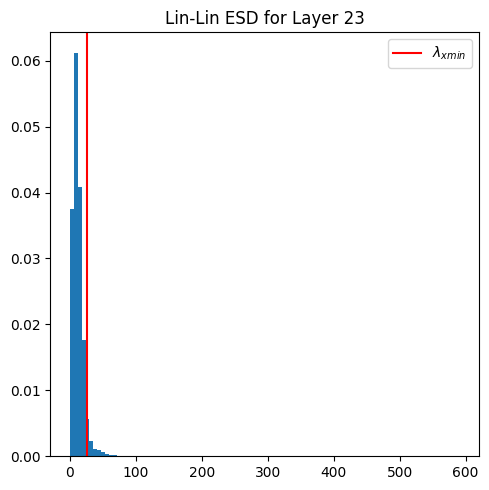

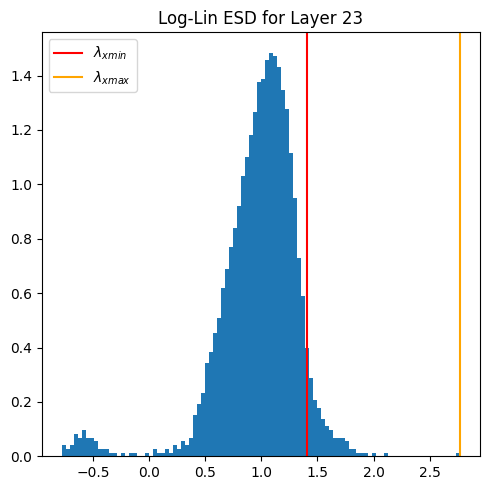

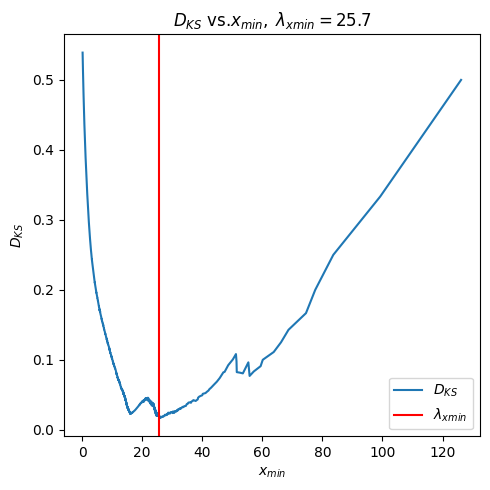

<Figure size 500x500 with 0 Axes>

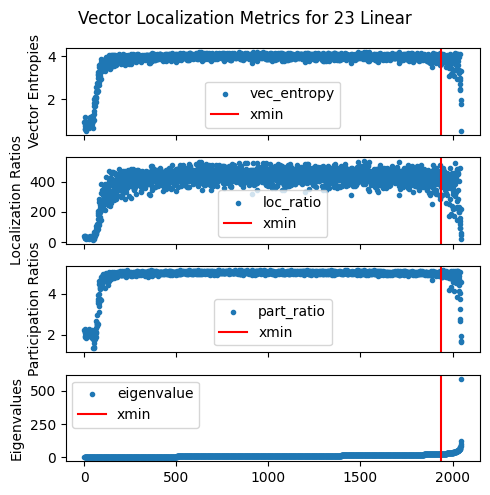

<Figure size 500x500 with 0 Axes>

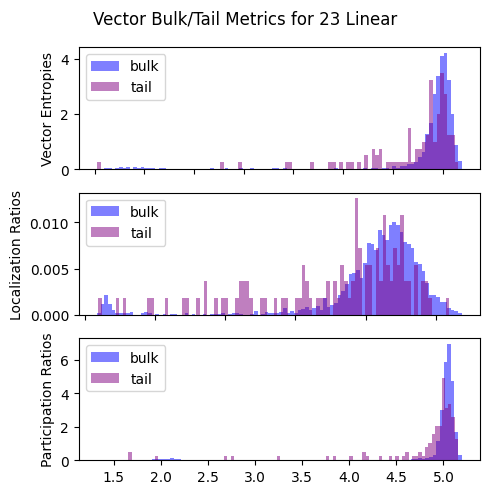

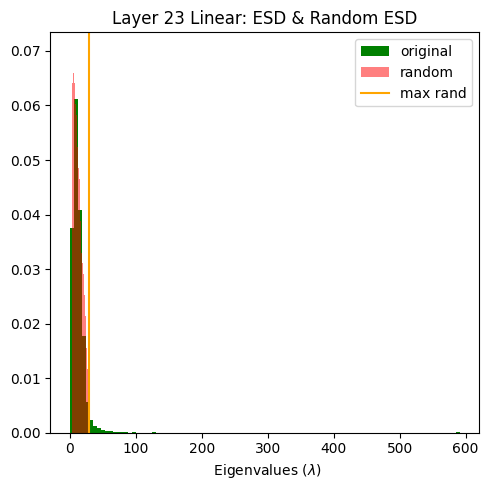

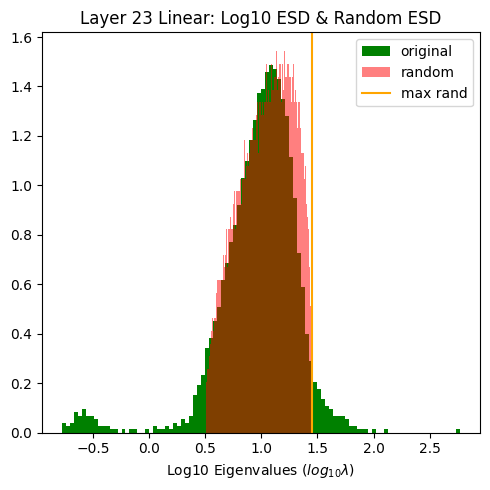

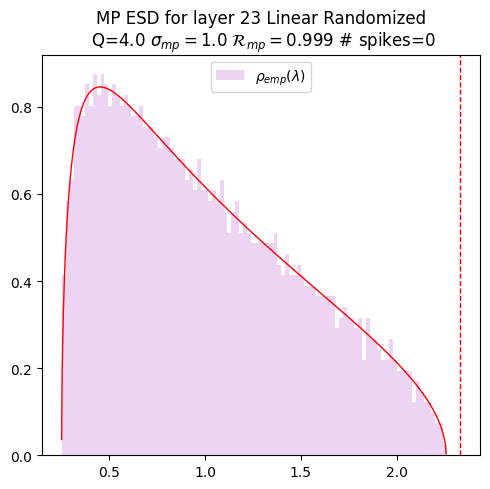

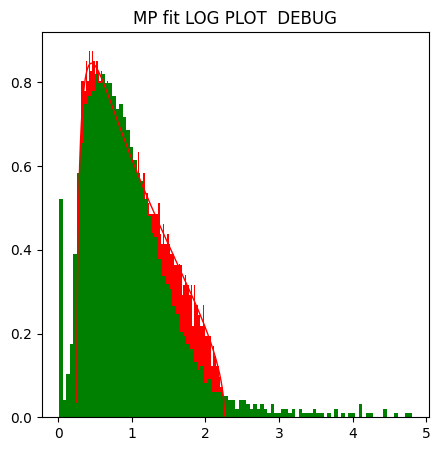

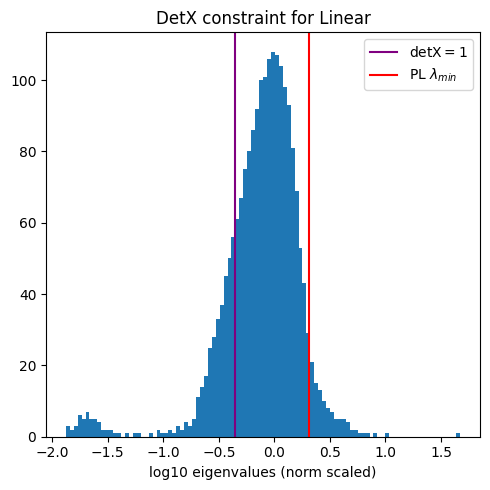

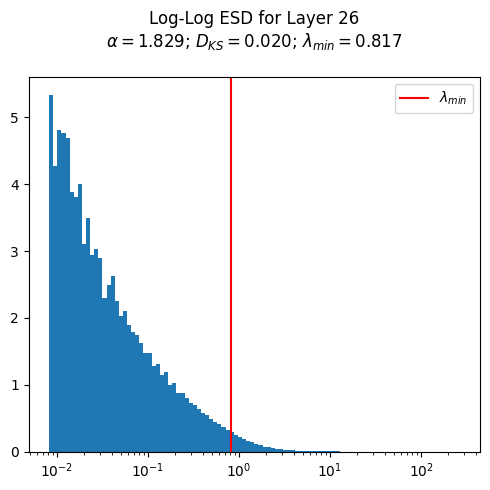

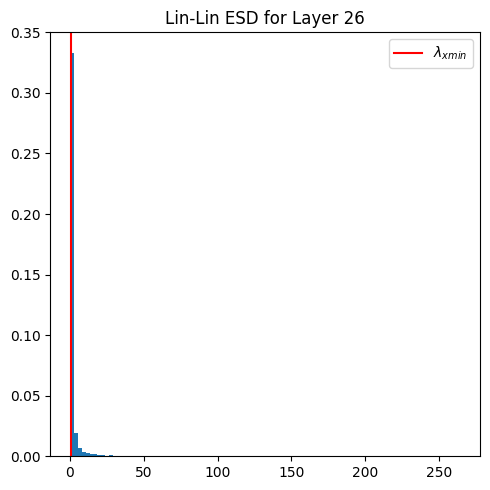

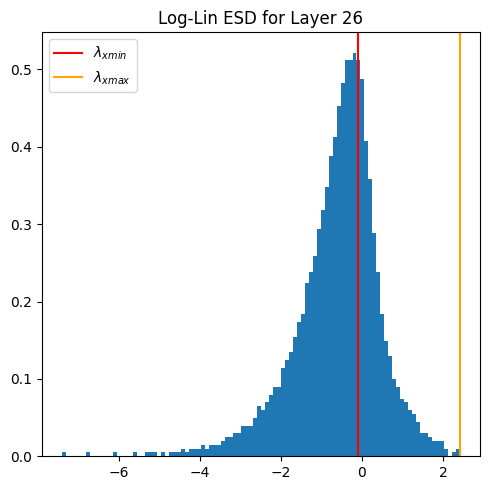

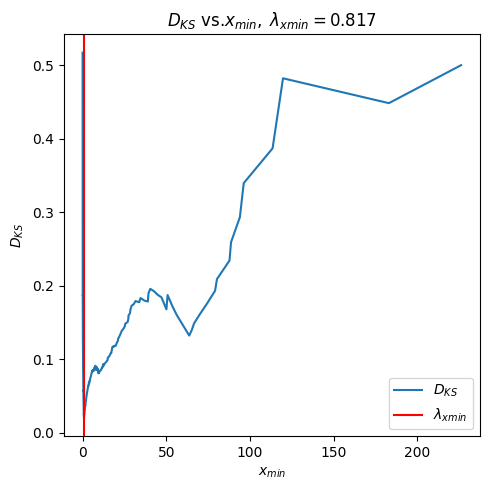

<Figure size 500x500 with 0 Axes>

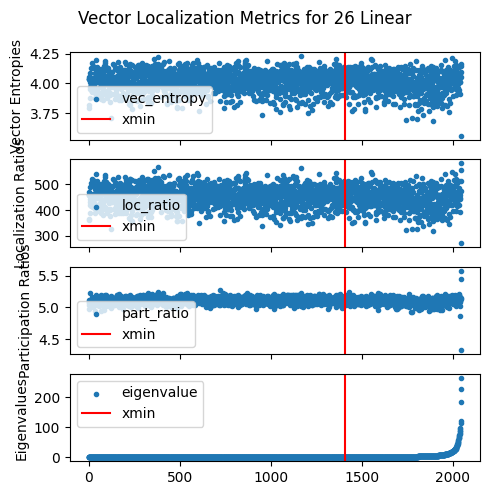

<Figure size 500x500 with 0 Axes>

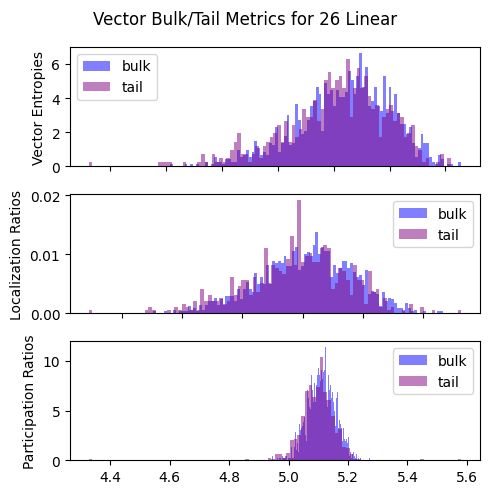

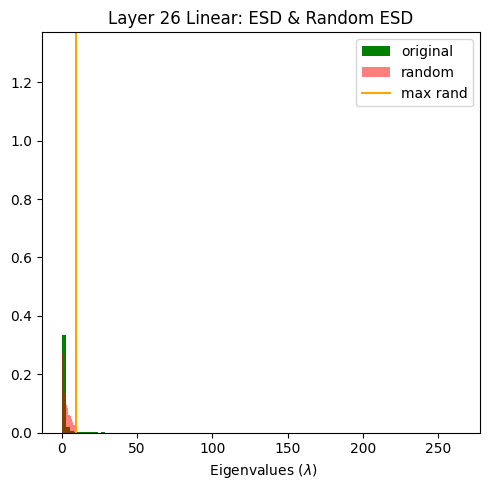

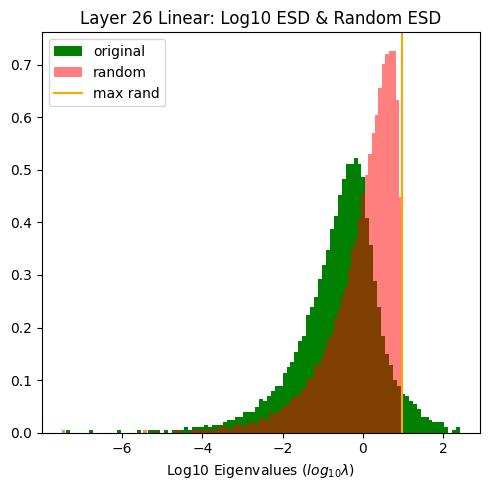

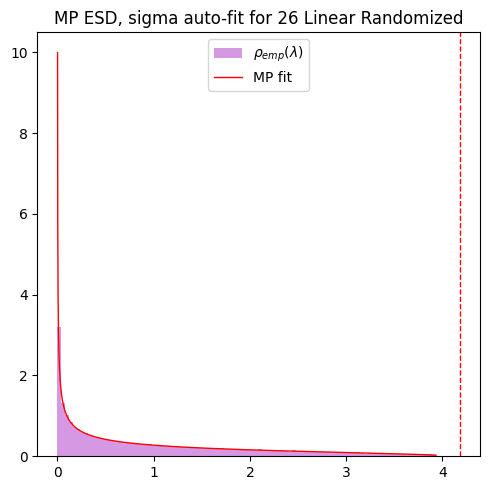

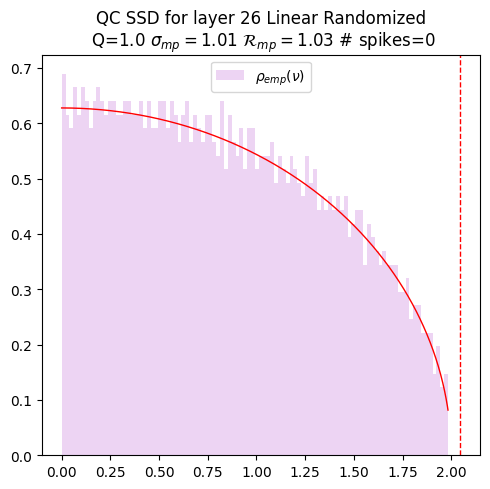

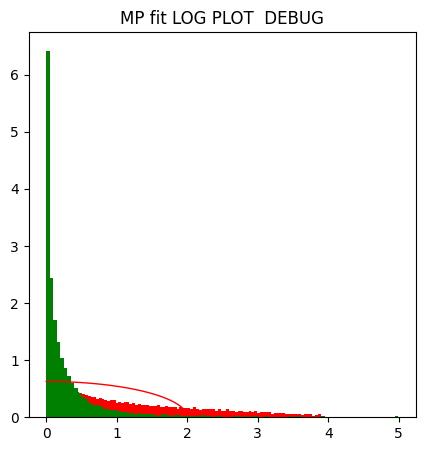

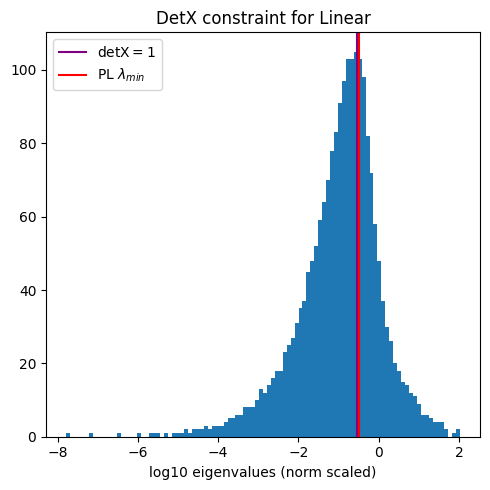

layer_id       name         D  Lambda       M        N        Q      alpha  \
0        2  Embedding  0.084786    -1.0   128.0  30000.0  234.375   4.479839   
0        3  Embedding  0.132038    -1.0   128.0    512.0    4.000   1.360876   
0        8     Linear  0.171282    -1.0   128.0   2048.0   16.000  12.199553   
0       15     Linear  0.047890    -1.0  2048.0   2048.0    1.000   2.836733   
0       16     Linear  0.046219    -1.0  2048.0   2048.0    1.000   2.683140   
0       17     Linear  0.064478    -1.0  2048.0   2048.0    1.000   3.433957   
0       20     Linear  0.018871    -1.0  2048.0   2048.0    1.000   3.564058   
0       22     Linear  0.015379    -1.0  2048.0   8192.0    4.000   3.665132   
0       23     Linear  0.016742    -1.0  2048.0   8192.0    4.000   3.655070   
0       26     Linear  0.019734    -1.0  2048.0   2048.0    1.000   1.828839   

   alpha_weighted   best_fit  ...  tail_mean_vec_entropy  tail_var_loc_ratio  \
0       14.456229  lognormal  ...               3.885850           18.849634   
0        1.336472  power_law  ...               3.813524           82.813130   
0        6.850629  lognormal  ...               3.794357           47.835131   
0        4.784611  power_law  ...               3.891569         2681.845952   
0        5.038314  power_law  ...               3.883851         2680.703596   
0        4.257525  power_law  ...               3.939415         1832.883193   
0        6.604491  lognormal  ...               3.841468         6502.653602   
0       10.759554  lognormal  ...               3.958877         1652.067777   
0       10.130380  lognormal  ...               3.696693        12367.426592   
0        4.430373  power_law  ...               4.004072         1709.939123   

   tail_var_part_ratio  tail_var_vec_entropy        warning  weak_rank_loss  \
0             0.007188              0.008799        success             0.0   
0             0.044207              0.036059   over-trained             0.0   
0             0.031507              0.031314  under-trained             0.0   
0             0.019024              0.018381        success             2.0   
0             0.028058              0.019807        success             2.0   
0             0.008984              0.011042        success             2.0   
0             0.125220              0.120554        success             2.0   
0             0.003746              0.009289        success             0.0   
0             0.426513              0.277547        success             0.0   
0             0.004038              0.008421   over-trained             3.0   

    ww_maxdist  ww_softrank         xmax        xmin  
0  1440.942457     0.145536  1686.369929  143.090311  
0     8.124287     0.153324     9.595509    0.001267  
0     0.360103     0.901172     3.643741    2.884951  
0    37.853173     0.221175    48.602935    6.094385  
0    64.372717     0.147029    75.468838    5.692560  
0    11.048303     0.363989    17.371242    3.958284  
0    63.960887     0.102917    71.298779    5.152035  
0   835.882908     0.030623   862.288684   16.115883  
0   562.849258     0.047653   591.012487   25.694854  
0   254.723754     0.037137   264.548337    0.816730  

[10 rows x 56 columns]

<Figure size 500x500 with 0 Axes>

In [186]:
model_name = f"albert-xlarge-v2"
albert = AlbertModel.from_pretrained(model_name)
watcher = ww.WeightWatcher(model=albert)
watcher.analyze(plot=True, detX=True, randomize=True, vectors=True)

In [137]:
esd3 = watcher.get_ESD(layer=3)

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'pow

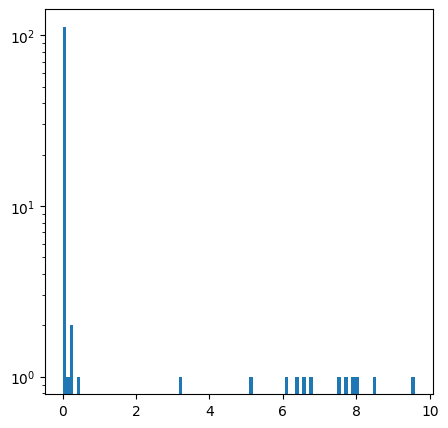

In [140]:
plt.hist(esd3, log=True, bins=100);

In [153]:
W3 = watcher.get_Weights(layer=3)[0]

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'pow

In [154]:
np.min(W3), np.max(W3)

(-0.20431276, 0.23516111)

In [155]:
w3 = W3.flatten()

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(1)
gmm.fit(w3.reshape(-1, 1))
x = np.linspace(-0.2, 0.2, 1000).reshape(1000,1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)

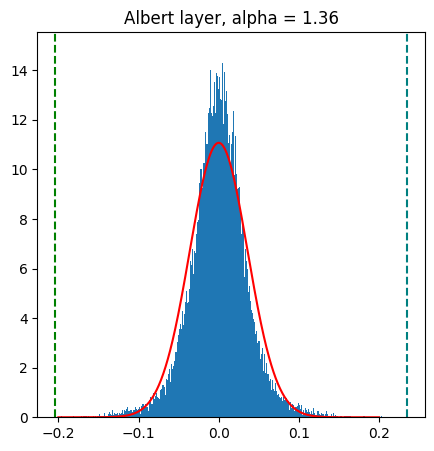

In [184]:
plt.hist(w3,bins=1000, density=True);
plt.axvline(np.max(w3), color='teal', linestyle='dashed')
plt.axvline(np.min(w3), color='green', linestyle='dashed')

plt.title("Albert layer, alpha = 1.36")
plt.plot(x, pdf,  color='red')eh

In [185]:
## what are the top eigenvectors

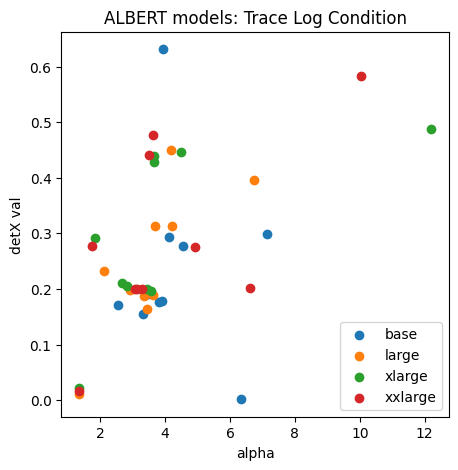

In [197]:
for idx, D in enumerate(all_details):
    version = versions[idx]
    plt.scatter(D.alpha.to_numpy(), D.detX_val.to_numpy(), label=version)
plt.xlabel("alpha")
plt.ylabel('detX val')
plt.title("ALBERT models: Trace Log Condition")
plt.legend()